In [7]:
# %%time
## Just an easy way to load utility functions
dataset_name = "W19_only"
df_list = []

%matplotlib inline 
%run f2f_header.py {dataset_name} {df_list}

Toggle code

ImportError: Traceback (most recent call last):
  File "E:\Users\Gamer\anaconda3\envs\test_tensorflow_install\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 64, in <module>
    from tensorflow.python._pywrap_tensorflow_internal import *
ImportError: DLL load failed while importing _pywrap_tensorflow_internal: The specified module could not be found.


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/errors

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

In [101]:
global BES_label_list, BES_df_list

# %run f2f_utility.py

# BES_df_list = pickle.load( open( "E:\\BES_analysis_data\\Face_to_face\\BES_df_list.pickle", "rb" ) )
BES_df_list = pd.read_pickle( "E:\\BES_analysis_data\\Face_to_face\\BES_df_list.pickle" )
# f2f_harmonised = pd.read_pickle("E:\\BES_analysis_data\\Face_to_face\\f2f_harmonised.zip", compression='zip')
# BES_label_list = pickle.load( open( "E:\\BES_analysis_data\\Face_to_face\\BES_label_list.pickle", "rb" ) )
BES_label_list = pd.read_pickle( "E:\\BES_analysis_data\\Face_to_face\\BES_label_list.pickle" )
# demo_var_dict = pickle.load( open( "E:\\BES_analysis_data\\Face_to_face\\demo_var_dict.pickle", "rb" ) )
demo_var_dict = pd.read_pickle( "E:\\BES_analysis_data\\Face_to_face\\demo_var_dict.pickle" )
# var_type_dict_nonans = pickle.load( open( "E:\\BES_analysis_data\\Face_to_face\\var_type_dict_nonans.pickle", "rb" ) )
var_type_dict_nonans = pd.read_pickle( "E:\\BES_analysis_data\\Face_to_face\\var_type_dict_nonans.pickle" )

f2f_harmonised = pd.read_pickle("E:\\BES_analysis_data\\Face_to_face\\f2f_harmonised_temp.zip", compression='zip')


generic_cols = f2f_harmonised.columns
list_of_scale_harm_vars = ["Age","year_past_min_sch_leave_age","in_school_past_min_age"]



## BUGS

BES_label_list["1959"]["v1236"] = 'LOCAL ELECTION VOTE 1963(2nd)'
BES_label_list["1964"]["v1236"] = 'LOCAL ELECTION VOTE 1963(2nd)'
BES_label_list["1966"]["v1236"] = 'LOCAL ELECTION VOTE 1963(2nd)'
BES_label_list["1970"]["v1236"] = 'LOCAL ELECTION VOTE 1963(2nd)'

BES_label_list["2015"]['edlevel'] = 'Education level (summary)'

In [12]:
pd.read_pickle("E:\\BES_analysis_data\\Face_to_face\\f2f_harmonised.zip", compression='zip').columns

Index(['dataset', 'uid', 'housing_det', 'housing', 'inc', 'vote', 'year', 'wt',
       'age', 'vote_simple', 'bloc', 'birth_year', 'harmonised_voted',
       'inc_det', 'vote_complete', 'vote_complete_simple', 'bloc_complete',
       'turnout_complete', 'gender', 'gender_complete'],
      dtype='object')

In [13]:
pd.read_pickle("E:\\BES_analysis_data\\Face_to_face\\f2f_harmonised_temp.zip", compression='zip').columns

Index(['dataset', 'uid', 'housing_det', 'housing', 'inc', 'vote', 'year', 'wt',
       'age', 'vote_simple', 'bloc', 'birth_year', 'harmonised_voted',
       'inc_det', 'vote_complete', 'vote_complete_simple', 'bloc_complete',
       'turnout_complete', 'gender', 'gender_complete', 'age_left_education',
       'age_left_education_2', 'age_left_education_3', 'anyQuals',
       'rsa_or_city_and_guilds', 'overseas_other_postschl', 'overseas_degree',
       'other_academic_vocational', 'other_tech_business',
       'higher_onc_ond_bec_tec', 'ordinary_gen_onc_ond_bec_tec',
       'trade_appenticeship', 'nursing', 'teachers_training',
       'city_and_guilds_cert_part1', 'city_and_guilds_full_tech',
       'city_and_guilds_advanced_final', 'city_and_guilds_craft_ordinary',
       'rsa_other_commercial', 'school_cert_or_matric',
       'uni_cnaa_degree_or_diploma', 'os_schl_leav_qual',
       'a_level_scot_higher', 'cse_grade_1_scot_lower', 'cse_grade_2_5',
       'professional_qualification'

In [102]:
f2f_harmonised_values = pd.read_pickle("E:\\BES_analysis_data\\Face_to_face\\f2f_harmonised_values.zip", compression='zip')

In [31]:
f2f_harmonised_values.columns

Index(['unconventional', 'ordinary', 'rich', 'respect', 'censorship',
       'strongtu', 'enterprise', 'toughlaw', 'death', 'ec_left_right',
       'soc_lib_auth', 'soc_lib_auth_complete', 'ec_left_right_complete',
       'dataset'],
      dtype='object')

In [103]:
f2f_harmonised_values["dataset"]=f2f_harmonised["dataset"]

In [104]:
f2f_harmonised_values.groupby("dataset")["soc_lib_auth_complete"].mean()

dataset
1959              NaN
1964              NaN
1966              NaN
1970              NaN
1974_feb          NaN
1974_oct          NaN
1979              NaN
1983              NaN
1987        10.793447
1992        10.542688
1997        10.951903
2001         9.815731
2005        10.237826
2010         9.791783
2015        10.351503
2017         9.863147
2019         9.655246
Name: soc_lib_auth_complete, dtype: float64

In [ ]:
## BES values 1987-2019

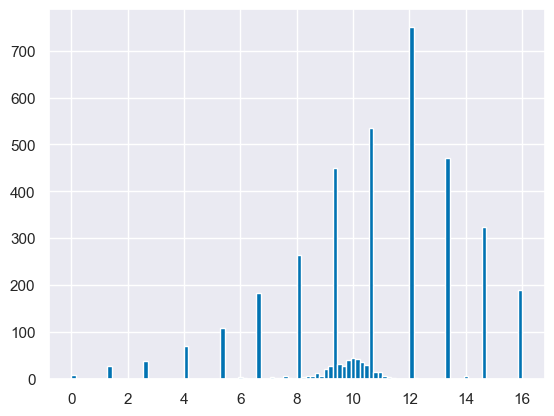

In [32]:
f2f_harmonised_values["soc_lib_auth_complete"][f2f_harmonised_values["dataset"]=="1987"].hist(bins=100);

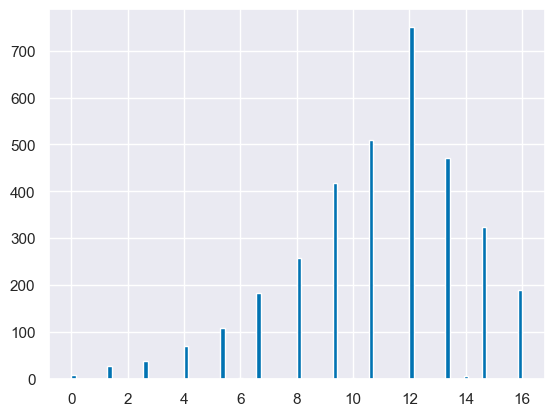

In [34]:
f2f_harmonised_values["soc_lib_auth"][f2f_harmonised_values["dataset"]=="1987"].hist(bins=100);

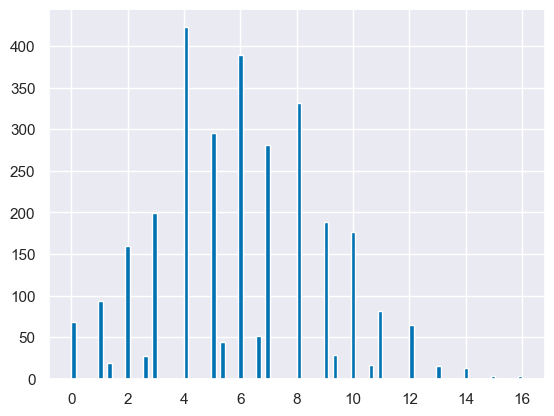

In [44]:
f2f_harmonised_values["ec_left_right"][f2f_harmonised_values["dataset"]=="2015"].hist(bins=100);

In [ ]:
# check pattern against obvious correlates like

# age, gender, income, vote

In [105]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
#             mod = smf.ols(formula=ind_var+' ~ alScale + lrScale', data=value_set)
#             res = mod.fit()
#     #         print(res.summary())

In [106]:
f2f_harmonised[f2f_harmonised_values.columns] = f2f_harmonised_values

In [107]:
f2f_harmonised

,dataset,uid,housing_det,housing,inc,vote,year,wt,age,vote_simple,...,respect,censorship,strongtu,enterprise,toughlaw,death,ec_left_right,soc_lib_auth,soc_lib_auth_complete,ec_left_right_complete
index,,,,,,,,,,,,,,,,,,,,,
0,2019,2019|0,MORT,OWN,15.6-26k,DNV,2019,0.926940,34.0,DNV,...,3.0,3.0,1.0,3.0,4.0,1.0,5.0,11.0,11.0,5.0
1,2019,2019|1,RENT-PR,RENT,NaN,DNV,2019,NaN,45.0,DNV,...,4.0,3.0,0.0,3.0,2.0,4.0,3.0,13.0,13.0,3.0
2,2019,2019|2,MORT,OWN,26-36.4k,LAB,2019,0.920836,33.0,LAB,...,3.0,3.0,0.0,1.0,2.0,0.0,5.0,8.0,8.0,5.0
3,2019,2019|3,RENT-LA,RENT,0-15.6k,DNV,2019,1.197730,22.0,DNV,...,4.0,1.0,NaN,NaN,3.0,4.0,4.0,12.0,12.0,4.0
4,2019,2019|4,RENT-LA,RENT,NaN,DNV,2019,1.979724,35.0,DNV,...,3.0,3.0,2.0,1.0,2.0,3.0,4.0,11.0,11.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,1959,1959|2917,OWN-MORT,OWN,NaN,TY,1959,1.000000,14.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2918,1959,1959|2918,OWN-MORT,OWN,NaN,TY,1959,1.000000,19.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2919,1959,1959|2919,OWN-MORT,OWN,NaN,TY,1959,1.000000,13.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [128]:
f2f_harmonised["edlevel"] = np.nan
f2f_harmonised.loc[f2f_harmonised["dataset"]=="2019","edlevel"] = BES_df_list["2019"]["edlevel"]
f2f_harmonised.loc[f2f_harmonised["dataset"]=="2017","edlevel"] = BES_df_list["2017"]["edlevel"]
f2f_harmonised.loc[f2f_harmonised["dataset"]=="2015","edlevel"] = BES_df_list["2015"]["edlevel"]

In [109]:
BES_df_list["2019"]["edlevel"].value_counts()

edlevel
Undergraduate        1249
No qualifications     762
A-level               681
GCSE                  451
Postgrad              423
Below GCSE            202
Name: count, dtype: int64

In [65]:
BES_df_list["2017"]["edlevel"].value_counts()

edlevel
Undergraduate        683
No qualifications    489
A-level              363
GCSE                 311
Postgrad             210
Below GCSE           100
Name: count, dtype: int64

In [66]:
BES_df_list["2015"]["edlevel"].value_counts()

edlevel
Undergraduate        842
No qualifications    788
A-level              509
GCSE A*-C            393
Postgrad             239
GCSE D-G             122
Name: count, dtype: int64

In [68]:
f2f_harmonised["edlevel"].value_counts().index

Index(['Undergraduate', 'No qualifications', 'A-level', 'Postgrad', 'GCSE',
       'GCSE A*-C', 'Below GCSE', 'GCSE D-G'],
      dtype='object', name='edlevel')

In [129]:
replace_dict = {'Undergraduate':"Undergrad", 'No qualifications':"No qualification", 'A-level':"A-level/equiv",
                'Postgrad':"Postgrad", 'GCSE':"GCSE/equiv","Below GCSE":"No qualification",
       'GCSE A*-C':"GCSE/equiv", "No qualification":"No qualification", 'GCSE D-G':"No qualification"}
f2f_harmonised["edlevel"] = f2f_harmonised["edlevel"].astype('object').replace(replace_dict).astype('category')\
    .cat.reorder_categories(['No qualification', 'GCSE/equiv','A-level/equiv', 'Undergrad', 'Postgrad' ])
from sklearn.linear_model import LinearRegression
def get_edlevel_coeffs(df, scale_cols = ["lrScale","alScale"], wt_var = "weight"):
    # got to have edlevel, lrScale, alScale, weight
    # edlevel in these cats this order [ 'No qualification', 'GCSE/equiv', 'A-level/equiv', 'Undergrad', 'Postgrad']
    
    output_df = pd.DataFrame(columns = scale_cols,
                             index = ['edlevel_GCSE/equiv', 'edlevel_A-level/equiv', 'edlevel_Undergrad',
                                      'edlevel_Postgrad', 'intercept'])
    
    for scale in output_df.columns:
    
        mask = df["edlevel"].notnull() & df[scale].notnull() & df[wt_var].notnull()
        X = pd.get_dummies( df[["edlevel"]][mask] ).drop("edlevel_No qualification",axis=1).astype(float)
        X = X[[ 'edlevel_GCSE/equiv', 'edlevel_A-level/equiv', 'edlevel_Undergrad', 'edlevel_Postgrad',  ]]
        y = df[scale][mask]

        reg = LinearRegression(fit_intercept=True).fit( X , y ,sample_weight = df[wt_var][mask])
        reg.score(X, y)
        temp = pd.Series(reg.coef_,index=X.columns)
        temp.loc["intercept"] = reg.intercept_
        output_df[scale] = temp

    return output_df

In [ ]:
def get_gen_corrs(data,scale_list,demo_var,wt_var):

    temp2 = pd.DataFrame()
    for scale_var in scale_list:
        y = data[ scale_var ]
        if y.dtype.name=='category':
            y =y.apply(lambda x: x.cat.codes.replace(-1,np.nan))
        X = data[demo_var]
        if X.dtype.name=="category":
            X = pd.get_dummies( data[demo_var], prefix = demo_var )
            X = X.drop(X.columns[0],axis=1).astype('float')
            X_notnull = X.notnull().all(axis=1)
        else:
            X_notnull = X.notnull()
            X = data[[demo_var]]

        wt = data[wt_var]
        mask = X_notnull & y.notnull() & wt.notnull()

        reg = LinearRegression(fit_intercept=True).fit( X[mask],y[mask] ,sample_weight = wt[mask])
        reg.score(X[mask], y[mask])
        temp = pd.Series(reg.coef_,index=X.columns)
        temp.loc[demo_var+"_int"] = reg.intercept_
        temp2[scale_var] = temp

    return temp2

In [130]:
f2f_harmonised["edlevel"].value_counts()

edlevel
Undergrad           2774
No qualification    2463
A-level/equiv       1553
GCSE/equiv          1155
Postgrad             872
Name: count, dtype: int64

In [131]:
get_edlevel_coeffs(f2f_harmonised[f2f_harmonised["dataset"]=="2017"],
                   scale_cols = ["ec_left_right","soc_lib_auth"], wt_var = "wt").round(2)

,ec_left_right,soc_lib_auth
edlevel_GCSE/equiv,-0.49,-0.48
edlevel_A-level/equiv,-0.59,-1.21
edlevel_Undergrad,-0.19,-2.28
edlevel_Postgrad,-0.59,-3.71
intercept,6.33,11.23


In [133]:
f2f_harmonised[f2f_harmonised["dataset"]=="2017"][["ec_left_right","soc_lib_auth","edlevel"]]

,ec_left_right,soc_lib_auth,edlevel
index,,,
0,6.0,5.0,No qualification
1,5.0,16.0,No qualification
2,4.0,14.0,No qualification
3,8.0,16.0,No qualification
4,4.0,10.0,Undergrad
...,...,...,...
2189,7.0,13.0,GCSE/equiv
2190,11.0,11.0,Undergrad
2191,6.0,12.0,Undergrad


In [ ]:
# bes2017 (2139, 20)

In [141]:
f2f_harmonised[f2f_harmonised["dataset"]=="2017"]

,dataset,uid,housing_det,housing,inc,vote,year,wt,age,vote_simple,...,censorship,strongtu,enterprise,toughlaw,death,ec_left_right,soc_lib_auth,soc_lib_auth_complete,ec_left_right_complete,edlevel
index,,,,,,,,,,,,,,,,,,,,,
0,2017,2017|0,MORT,OWN,0-15.6k,LAB,2017,1.110753,21.0,LAB,...,3.0,2.0,1.0,2.0,0.0,6.0,5.0,5.0,6.0,No qualification
1,2017,2017|1,RENT-LA,RENT,0-15.6k,LAB,2017,0.561521,53.0,LAB,...,4.0,0.0,1.0,4.0,4.0,5.0,16.0,16.0,5.0,No qualification
2,2017,2017|2,OWN,OWN,0-15.6k,DNV,2017,0.840835,56.0,DNV,...,3.0,1.0,NaN,4.0,4.0,4.0,14.0,14.0,4.0,No qualification
3,2017,2017|3,OWN,OWN,36.4-45k,LAB,2017,0.919755,65.0,LAB,...,4.0,4.0,4.0,4.0,4.0,8.0,16.0,16.0,8.0,No qualification
4,2017,2017|4,OWN,OWN,36.4-45k,LAB,2017,0.651745,68.0,LAB,...,4.0,0.0,2.0,3.0,0.0,4.0,10.0,10.0,4.0,Undergrad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2189,2017,2017|2189,OWN,OWN,45-75k,DNV,2017,1.656124,59.0,DNV,...,4.0,3.0,2.0,3.0,4.0,7.0,13.0,13.0,7.0,GCSE/equiv
2190,2017,2017|2190,OWN,OWN,75k+,LAB,2017,0.445324,46.0,LAB,...,2.0,3.0,2.0,2.0,4.0,11.0,11.0,11.0,11.0,Undergrad
2191,2017,2017|2191,RENT-HA,RENT,0-15.6k,CON,2017,0.510075,50.0,CON,...,3.0,3.0,1.0,3.0,3.0,6.0,12.0,12.0,6.0,Undergrad


In [146]:
BES_df_list["2017"]["wt_demog"].dropna().index

Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       2184, 2185, 2186, 2187, 2188, 2189, 2190, 2191, 2192, 2193],
      dtype='int64', length=2139)

In [149]:
bes2017 = f2f_harmonised[f2f_harmonised["dataset"]=="2017"].loc[BES_df_list["2017"]["wt_demog"].dropna().index].copy()

In [155]:
bes2017.columns[-20:]

Index(['PC', 'decade', 'generation', 'inc_norm', 'inc_norm_wt',
       'inc(quartile)', 'unconventional', 'ordinary', 'rich', 'respect',
       'censorship', 'strongtu', 'enterprise', 'toughlaw', 'death',
       'ec_left_right', 'soc_lib_auth', 'soc_lib_auth_complete',
       'ec_left_right_complete', 'edlevel'],
      dtype='object')

In [156]:
bes2017.head(5)[['unconventional', 'ordinary', 'rich', 'respect',
       'censorship', 'strongtu', 'enterprise', 'toughlaw', 'death',
       'ec_left_right', 'soc_lib_auth',]]

# toughlaw = al12

,unconventional,ordinary,rich,respect,censorship,strongtu,enterprise,toughlaw,death,ec_left_right,soc_lib_auth
0,1.0,1.0,2.0,0.0,3.0,2.0,1.0,2.0,0.0,6.0,5.0
1,0.0,4.0,0.0,4.0,4.0,0.0,1.0,4.0,4.0,5.0,16.0
2,NaN,1.0,1.0,3.0,3.0,1.0,NaN,4.0,4.0,4.0,14.0
3,0.0,0.0,0.0,4.0,4.0,4.0,4.0,4.0,4.0,8.0,16.0
4,0.0,0.0,2.0,3.0,4.0,0.0,2.0,3.0,0.0,4.0,10.0


In [ ]:
	lr1	lr2	lr5	lr6	lr7	lr8	al3	al4	al9	al10	al12	lrScale	alScale
0	1.0	2.0	2.0	1.0	3.0	3.0	0.0	3.0	4.0	3.0	2.0	1.333333	1.000000
1	4.0	4.0	0.0	1.0	3.0	4.0	4.0	4.0	4.0	4.0	4.0	1.000000	2.666667
2	1.0	3.0	1.0	NaN	NaN	NaN	3.0	3.0	NaN	NaN	4.0	NaN	NaN
3	0.0	4.0	4.0	4.0	4.0	4.0	4.0	4.0	4.0	4.0	4.0	1.333333	2.666667
4	0.0	2.0	0.0	2.0	3.0	3.0	3.0	4.0	3.0	4.0	3.0	1.000000	1.833333

<Axes: >

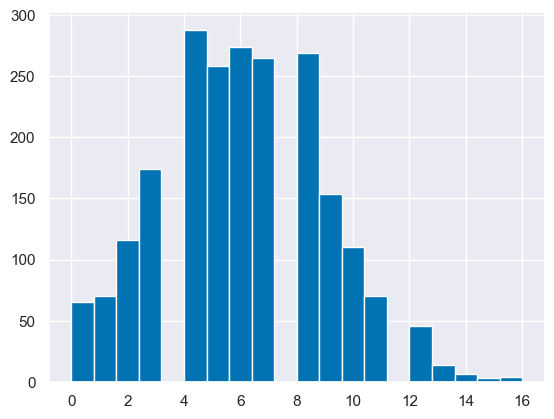

In [137]:
f2f_harmonised[f2f_harmonised["dataset"]=="2017"]["ec_left_right"].hist(bins=20)

In [134]:
# time to check how he made his scales!

edlevel
Undergrad           683
No qualification    589
A-level/equiv       363
GCSE/equiv          311
Postgrad            210
Name: count, dtype: int64

In [ ]:

edlevel
Undergrad           677
No qualification    583
A-level/equiv       360
GCSE/equiv          309
Postgrad            210

In [157]:
BES_label_list["2017"]

{'finalserialno': 'Final Serial Number',
 'serial': 'Respondent Serial Number',
 'a01': 'A1: Most important issue',
 'a02': 'Best party on most important issue',
 'a03': 'Interest in politics',
 'm02_1': "Politicians don't care what people like me think",
 'm02_2': 'It is often difficult for me to understand what is going on in government and po',
 'm02_3': 'People like me have no say in what government does.',
 'm02_4': "The main political parties in Britain don't offer voters real choices in electio",
 'm02_5': 'Parties and politicians in the UK are more concerned with fighting each other th',
 'm02_6': 'Politicians ignore the issues I really care about',
 'b01': 'B1 Talking with people about the general election on June 8th, we have found tha',
 'b02': 'B2 Which party did you vote for in the general election?',
 'b04': 'B4 If you had voted, which party would you probably have voted for?',
 'b05': 'B5 How did you cast your vote in the general election on June 8th?',
 'b0601': 'The pa

In [344]:
values = BES_df_list["2017"][["f01_1","f01_2","f01_3","f01_4","f01_5","f01_6","f01_7","f01_8","f01_9","f01_10","f01_11","f01_12"]]\
    .apply(lambda x: x.replace("Don't know",np.nan).cat.codes.replace(-1,np.nan))

values[["f01_2","f01_7","f01_8","f01_9","f01_10",]] = 4-values[["f01_2","f01_7","f01_8","f01_9","f01_10",]]

# lrScale = (lr1 + (4-lr2) + lr5 + lr6 + (4-lr7) + (4-lr8))/6,
# alScale = (al3 + al4 + (4-al9) + (4-al10) + al11 + al12)/6,
# values[["f01_1","f01_5","f01_6","f01_2","f01_7","f01_8",]].dropna().mean(axis=1).head(20)

lrScale_bes2017 = values[["f01_1","f01_5","f01_6", "f01_2","f01_7","f01_8",]].dropna().mean(axis=1)
alScale_bes2017 = values[["f01_3","f01_4","f01_11","f01_12","f01_9","f01_10",]].dropna().mean(axis=1)
    

In [345]:
get_edlevel_coeffs(f2f_harmonised[f2f_harmonised["dataset"]=="2017"],
                   scale_cols = ["ec_left_right","soc_lib_auth"], wt_var = "wt").round(2)

,ec_left_right,soc_lib_auth
edlevel_GCSE/equiv,-0.49,-0.48
edlevel_A-level/equiv,-0.59,-1.21
edlevel_Undergrad,-0.19,-2.28
edlevel_Postgrad,-0.59,-3.71
intercept,6.33,11.23


In [350]:
f2f_harmonised2017 = f2f_harmonised[f2f_harmonised["dataset"]=="2017"]

f2f_harmonised2017["alScale_bes2017"] = alScale_bes2017
f2f_harmonised2017["lrScale_bes2017"] = lrScale_bes2017

In [351]:
lrScale_pos_bes2017 = values[["f01_1","f01_5","f01_6",]          ].dropna().mean(axis=1)
alScale_pos_bes2017 = values[["f01_3","f01_4","f01_11","f01_12",]].dropna().mean(axis=1)

lrScale_neg_bes2017 = values[["f01_2","f01_7","f01_8",] ].dropna().mean(axis=1)
alScale_neg_bes2017 = values[["f01_9","f01_10",]].dropna().mean(axis=1)

f2f_harmonised2017["lrScale_pos_bes2017"] = lrScale_pos_bes2017
f2f_harmonised2017["alScale_pos_bes2017"] = alScale_pos_bes2017
f2f_harmonised2017["lrScale_neg_bes2017"] = lrScale_neg_bes2017
f2f_harmonised2017["alScale_neg_bes2017"] = alScale_neg_bes2017

f2f_harmonised2017[['ec_left_right', 'soc_lib_auth', 'soc_lib_auth_complete',
       'ec_left_right_complete']] = f2f_harmonised2017[['ec_left_right', 'soc_lib_auth', 'soc_lib_auth_complete',
       'ec_left_right_complete']]/4

f2f_harmonised2017[[ 'alScale_bes2017', 'lrScale_bes2017',]] =f2f_harmonised2017[[ 'alScale_bes2017', 'lrScale_bes2017',]]*12/11

In [369]:
BES_label_list["2017"]["f01_1"],BES_label_list["2017"]["f01_5"],BES_label_list["2017"]["f01_6"]

("Ordinary working people get their fair share of the nation's wealth",
 "There is no need for strong trade unions to protect employees' working condition",
 "Private enterprise is the best way to solve Britain's economic problems")

In [258]:
BES_label_list["2017"]["f01_3"],BES_label_list["2017"]["f01_4"],BES_label_list["2017"]["f01_11"],BES_label_list["2017"]["f01_12"]

("Young people today don't have enough respect for traditional British values",
 'Censorship of films and magazines is necessary to uphold moral standards',
 'For some crimes, the death penalty is the most appropriate sentence',
 'People who break the law should be given stiffer sentences')

In [343]:
BES_label_list["2017"]["f01_9"],BES_label_list["2017"]["f01_10"]

('People should be allowed to organise public meetings to protest against the gove',
 'People in Britain should be more tolerant of those who lead unconventional lives')

In [ ]:
# f01_1    0.686108
# f01_5    0.634757
# f01_6    0.659145
# f01_2    0.654707

# f01_3     0.756070
# f01_4     0.662818
# f01_11    0.778315
# f01_12    0.734228

In [352]:
get_edlevel_coeffs(f2f_harmonised2017,
                   scale_cols = ["lrScale_pos_bes2017","alScale_pos_bes2017"], wt_var = "wt").round(2)

,lrScale_pos_bes2017,alScale_pos_bes2017
edlevel_GCSE/equiv,-0.16,-0.12
edlevel_A-level/equiv,-0.23,-0.29
edlevel_Undergrad,-0.20,-0.55
edlevel_Postgrad,-0.31,-0.90
intercept,1.72,2.80


In [349]:
get_edlevel_coeffs(f2f_harmonised2017,
                   scale_cols = ["lrScale_neg_bes2017","alScale_neg_bes2017"], wt_var = "wt").round(2)

,lrScale_neg_bes2017,alScale_neg_bes2017
edlevel_GCSE/equiv,0.01,-0.03
edlevel_A-level/equiv,-0.04,-0.21
edlevel_Undergrad,0.21,-0.24
edlevel_Postgrad,0.24,-0.45
intercept,1.63,1.37


In [548]:
get_edlevel_coeffs(f2f_harmonised2017,
                   scale_cols = ["lrScale_bes2017","alScale_bes2017"], wt_var = "wt").round(2)

,lrScale_bes2017,alScale_bes2017
edlevel_GCSE/equiv,-0.09,-0.11
edlevel_A-level/equiv,-0.15,-0.30
edlevel_Undergrad,-0.02,-0.50
edlevel_Postgrad,-0.05,-0.82
intercept,1.84,2.54


In [204]:
get_edlevel_coeffs(f2f_harmonised[f2f_harmonised["dataset"]=="2017"],
                   scale_cols = ["ec_left_right","soc_lib_auth"], wt_var = "wt").round(2)

,ec_left_right,soc_lib_auth
edlevel_GCSE/equiv,-0.49,-0.48
edlevel_A-level/equiv,-0.59,-1.21
edlevel_Undergrad,-0.19,-2.28
edlevel_Postgrad,-0.59,-3.71
intercept,6.33,11.23


In [360]:
values[["f01_2","f01_7","f01_8"]          ].corrwith(f2f_harmonised2017["ec_left_right"])

f01_2    0.654707
f01_7    0.321943
f01_8    0.164645
dtype: float64

In [362]:
3.666667*3*4/11

4.000000363636364

In [364]:
f2f_harmonised2017[['ec_left_right', 'soc_lib_auth', 'soc_lib_auth_complete',
       'ec_left_right_complete', 'alScale_bes2017', 'lrScale_bes2017',
       'lrScale_pos_bes2017', 'alScale_pos_bes2017', 'lrScale_neg_bes2017',
       'alScale_neg_bes2017']].describe()

,ec_left_right,soc_lib_auth,soc_lib_auth_complete,ec_left_right_complete,alScale_bes2017,lrScale_bes2017,lrScale_pos_bes2017,alScale_pos_bes2017,lrScale_neg_bes2017,alScale_neg_bes2017
count,2186.000000,2190.000000,2194.000000,2194.000000,1972.000000,1852.000000,1913.000000,2045.000000,2003.000000,2091.000000
mean,1.497560,2.466020,2.465787,1.498004,2.227365,1.782741,1.545914,2.467848,1.710102,1.204926
std,0.727437,0.875449,0.874674,0.726353,0.718482,0.691506,0.764141,0.862402,0.790701,0.726939
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.750000,1.750000,1.000000,1.818182,1.272727,1.000000,1.750000,1.000000,1.000000
50%,1.500000,2.500000,2.500000,1.500000,2.363636,1.818182,1.666667,2.500000,1.666667,1.000000
75%,2.000000,3.000000,3.000000,2.000000,2.727273,2.181818,2.000000,3.000000,2.333333,1.500000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [354]:
f2f_harmonised2017[['ec_left_right', 'soc_lib_auth', 'soc_lib_auth_complete',
       'ec_left_right_complete', 'alScale_bes2017', 'lrScale_bes2017',
       'lrScale_pos_bes2017', 'alScale_pos_bes2017', 'lrScale_neg_bes2017',
       'alScale_neg_bes2017']].corr()

,ec_left_right,soc_lib_auth,soc_lib_auth_complete,ec_left_right_complete,alScale_bes2017,lrScale_bes2017,lrScale_pos_bes2017,alScale_pos_bes2017,lrScale_neg_bes2017,alScale_neg_bes2017
ec_left_right,1.000000,0.043071,0.043071,1.000000,0.121808,0.894741,0.926616,0.046227,0.540670,0.206911
soc_lib_auth,0.043071,1.000000,1.000000,0.044437,0.932108,-0.007104,0.183819,1.000000,-0.198147,0.145248
soc_lib_auth_complete,0.043071,1.000000,1.000000,0.044370,0.932108,-0.007104,0.183819,1.000000,-0.198147,0.145248
ec_left_right_complete,1.000000,0.044437,0.044370,1.000000,0.121808,0.894741,0.926616,0.046218,0.540670,0.206894
alScale_bes2017,0.121808,0.932108,0.932108,0.121808,1.000000,0.073444,0.228848,0.932108,-0.118874,0.492732
lrScale_bes2017,0.894741,-0.007104,-0.007104,0.894741,0.073444,1.000000,0.805729,-0.012675,0.823324,0.223195
lrScale_pos_bes2017,0.926616,0.183819,0.183819,0.926616,0.228848,0.805729,1.000000,0.183575,0.327211,0.184440
alScale_pos_bes2017,0.046227,1.000000,1.000000,0.046218,0.932108,-0.012675,0.183575,1.000000,-0.206764,0.144116
lrScale_neg_bes2017,0.540670,-0.198147,-0.198147,0.540670,-0.118874,0.823324,0.327211,-0.206764,1.000000,0.159237
alScale_neg_bes2017,0.206911,0.145248,0.145248,0.206894,0.492732,0.223195,0.184440,0.144116,0.159237,1.000000


In [322]:
X[scale_var].dtype

dtype('float64')

index
0       1.454545
1       1.090909
2            NaN
3       1.454545
4       1.090909
          ...   
2189    2.000000
2190    2.727273
2191    2.181818
2192    2.545455
2193    3.272727
Name: lrScale_bes2017, Length: 2194, dtype: float64

In [254]:
import semopy
print(semopy.efa.explore_cfa_model(values.dropna(),min_loadings=3))

eta1 =~ f01_3 + f01_11 + f01_12 + f01_4 + f01_2 + f01_8 + f01_5 + f01_7 + f01_10
eta2 =~ f01_2 + f01_6 + f01_5 + f01_1 + f01_7 + f01_9 + f01_10 + f01_11 + f01_8



In [180]:
values[["f01_2","f01_7","f01_8","f01_9","f01_10",]] = 4-values[["f01_2","f01_7","f01_8","f01_9","f01_10",]]

# lrScale = (lr1 + (4-lr2) + lr5 + lr6 + (4-lr7) + (4-lr8))/6,
# alScale = (al3 + al4 + (4-al9) + (4-al10) + al11 + al12)/6,

In [181]:
# values[["f01_3","f01_4","f01_11","f01_12","f01_9","f01_10",]].corr()
# values[["f01_1","f01_5","f01_6","f01_2","f01_7","f01_8",]].corr()

,f01_3,f01_4,f01_11,f01_12,f01_9,f01_10
f01_3,1.000000,0.388694,0.431175,0.454801,0.025408,0.114119
f01_4,0.388694,1.000000,0.305222,0.326455,0.054789,0.097956
f01_11,0.431175,0.305222,1.000000,0.452231,0.108078,0.176545
f01_12,0.454801,0.326455,0.452231,1.000000,-0.001389,0.076301
f01_9,0.025408,0.054789,0.108078,-0.001389,1.000000,0.325834
f01_10,0.114119,0.097956,0.176545,0.076301,0.325834,1.000000


In [1429]:
df = pd.get_dummies(BES_df_list["2017"].select_dtypes('category'))
lrScaleTop    = ["_".join( x.split("_")[:-1] ) for x in df.corrwith(f2f_harmonised2017["lrScale_bes2017"]).dropna().sort_values().head(50).index]
lrScaleBottom = ["_".join( x.split("_")[:-1] ) for x in df.corrwith(f2f_harmonised2017["lrScale_bes2017"]).dropna().sort_values().tail(50).index]
alScaleTop    = ["_".join( x.split("_")[:-1] ) for x in df.corrwith(f2f_harmonised2017["alScale_bes2017"]).dropna().sort_values().head(50).index]
alScaleBottom = ["_".join( x.split("_")[:-1] ) for x in df.corrwith(f2f_harmonised2017["alScale_bes2017"]).dropna().sort_values().tail(50).index]

In [269]:
# BES_df_list["2017"].select_dtypes('number').corrwith( f2f_harmonised2017["alScale_bes2017"] )
# ns_sec

finalserialno      -0.012151
pano               -0.030453
nr_calls_1st       -0.016887
nr_calls_reissue    0.004920
sel_wt_capped      -0.048029
wt_demog           -0.002388
wt_demog_cses       0.001501
wt_vote             0.055086
wt_vote_valid       0.020785
ns_sec              0.258416
dtype: float64

In [ ]:
# lr_scale correlate variables
f01_1         Ordinary working people get their fair share o...
f01_2         There is one law for the rich and one for the ...
f01_5         There is no need for strong trade unions to pr...
f01_6         Private enterprise is the best way to solve Br...
f01_7         Major public services and industries ought to ...
f01_8         It is the government's responsibility to provi...
f01_9         People should be allowed to organise public me...

In [761]:
search(BES_df_list["2017"],"^g")

g01_1    2194
g01_2    2194
g01_3    2194
g01_4    2194
g01_5    2194
g01_6    2194
g01_7     191
g01_8     129
dtype: int64

In [776]:
BES_df_list["2017"]["q13_cses"].cat.categories

Index(['Not stated', 'Don`t know', 'Strongly agree', 'Somewhat agree',
       'Neither agree nor disagree', 'Somewhat disagree', 'Strongly disagree'],
      dtype='object')

In [ ]:
# Some people feel that government should make much greater
# efforts to make people's incomes more equal. Other people feel
# that government should be much less concerned about how equal
# people's incomes are. Where would you place youself on this
# scale?

# l09 is redistSelf not agree-disagree

# q12_cses_4 'Rich people buy elections' agree-disagree
# q13_cses redistSelf agree-disagree
# q2_cses_8 agree disagree 'Most politicians care only about the interests of the rich and powerful'

# Thinking now of trade unions and big business in this country. - binary variables!
# w11 First, do you think that trade unions have too much power / no - looks prett Agree/Disagre to me!
# w12 Do you think that big business in this country has too much power, or not? - looks prett Agree/Disagre to me!

# next 3 all agree-disagree w15_1/2/3
# If welfare benefits weren't so generous, people would learn to stand on their own two feet
# University students should be charged tuition fees
# Many people who get social security don’t really deserve any help


In [782]:
print(semopy.efa.explore_cfa_model(lr_values.dropna()))

eta1 =~ f01_2 + q2_cses_8 + q12_cses_4 + f01_1 + w12
eta2 =~ q13_cses + l09 + w15_2
eta3 =~ q13_cses + l09 + w15_2 + g01_1 + f01_8
eta4 =~ f01_6 + f2 + f01_7 + f01_5 + w11



In [783]:
print(semopy.efa.explore_cfa_model(lr_values.dropna(),min_loadings=3))

eta1 =~ q13_cses + l09 + f01_6 + f01_2 + f01_7 + f2 + q2_cses_8 + q12_cses_4 + f01_1 + f01_5 + w15_2 + w12 + w11 + g01_1 + f01_8
eta2 =~ q13_cses + l09 + f01_6 + f2 + f01_7 + w15_1 + f01_5 + f01_1 + w15_2 + w11 + w15_3 + q2_cses_8 + g01_1 + f01_9



In [784]:
print(semopy.efa.explore_cfa_model(lr_values.drop(['q12_cses_4','q13_cses','q2_cses_8'],axis=1).dropna(),min_loadings=3))

eta1 =~ f2 + f01_6 + f01_7 + w15_1 + l09 + f01_5 + f01_2 + f01_1 + w15_2 + w11 + w15_3 + w12 + g01_1 + f01_9 + f01_8



In [785]:
pg.cronbach_alpha( (lr_values*lr_values_align).drop(['q12_cses_4','q13_cses','q2_cses_8','w11','w12'],axis=1) )

(0.7297836647389901, array([0.713, 0.746]))

In [786]:
lr_values.notnull().mean()#.sort_values()

f01_1         0.965360
f01_2         0.985871
f01_5         0.964448
f01_6         0.897903
f01_7         0.928441
f01_8         0.984503
f01_9         0.983592
l09           0.963081
g01_1         0.982680
f2            0.884686
q12_cses_4    0.381951
q13_cses      0.429809
q2_cses_8     0.438013
w11           0.820875
w12           0.888332
w15_1         0.983592
w15_2         0.975843
w15_3         0.974020
dtype: float64

In [1400]:
lr_corr_list = ["f01_1","f01_2","f01_5","f01_6","f01_7","f01_8","f01_9",
                "l09",
                "g01_1",
                "f2",
                "q12_cses_4","q13_cses","q2_cses_8",
                "w11","w12",
                "w15_1","w15_2","w15_3",]

replace_dict = {"Don't know":np.nan,'Don`t know':np.nan,'Not stated':np.nan}
lr_values_raw = BES_df_list["2017"][lr_corr_list]

lr_values_raw["w11"] = lr_values_raw["w11"]\
    .cat.reorder_categories(['Don`t know', "Don't have too much power","Have too much power" ,])
lr_values_raw["w12"] = lr_values_raw["w12"]\
    .cat.reorder_categories(['Don`t know', "Don't have too much power", 'Have too much power'])
lr_values_raw["q2_cses_8"] = lr_values_raw["q2_cses_8"].cat.reorder_categories( ['Not stated',"Don't know",
 'Strongly disagree', 'Somewhat disagree', 'Neither agree nor disagree', 'Somewhat agree', 'Strongly agree', ] )
# lr_values_raw["q12_cses_4"]  = lr_values_raw["q12_cses_4"].cat.reorder_categories( ['Not stated', "Don't know", 'Strongly disagree', 'Disagree',
#        'Neither agree nor disagree', 'Agree', 'Strongly agree'] )
lr_values_raw["q13_cses"]  = lr_values_raw["q13_cses"].cat.reorder_categories( ['Not stated' , 'Don`t know' ,
        'Strongly disagree','Somewhat disagree' ,'Neither agree nor disagree' ,'Somewhat agree' ,'Strongly agree' ,    ] )
# lr_values_raw['f3'] = lr_values_raw['f3'].cat.reorder_categories( ["Don't know", 'Definitely should not', 'Probably should not',
#                                                     "Doesn't matter either way", 'Probably should', 'Definitely should' ] )
lr_values_raw['f2'] = lr_values_raw['f2'].cat.reorder_categories( ['Don`t know', '1 More nationalisation of companies by government',
       '3 or, should things be left as they are now?','2 More privatisation of companies by government',
       ] )

lr_values = lr_values_raw.apply( lambda x: x.replace(replace_dict).cat.codes.replace(-1,np.nan) )

lr_values_corr = lr_values.corrwith(f2f_harmonised2017["lrScale_bes2017"])
lr_values_align = lr_values_corr/(lr_values_corr.abs())
lr_values_acq = pd.Series(index = lr_values_align.index)
# lr_values_acq = True
lr_values_acq.loc[:]=True
lr_values_acq.loc["l09"] = False
lr_values_acq.loc["g01_1"] = False
lr_values_acq.loc["f2"] = False
lr_values = (lr_values - lr_values.mean())/lr_values.std()
pg.cronbach_alpha(lr_values*lr_values_align)
# pretty good!

data = lr_values*lr_values_align
lr_vals_type = lr_values_acq*lr_values_align
lr_value_vars = data.columns
lr_vals_type[lr_vals_type==-1]

data["age"] = f2f_harmonised2017["age"]/100
data["wt"] = f2f_harmonised2017["wt"]
data["edlevel"] = f2f_harmonised2017["edlevel"]

data["lrScaleGen"] = data[lr_value_vars].mean(axis=1)
data["lrScalePos"] = data[lr_value_vars][lr_vals_type[lr_vals_type==1].index].mean(axis=1)
data["lrScaleNeutral"] = data[lr_value_vars][lr_vals_type[lr_vals_type==0].index].mean(axis=1)
data["lrScaleNeg"] = data[lr_value_vars][lr_vals_type[lr_vals_type==-1].index].mean(axis=1)

data[['lrScaleGen', 'lrScalePos', 'lrScaleNeutral',
       'lrScaleNeg']] = data[['lrScaleGen', 'lrScalePos', 'lrScaleNeutral',
       'lrScaleNeg']].apply(lambda x: (x-np.mean(x))/np.std(x))

data[["ec_left_right_complete","lrScale_bes2017",'lrScale_pos_bes2017','lrScale_neg_bes2017']] = f2f_harmonised2017[["ec_left_right_complete","lrScale_bes2017",'lrScale_pos_bes2017','lrScale_neg_bes2017']]
data["inc_norm"] = f2f_harmonised2017["inc_norm"]
data[["gender",'bloc_complete','housing',]] = f2f_harmonised2017[["gender",'bloc_complete','housing',]]
data["bloc_complete"]=data["bloc_complete"].astype('category')
data["housing"]=data["housing"].astype('category')

data["lrScale_bes2017_normed"] = (data["lrScale_bes2017"]-data["lrScale_bes2017"].mean())/data["lrScale_bes2017"].std()


herid_fel = {"Gen":[1,0,-1],"Pos":[1],"Neutral":[0],"Neg":[-1]}
cronbach_dict = {}
for subset in herid_fel.keys():
    cronbach_dict["lrScale"+subset] = pg.cronbach_alpha(data[lr_vals_type[lr_vals_type.isin(herid_fel[subset])].index])
    
data2017 = data

lr_values_align2017 = lr_values_align
lr_vals_type2017 = lr_vals_type
data2017["lrScaleGap"] = data2017["lrScalePos"]-data2017["lrScaleNeg"]
lr_corr_list2017 = lr_corr_list

{k:BES_label_list["2017"][k]+"("+str(int(lr_values_align.loc[k]))+")"  for k in lr_corr_list}

{'f01_1': "Ordinary working people get their fair share of the nation's wealth(1)",
 'f01_2': 'There is one law for the rich and one for the poor(-1)',
 'f01_5': "There is no need for strong trade unions to protect employees' working condition(1)",
 'f01_6': "Private enterprise is the best way to solve Britain's economic problems(1)",
 'f01_7': 'Major public services and industries ought to be in state ownership(-1)',
 'f01_8': "It is the government's responsibility to provide a job for everyone who wants on(-1)",
 'f01_9': 'People should be allowed to organise public meetings to protest against the gove(-1)',
 'l09': "L9 Do you think that government should make much greater efforts to make people'(1)",
 'g01_1': 'Tax/spend: Yourself(-1)',
 'f2': 'F2 Are you generally in favour of...(1)',
 'q12_cses_4': 'Rich people buy elections(-1)',
 'q13_cses': 'Govt should take measures to reduce differences in income levels(-1)',
 'q2_cses_8': 'Q2_CSES_8. Do you agree or disagree with the followi

In [1393]:
# temp_lavaan[list(lr_value_vars)+['id',"comp_model","full_model"]]
# lr_value_vars+[]

In [1290]:
temp_lavaan = data2017.copy()
temp_lavaan[lr_value_vars] = temp_lavaan[lr_value_vars]*lr_values_align

desc_lr = "LeftUncorrected =~ f01_1 + f01_2 + f01_5 + f01_6 + f01_7 + f01_8 + f01_9 + l09 + g01_1 + f2 + q12_cses_4 + q13_cses + q2_cses_8 + w11 + w12 + w15_1 + w15_2 + w15_3"
desc_lr_acq = "LeftCorrected =~ "+" + ".join(lr_value_vars)+"\nAcq =~ a*"+" + a*".join(lr_vals_type[lr_vals_type!=0].index)

temp_lavaan["comp_model"] = desc_lr
temp_lavaan["full_model"] = desc_lr_acq
temp_lavaan["id"] = temp_lavaan.index
pyreadr.write_rdata('E:\\Users\\Gamer\\Documents\\GitHub\\BES_analysis\\BES_analysis_code\\'+\
                        'Correcting-Acquiescence-Unbalanced-Replication\\data\\'+"data2017.RData",
                    temp_lavaan[list(lr_value_vars)+['id',"comp_model","full_model"]].dropna(), df_name="df")

In [1295]:
lavaan_output = pyreadr.read_r('E:\\Users\\Gamer\\Documents\\GitHub\\BES_analysis\\BES_analysis_code\\'+\
                        'Correcting-Acquiescence-Unbalanced-Replication\\data\\data2017_lavaan.RData')['save_df']
lavaan_output.index = temp_lavaan[list(lr_value_vars)+['id',"comp_model","full_model"]].dropna().index
data2017[lavaan_output.columns[-3:]] = lavaan_output[lavaan_output.columns[-3:]]

In [1299]:
scale_list = ["lrScaleGen","lrScalePos","lrScaleNeutral","lrScaleNeg","ec_left_right_complete",
              "lrScale_bes2017",'lrScale_pos_bes2017','lrScale_neg_bes2017']+list(lavaan_output.columns[-3:])
demo_list = ["edlevel","age","gender","housing","inc_norm","bloc_complete"]
wt_var = "wt"
lr_reg_2017 = pd.DataFrame(columns = scale_list)
lr_reg_2017.loc["cronbach"] = np.nan
lr_reg_2017.loc["cronbach",cronbach_dict.keys()] = [x[0] for x in cronbach_dict.values()]

for demo_var in demo_list:

    temp = get_gen_corrs(data=data2017,scale_list=scale_list,demo_var=demo_var,wt_var=wt_var)
    for ind in temp.index:
        lr_reg_2017.loc[ind] = temp.loc[ind]
        
lr_reg_2017

,lrScaleGen,lrScalePos,lrScaleNeutral,lrScaleNeg,ec_left_right_complete,lrScale_bes2017,lrScale_pos_bes2017,lrScale_neg_bes2017,LeftUncorrected,LeftCorrected,Acq
cronbach,0.800948,0.668935,0.387973,0.707450,NaN,NaN,NaN,NaN,NaN,NaN,NaN
edlevel_GCSE/equiv,-0.106148,-0.166889,-0.013003,-0.030514,-0.118602,-0.085061,-0.164828,0.014220,0.003922,-0.000105,0.132070
edlevel_A-level/equiv,-0.271430,-0.362373,-0.039172,-0.139378,-0.147670,-0.147465,-0.226889,-0.040796,-0.232476,-0.236403,0.258297
edlevel_Undergrad,-0.124433,-0.370259,0.029139,0.134050,-0.045698,-0.016839,-0.195403,0.207878,0.003309,-0.002251,0.360218
edlevel_Postgrad,-0.241690,-0.596212,0.049681,0.104321,-0.149508,-0.053778,-0.309916,0.238895,-0.226123,-0.234927,0.506903
edlevel_int,0.155000,0.283578,0.053148,-0.019316,1.582188,1.844287,1.715777,1.632899,0.131562,0.137222,-0.277218
age,0.505788,0.774625,-0.075504,0.264781,0.326974,0.435621,0.596859,0.163144,0.607732,0.616205,-0.134733
age_int,-0.222897,-0.352628,0.092133,-0.139534,1.345413,1.571268,1.256569,1.625132,-0.266794,-0.270062,0.051031
gender,-0.122112,-0.053834,-0.188764,-0.053587,-0.066276,-0.114962,-0.117743,-0.087147,-0.031299,-0.030523,0.032177
gender_int,0.087111,0.054796,0.149589,0.017912,1.539591,1.843459,1.614203,1.746970,0.076233,0.077074,-0.032676


<Axes: >

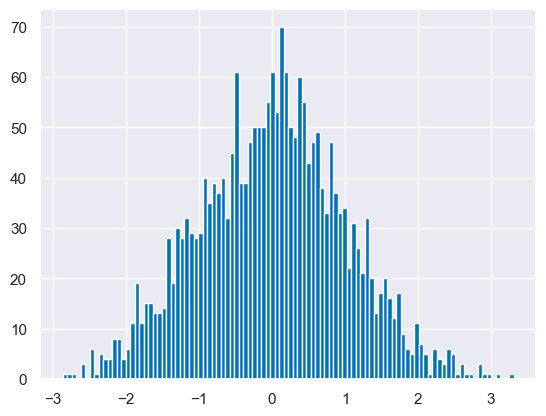

In [581]:
data["lrScaleGen"].hist(bins=100)

In [304]:
filter_items = ["Conservative","Labour","Like","vote","party","Most Important Issue","UKIP","Greens","Liberal Democrats"]

lrScale = {x:BES_label_list["2017"][x] for x in (list(set(lrScaleTop)) + list(set(lrScaleBottom)))}
alScale = {x:BES_label_list["2017"][x] for x in (list(set(alScaleTop)) + list(set(alScaleBottom)))}

lrScale_ser = pd.Series(lrScale)
lrScale_ser = lrScale_ser[~lrScale_ser.apply(lambda x: np.any([y in x for y in filter_items])  )].sort_index()
lrScale_ser

e01           E1 In politics people sometimes talk of left a...
f01_1         Ordinary working people get their fair share o...
f01_2         There is one law for the rich and one for the ...
f01_5         There is no need for strong trade unions to pr...
f01_6         Private enterprise is the best way to solve Br...
f01_7         Major public services and industries ought to ...
f01_8         It is the government's responsibility to provi...
f01_9         People should be allowed to organise public me...
f2                         F2 Are you generally in favour of...
j08                                           Better/worse: NHS
j10                        Importance of putting money into NHS
j11                                Higher/lower: cost of living
k03           K3 In which newspaper do you read about politi...
l03           L3 How do you think the general economic situa...
l04           L4 How do you think the general economic situa...
l09           L9 Do you think that gover

In [1428]:
alScale_ser = pd.Series(alScale)
alScale_ser = alScale_ser[~alScale_ser.apply(lambda x: np.any([y in x for y in filter_items]) )].sort_index()
alScale_ser

cses_q4_4                            Rich people buy elections
cses_q9      CSES_Q9 Please say to what extent you agree or...
dwel_type                                 Select dwelling type
e01          E1 In politics people sometimes talk of left a...
f01_1        Ordinary working people get their fair share o...
f01_2        There is one law for the rich and one for the ...
f01_5        There is no need for strong trade unions to pr...
f01_6        Private enterprise is the best way to solve Br...
f01_7        Major public services and industries ought to ...
f01_9        People should be allowed to organise public me...
j08                                          Better/worse: NHS
j10                       Importance of putting money into NHS
j11                               Higher/lower: cost of living
l03          L3 How do you think the general economic situa...
l04          L4 How do you think the general economic situa...
l09                                       Redistributio

In [ ]:
f01_10       People in Britain should be more tolerant of t...
f01_11       For some crimes, the death penalty is the most...
f01_12       People who break the law should be given stiff...
f01_3        Young people today don't have enough respect f...
f01_4        Censorship of films and magazines is necessary...
f01_9        People should be allowed to organise public me...

j01          J1 Do you think immigration is good or bad for...
j05                  Too many immigrants let into this country
j06                       Strength of opinion about immigrants

m02_1        Politicians don't care what people like me think
m02_5        Parties and politicians in the UK are more con...

# p02          P2 If there was another referendum on Britain'...
p03_1                                     EU integration: self
# p03a         P3a When Britain negotiates to leave the EU is...
# p03b         P3b After Brexit negotiations are finished wou...

q3_cses_1    Q3_CSES_1. Now thinking about minorities in Br...
q3_cses_2    Q3_CSES_2. Now thinking about minorities in Br...
q3_cses_3    Q3_CSES_3. Now thinking about minorities in Br...
q3_cses_4    Q3_CSES_4. Now thinking about minorities in Br...
q3_cses_5    Q3_CSES_5. Now thinking about minorities in Br...

q4_cses_2    Q4_CSES_2. How important do you think the foll...
q4_cses_3    Q4_CSES_3. How important do you think the foll...
q4_cses_5    Q4_CSES_5. How important do you think the foll...
# check out 1,2,3,4,5


r04                Gone too far: quality for blacks and asians



t01_1                                    Spend less on defence
t01_2                                Spend less on foreign aid

t02                              Limit privacy to fight terror
# r6           R6 Would you support or oppose re-introducing ...
    # grammar schools? -.26 str oppose
# v01          V1 Should the voting system be changed to allo... .2 keep same
# subjClass (wonder if auth are more likely to mis-identify?) family
# w03          W3 When you were growing up would you say your... .2 wc



w15_1        If welfare benefits weren't so generous, peopl...
# w15_2 student should be charged tuition fees?
w15_3        Many people who get social security don't real...


In [1538]:
var1 = "f01_3"
BES_label_list["2017"][var1],BES_df_list["2017"][var1].cat.categories

("Young people today don't have enough respect for traditional British values",
 Index(['Don't know', 'Strongly disagree', 'Disagree',
        'Neither agree nor disagree', 'Agree', 'Strongly agree'],
       dtype='object'))

In [1528]:

#     .cat.reorder_categories( ['Not stated', "Don't know",'Not important at all','Not very important', 
#                               'Fairly important','Very important'] ) 

# ['Not stated', 'Don't know', 'Strongly agree', 'Somewhat agree',
#        'Neither agree nor disagree', 'Somewhat disagree', 'Strongly disagree']

Index(['Don't know', 'Strongly disagree', 'Disagree',
       'Neither agree nor disagree', 'Agree', 'Strongly agree'],
      dtype='object')

In [1702]:
al_corr_list = ["f01_3","f01_4","f01_9","f01_10","f01_11","f01_12",
                "j01","j05",
#                 "m02_1","m02_2","m02_3","m02_4","m02_5","m02_6",
                "p03_1",
                'q3_cses_1','q3_cses_2','q3_cses_3','q3_cses_4','q3_cses_5',
                'q4_cses_1','q4_cses_2','q4_cses_3','q4_cses_4','q4_cses_5',
                "r04",
                "t01_1","t01_2", # 'Definitely should' < 'Probably should' < 'Doesn't matter either way' < 'Probably should not' < 'Definitely should not'
                "t02", # '0 Fight terrorism' < '1' < '2' ... '7' < '8' < '9' < '10 Protect civil liberties'
                "w15_1",
#                 "w15_2",
                "w15_3",]

replace_dict = {"Don't know":np.nan,'Don`t know':np.nan,'Not stated':np.nan}
al_values_raw = BES_df_list["2017"][al_corr_list]

al_values_raw["j05"] = al_values_raw["j05"] .cat.reorder_categories( ['Don`t know' , 'No, not too many' , 'Yes, too many'] ) 
# al_values_raw["j06"] = al_values_raw["j06"] .cat.reorder_categories( ['Don`t know', 'Not very strongly', 'Fairly strongly', 'Very strongly'] ) 

al_values_raw["q4_cses_1"] = al_values_raw["q4_cses_1"] .cat.reorder_categories( ['Not stated', "Don't know",
        'Not important at all','Not very important', 'Fairly important','Very important'] ) 
al_values_raw["q4_cses_2"] = al_values_raw["q4_cses_2"] .cat.reorder_categories( ['Not stated', "Don't know",
        'Not important at all','Not very important', 'Fairly important','Very important'] ) 
al_values_raw["q4_cses_3"] = al_values_raw["q4_cses_3"] .cat.reorder_categories( ['Not stated', "Don't know",
        'Not important at all','Not very important', 'Fairly important','Very important'] ) 
al_values_raw["q4_cses_4"] = al_values_raw["q4_cses_4"] .cat.reorder_categories( ['Not stated', "Don't know",
        'Not important at all','Not very important', 'Fairly important','Very important'] ) 
al_values_raw["q4_cses_5"] = al_values_raw["q4_cses_5"] .cat.reorder_categories( ['Not stated', "Don't know",
        'Not important at all','Not very important', 'Fairly important','Very important'] ) 

al_values_raw['q3_cses_1'] = al_values_raw['q3_cses_1'].cat.reorder_categories( ['Not stated' , "Don't know",
        'Strongly disagree','Somewhat disagree' ,'Neither agree nor disagree' ,'Somewhat agree' ,'Strongly agree' ,    ] )
al_values_raw['q3_cses_2'] = al_values_raw['q3_cses_2'].cat.reorder_categories( ['Not stated' , "Don't know",
        'Strongly disagree','Somewhat disagree' ,'Neither agree nor disagree' ,'Somewhat agree' ,'Strongly agree' ,    ] )
al_values_raw['q3_cses_3'] = al_values_raw['q3_cses_3'].cat.reorder_categories( ['Not stated' , "Don't know",
        'Strongly disagree','Somewhat disagree' ,'Neither agree nor disagree' ,'Somewhat agree' ,'Strongly agree' ,    ] )
al_values_raw['q3_cses_4'] = al_values_raw['q3_cses_4'].cat.reorder_categories( ['Not stated' , "Don't know",
        'Strongly disagree','Somewhat disagree' ,'Neither agree nor disagree' ,'Somewhat agree' ,'Strongly agree' ,    ] )
al_values_raw['q3_cses_5'] = al_values_raw['q3_cses_5'].cat.reorder_categories( ['Not stated' , "Don't know",
        'Strongly disagree','Somewhat disagree' ,'Neither agree nor disagree' ,'Somewhat agree' ,'Strongly agree' ,    ] )

al_values_raw['t01_1'] = al_values_raw['t01_1'].cat.reorder_categories( ["Don't know", 'Definitely should not', 'Probably should not',
                                                    "Doesn't matter either way", 'Probably should', 'Definitely should' ] )
al_values_raw['t01_2'] = al_values_raw['t01_2'].cat.reorder_categories( ["Don't know", 'Definitely should not', 'Probably should not',
                                                    "Doesn't matter either way", 'Probably should', 'Definitely should' ] )
al_values_raw["r04"] = al_values_raw["r04"].cat.reorder_categories( ['Don`t know', 'Not gone quite far enough',
                                 'Not gone nearly far enough', 'Is about right' , 'Gone a little too far', 'Gone much too far' ] )


al_values = al_values_raw.apply( lambda x: x.replace(replace_dict).cat.codes.replace(-1,np.nan) )

al_values_corr = al_values.corrwith(f2f_harmonised2017["alScale_bes2017"])
al_values_align = al_values_corr/(al_values_corr.abs())
al_values_acq = pd.Series(index = al_values_align.index)
# lr_values_acq = True
al_values_acq.loc[:]=True
al_values_acq.loc["t02"] = False
al_values_acq.loc["r04"] = False

al_values_acq.loc["q4_cses_1"] = False
al_values_acq.loc["q4_cses_2"] = False
al_values_acq.loc["q4_cses_3"] = False
al_values_acq.loc["q4_cses_4"] = False
al_values_acq.loc["q4_cses_5"] = False
# these maybe could be classed as 'acquiescent'

al_values_acq.loc["j01"] = False
# al_values_acq.loc["g01_1"] = False
# al_values_acq.loc["f2"] = False
al_values = (al_values - al_values.mean())/al_values.std()
pg.cronbach_alpha(al_values*al_values_align)


data2017[al_corr_list] = al_values*al_values_align
al_vals_type = al_values_acq*al_values_align
al_value_vars = al_corr_list

data2017["alScaleGen"]     = data2017[al_corr_list].mean(axis=1)
data2017["alScalePos"]     = data2017[al_corr_list][al_vals_type[al_vals_type==1 ].index].mean(axis=1)
data2017["alScaleNeutral"] = data2017[al_corr_list][al_vals_type[al_vals_type==0 ].index].mean(axis=1)
data2017["alScaleNeg"]     = data2017[al_corr_list][al_vals_type[al_vals_type==-1].index].mean(axis=1)

data2017[['alScaleGen', 'alScalePos', 'alScaleNeutral',
       'alScaleNeg']] = data2017[['alScaleGen', 'alScalePos', 'alScaleNeutral',
       'alScaleNeg']].apply(lambda x: (x-np.mean(x))/np.std(x))

herid_fel = {"Gen":[1,0,-1],"Pos":[1],"Neutral":[0],"Neg":[-1]}
cronbach_dict_al = {}
for subset in herid_fel.keys():
    cronbach_dict_al["alScale"+subset] = pg.cronbach_alpha(data2017[al_vals_type[al_vals_type.isin(herid_fel[subset])].index])

al_values_align2017 = al_values_align
al_vals_type2017 = al_vals_type
data2017["alScaleGap"] = data2017["alScalePos"]-data2017["alScaleNeg"]
al_corr_list2017 = al_corr_list

{k:BES_label_list["2017"][k]+"("+str(int(al_values_align.loc[k]))+")"  for k in al_corr_list}

{'f01_3': "Young people today don't have enough respect for traditional British values(1)",
 'f01_4': 'Censorship of films and magazines is necessary to uphold moral standards(1)',
 'f01_9': 'People should be allowed to organise public meetings to protest against the gove(-1)',
 'f01_10': 'People in Britain should be more tolerant of those who lead unconventional lives(-1)',
 'f01_11': 'For some crimes, the death penalty is the most appropriate sentence(1)',
 'f01_12': 'People who break the law should be given stiffer sentences(1)',
 'j01': "J1 Do you think immigration is good or bad for Britain's economy?(-1)",
 'j05': 'Too many immigrants let into this country(1)',
 'p03_1': 'EU integration: self(1)',
 'q3_cses_1': 'Q3_CSES_1. Now thinking about minorities in Britain.:Minorities should adapt to (1)',
 'q3_cses_2': 'Q3_CSES_2. Now thinking about minorities in Britain.:The will of the majority sh(1)',
 'q3_cses_3': 'Q3_CSES_3. Now thinking about minorities in Britain.:Immigrants are ge

In [1541]:
al_values_corr.sort_values()

q3_cses_3   -0.448737
f01_10      -0.427629
j01         -0.410260
f01_9       -0.367696
t02         -0.222880
t01_1       -0.220922
q4_cses_4    0.290921
r04          0.305145
q4_cses_1    0.368952
p03_1        0.368963
t01_2        0.380162
w15_3        0.407018
q3_cses_2    0.427509
q4_cses_5    0.428543
q4_cses_2    0.444154
q4_cses_3    0.449929
q3_cses_1    0.459750
w15_1        0.462271
q3_cses_5    0.495233
q3_cses_4    0.505576
j05          0.542071
f01_4        0.618446
f01_12       0.663653
f01_3        0.696391
f01_11       0.746082
dtype: float64

In [1546]:
vc = data2017[al_corr_list2017].corrwith( data2017["alScaleGap"] ).sort_values()
vc = pd.DataFrame(vc)
vc["type"]  = al_vals_type2017.loc[vc.index]
vc["align"]  = al_values_align2017.loc[vc.index]
vc

,0,type,align
f01_9,-0.476503,-1.0,-1.0
f01_10,-0.394046,-1.0,-1.0
t01_1,-0.255598,-1.0,-1.0
q3_cses_3,-0.048721,-1.0,-1.0
t02,0.081028,-0.0,-1.0
r04,0.084277,0.0,1.0
j01,0.126203,-0.0,-1.0
q4_cses_4,0.197230,0.0,1.0
q4_cses_1,0.234983,0.0,1.0
q4_cses_3,0.244228,0.0,1.0


In [1703]:
temp_lavaan = data2017.copy()
temp_lavaan[al_corr_list2017] = temp_lavaan[al_corr_list2017]*al_values_align2017

desc_al = "AuthUncorrected =~ "+" + ".join(al_corr_list2017)
desc_al_acq = "AuthCorrected =~ "+" + ".join(al_corr_list2017)+"\nAcq =~ a*"+"\
    + a*".join(al_vals_type2017[al_vals_type2017!=0].index)

temp_lavaan["comp_model"] = desc_al
temp_lavaan["full_model"] = desc_al_acq
temp_lavaan["id"] = temp_lavaan.index
pyreadr.write_rdata('E:\\Users\\Gamer\\Documents\\GitHub\\BES_analysis\\BES_analysis_code\\'+\
                        'Correcting-Acquiescence-Unbalanced-Replication\\data\\'+"data2017_al.RData",
                    temp_lavaan[list(al_corr_list2017)+['id',"comp_model","full_model"]].dropna(), df_name="df")

In [1704]:
lavaan_output = pyreadr.read_r('E:\\Users\\Gamer\\Documents\\GitHub\\BES_analysis\\BES_analysis_code\\'+\
                        'Correcting-Acquiescence-Unbalanced-Replication\\data\\data2017_al_lavaan.RData')['save_df']
lavaan_output.index = temp_lavaan[list(al_corr_list2017)+['id',"comp_model","full_model"]].dropna().index
data2017[lavaan_output.columns[-3:]] = lavaan_output[lavaan_output.columns[-3:]]

In [1705]:
scale_list = ["alScaleGen","alScalePos","alScaleNeutral","alScaleNeg",]+list(lavaan_output.columns[-3:])
demo_list = ["edlevel","age","gender","housing","inc_norm","bloc_complete"]
wt_var = "wt"
al_reg_2017 = pd.DataFrame(columns = scale_list)
al_reg_2017.loc["cronbach"] = np.nan
al_reg_2017.loc["cronbach",cronbach_dict_al.keys()] = [x[0] for x in cronbach_dict_al.values()]

for demo_var in demo_list:

    temp = get_gen_corrs(data=data2017,scale_list=scale_list,demo_var=demo_var,wt_var=wt_var)
    for ind in temp.index:
        al_reg_2017.loc[ind] = temp.loc[ind]

# lr_reg_2015.loc["age"] = lr_reg_2015.loc["age"]*100        
al_reg_2017

,alScaleGen,alScalePos,alScaleNeutral,alScaleNeg,AuthUncorrected,AuthCorrected,Acq
cronbach,0.911975,0.882235,0.802626,0.439630,NaN,NaN,NaN
edlevel_GCSE/equiv,-0.087659,-0.090473,-0.111051,0.017768,-0.162315,-0.159390,-0.000972
edlevel_A-level/equiv,-0.467260,-0.397070,-0.411800,-0.313311,-0.663169,-0.657884,0.057317
edlevel_Undergrad,-0.710364,-0.674060,-0.615404,-0.355951,-0.796751,-0.788112,0.051295
edlevel_Postgrad,-1.245011,-1.170287,-0.990941,-0.714898,-1.319027,-1.319049,0.200772
edlevel_int,0.425367,0.406261,0.350961,0.228688,0.599057,0.594679,-0.055670
age,1.304760,1.368404,0.843384,0.462964,1.560700,1.515597,0.124268
age_int,-0.627149,-0.648280,-0.419234,-0.219758,-0.793851,-0.770270,-0.068800
gender,0.025866,0.000498,0.046403,0.050748,-0.062773,-0.054326,-0.057753
gender_int,0.002748,0.025160,-0.025362,-0.017406,0.049945,0.046125,0.021616


In [1799]:
temp_lavaan = data2017.copy()
temp_lavaan[al_corr_list2017] = temp_lavaan[al_corr_list2017]*al_values_align2017
temp_lavaan[lr_corr_list2017] = temp_lavaan[lr_corr_list2017]*lr_values_align2017

desc_al = "AuthUncorrected =~ "+" + ".join(al_corr_list2017) +"\n" + "LeftUncorrected =~ "+" + ".join(lr_corr_list2017)
desc_al_acq = "AuthCorrected =~ "+" + ".join(al_corr_list2017)+"\n" +\
    "LeftCorrected =~ "+" + ".join(lr_corr_list2017)+"\n" +\
    "Acq =~ a*"+"+ a*".join((list(al_vals_type2017[al_vals_type2017!=0].index))+(list(lr_vals_type2017[lr_vals_type2017!=0].index)) )

temp_lavaan["comp_model"] = desc_al
temp_lavaan["full_model"] = desc_al_acq
temp_lavaan["id"] = temp_lavaan.index

uniq_cols = list(set( list(al_corr_list2017)+list(lr_corr_list2017) ))

pyreadr.write_rdata('E:\\Users\\Gamer\\Documents\\GitHub\\BES_analysis\\BES_analysis_code\\'+\
                        'Correcting-Acquiescence-Unbalanced-Replication\\data\\'+"data2017_al_lr3.RData",
                    temp_lavaan[uniq_cols+['id',"comp_model","full_model"]].dropna(), df_name="df")

In [1800]:
lavaan_output = pyreadr.read_r('E:\\Users\\Gamer\\Documents\\GitHub\\BES_analysis\\BES_analysis_code\\'+\
                        'Correcting-Acquiescence-Unbalanced-Replication\\data\\data2017_al_lr_lavaan.RData')['save_df']
lavaan_output.index = temp_lavaan[uniq_cols+['id',"comp_model","full_model"]].dropna().index
lavaan_columns = ["al_lr_"+x for x in lavaan_output.columns[-5:]]
data2017[lavaan_columns] = lavaan_output[lavaan_output.columns[-5:]]

In [1801]:
scale_list = ["alScaleGen","alScalePos","alScaleNeutral","alScaleNeg","lrScaleGen","lrScalePos","lrScaleNeutral","lrScaleNeg",]+lavaan_columns
demo_list = ["edlevel","age","gender","housing","inc_norm","bloc_complete"]
wt_var = "wt"
al_lr_reg_2017 = pd.DataFrame(columns = scale_list)
al_lr_reg_2017.loc["cronbach"] = np.nan
al_lr_reg_2017.loc["cronbach",cronbach_dict_al.keys()] = [x[0] for x in cronbach_dict_al.values()]

for demo_var in demo_list:
    temp = get_gen_corrs(data=data2017,scale_list=scale_list,demo_var=demo_var,wt_var=wt_var)
    for ind in temp.index:
        al_lr_reg_2017.loc[ind] = temp.loc[ind]      
al_lr_reg_2017

,alScaleGen,alScalePos,alScaleNeutral,alScaleNeg,lrScaleGen,lrScalePos,lrScaleNeutral,lrScaleNeg,al_lr_AuthUncorrected,al_lr_LeftUncorrected,al_lr_AuthCorrected,al_lr_LeftCorrected,al_lr_Acq
cronbach,0.911975,0.882235,0.802626,0.439630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
edlevel_GCSE/equiv,-0.087659,-0.090473,-0.111051,0.017768,-0.106148,-0.166889,-0.013003,-0.030514,-0.101402,0.043621,-0.106897,0.058800,-0.090597
edlevel_A-level/equiv,-0.467260,-0.397070,-0.411800,-0.313311,-0.271430,-0.362373,-0.039172,-0.139378,-0.597364,-0.265503,-0.592986,-0.231559,-0.472552
edlevel_Undergrad,-0.710364,-0.674060,-0.615404,-0.355951,-0.124433,-0.370259,0.029139,0.134050,-0.728272,0.006536,-0.713304,0.019509,-0.626273
edlevel_Postgrad,-1.245011,-1.170287,-0.990941,-0.714898,-0.241690,-0.596212,0.049681,0.104321,-1.188972,-0.237654,-1.180113,-0.228543,-0.887969
edlevel_int,0.425367,0.406261,0.350961,0.228688,0.155000,0.283578,0.053148,-0.019316,0.572946,0.141876,0.568596,0.129059,0.452017
age,1.304760,1.368404,0.843384,0.462964,0.505788,0.774625,-0.075504,0.264781,1.473514,0.550448,1.452122,0.554922,0.957007
age_int,-0.627149,-0.648280,-0.419234,-0.219758,-0.222897,-0.352628,0.092133,-0.139534,-0.743836,-0.225157,-0.730622,-0.225438,-0.490608
gender,0.025866,0.000498,0.046403,0.050748,-0.122112,-0.053834,-0.188764,-0.053587,-0.151254,-0.119925,-0.149355,-0.107753,-0.114511
gender_int,0.002748,0.025160,-0.025362,-0.017406,0.087111,0.054796,0.149589,0.017912,0.113789,0.128848,0.114737,0.125805,0.073145


In [1547]:
var1 = "q3_cses_3"
BES_label_list["2017"][var1],BES_df_list["2017"][var1].cat.categories

('Q3_CSES_3. Now thinking about minorities in Britain.:Immigrants are generally go',
 Index(['Not stated', 'Don't know', 'Strongly agree', 'Somewhat agree',
        'Neither agree nor disagree', 'Somewhat disagree', 'Strongly disagree'],
       dtype='object'))

In [1548]:
var1 = "q4_cses_5"
BES_label_list["2017"][var1],BES_df_list["2017"][var1].cat.categories

('Q4_CSES_5. How important do you think the following is for being truly British:T',
 Index(['Not stated', 'Don't know', 'Very important', 'Fairly important',
        'Not very important', 'Not important at all'],
       dtype='object'))

In [1459]:
WCorMC = BES_df_list["2017"]["w03"].replace('Don`t know',np.nan).replace('Upper class',"Middle class")
WCorMC = WCorMC.apply(lambda x: np.nan if pd.isna(x) else x=="Middle class").astype('float')
WCorMC.value_counts(dropna=False)
ns_sec_analytic = BES_df_list["2017"]["ns_sec_analytic"]
soc_lib_auth_complete = f2f_harmonised2017["soc_lib_auth_complete"]
mask = WCorMC.notnull() & ns_sec_analytic.notnull() & soc_lib_auth_complete

In [1462]:
WCorMC.groupby(ns_sec_analytic).mean().sort_index()

ns_sec_analytic
Employers in large organisations and higher managerial      0.379747
Higher professional occupations                             0.519417
Lower professional and managerial and higher supervisory    0.343636
Intermediate occupations                                    0.212355
Employers in small organisations and own account workers    0.290155
Lower supervisory and technical occupations                 0.228916
Semi-routine occupations                                    0.170807
Routine occupations                                         0.110619
Name: w03, dtype: float64

In [ ]:
[WCorMC.groupby(ns_sec_analytic).corr().sort_index()

In [1466]:
pd.concat([WCorMC,soc_lib_auth_complete],axis=1).groupby(ns_sec_analytic).corr()

w03  \
ns_sec_analytic                                                                      
Employers in large organisations and higher man... w03                    1.000000   
                                                   soc_lib_auth_complete -0.324442   
Higher professional occupations                    w03                    1.000000   
                                                   soc_lib_auth_complete -0.164447   
Lower professional and managerial and higher su... w03                    1.000000   
                                                   soc_lib_auth_complete -0.189891   
Intermediate occupations                           w03                    1.000000   
                                                   soc_lib_auth_complete -0.067796   
Employers in small organisations and own accoun... w03                    1.000000   
                                                   soc_lib_auth_complete -0.237254   
Lower supervisory and technical occupations        w03                    1.000000   
                                                   soc_lib_auth_complete -0.170507   
Semi-routine occupations                           w03                    1.000000   
                                                   soc_lib_auth_complete -0.150858   
Routine occupations                                w03                    1.000000   
                                                   soc_lib_auth_complete -0.015370   

                                                                          soc_lib_auth_complete  
ns_sec_analytic                                                                                  
Employers in large organisations and higher man... w03                                -0.324442  
                                                   soc_lib_auth_complete               1.000000  
Higher professional occupations                    w03                                -0.164447  
                                                   soc_lib_auth_complete               1.000000  
Lower professional and managerial and higher su... w03                                -0.189891  
                                                   soc_lib_auth_complete               1.000000  
Intermediate occupations                           w03                                -0.067796  
                                                   soc_lib_auth_complete               1.000000  
Employers in small organisations and own accoun... w03                                -0.237254  
                                                   soc_lib_auth_complete               1.000000  
Lower supervisory and technical occupations        w03                                -0.170507  
                                                   soc_lib_auth_complete               1.000000  
Semi-routine occupations                           w03                                -0.150858  
                                                   soc_lib_auth_complete               1.000000  
Routine occupations                                w03                                -0.015370  
                                                   soc_lib_auth_complete               1.000000

In [241]:
# ## decent correlation between my scale variables and Phil Swatton's
# cronbach alphas not great, not terrible

print(f2f_harmonised[f2f_harmonised["dataset"]=="2017"]["ec_left_right"].corr(values[["f01_1","f01_5","f01_6","f01_2","f01_7","f01_8",]].dropna().mean(axis=1)),\
    f2f_harmonised[f2f_harmonised["dataset"]=="2017"]["soc_lib_auth"].corr(values[["f01_3","f01_4","f01_11","f01_12","f01_9","f01_10",]].dropna().mean(axis=1)))
import pingouin as pg 
pg.cronbach_alpha( values[["f01_1","f01_5","f01_6","f01_2","f01_7","f01_8",]] )   , pg.cronbach_alpha( values[["f01_3","f01_4","f01_11","f01_12","f01_9","f01_10",]] )

# these are the variables I used for my scales
# f01_1    0.686108
# f01_5    0.634757
# f01_6    0.659145
# f01_2    0.654707 - this one is negative, so my scale was 'weakly balanced'

# f01_3     0.756070
# f01_4     0.662818
# f01_11    0.778315
# f01_12    0.734228

0.8947414776461429 0.9321077487825085


((0.5875693317972919, array([0.56 , 0.614])),
 (0.6351717573567419, array([0.611, 0.658])))

In [1391]:
# BES_label_list["2019"]

In [1392]:
# BES_label_list["2015"]

In [1390]:
# {k:v for k,v in BES_label_list["2010"].items() if "cq1" in k}

In [ ]:
##########################################
# repeat for 2019

In [1554]:
f2f_harmonised2019.columns

Index(['dataset', 'uid', 'housing_det', 'housing', 'inc', 'vote', 'year', 'wt',
       'age', 'vote_simple',
       ...
       'censorship', 'strongtu', 'enterprise', 'toughlaw', 'death',
       'ec_left_right', 'soc_lib_auth', 'soc_lib_auth_complete',
       'ec_left_right_complete', 'edlevel'],
      dtype='object', length=105)

In [1557]:
f2f_harmonised2019 = f2f_harmonised[f2f_harmonised["dataset"]=="2019"]

df = pd.get_dummies(BES_df_list["2019"].select_dtypes('category'))
lrScaleTop    = ["_".join( x.split("_")[:-1] ) for x in df.corrwith(f2f_harmonised2019["ec_left_right_complete"]).dropna().sort_values().head(50).index]
lrScaleBottom = ["_".join( x.split("_")[:-1] ) for x in df.corrwith(f2f_harmonised2019["ec_left_right_complete"]).dropna().sort_values().tail(50).index]
alScaleTop    = ["_".join( x.split("_")[:-1] ) for x in df.corrwith(f2f_harmonised2019["soc_lib_auth_complete"]).dropna().sort_values().head(50).index]
alScaleBottom = ["_".join( x.split("_")[:-1] ) for x in df.corrwith(f2f_harmonised2019["soc_lib_auth_complete"]).dropna().sort_values().tail(50).index]

BES_df_list["2019"].select_dtypes('number').corrwith(f2f_harmonised2019["ec_left_right_complete"]).sort_values()
# ns_sec, Q24_CSES

ns_sec            -0.076685
total_num_hous    -0.031408
wt_vote           -0.027113
wt_vote_cses      -0.025787
Y10A              -0.014742
total_num_dwel    -0.009368
Stratum           -0.009020
finalserialno     -0.001967
wt_sel_wt          0.005905
wt_demog           0.007405
pano               0.008102
wt_vote_f2f        0.008547
wt_demog_f2f       0.011269
wt_demog_cses      0.013905
num_elig_people    0.014993
Q24_CSES           0.071057
dtype: float64

In [1559]:
BES_df_list["2019"].select_dtypes('number').corrwith(f2f_harmonised2019["soc_lib_auth_complete"]).sort_values()

num_elig_people   -0.072672
total_num_dwel    -0.068897
wt_demog_f2f      -0.064481
Y10A              -0.062715
wt_sel_wt         -0.055893
total_num_hous    -0.035654
wt_demog          -0.034347
finalserialno     -0.010280
pano               0.005287
Stratum            0.016266
wt_vote_f2f        0.030043
wt_vote            0.037338
Q24_CSES           0.038306
wt_demog_cses      0.048178
wt_vote_cses       0.098866
ns_sec             0.249377
dtype: float64

In [1575]:
filter_items = ["conservative","labour","like","vote","party","most important issue","ukip","greens","liberal democrats","lib dems",
                "left-right","education","qualification","newspaper","brexit","class","relig","knowledge"]

lrScale = {x:BES_label_list["2019"][x] for x in (list(set(lrScaleTop)) + list(set(lrScaleBottom)))}
alScale = {x:BES_label_list["2019"][x] for x in (list(set(alScaleTop)) + list(set(alScaleBottom)))}

lrScale_ser = pd.Series(lrScale)
lrScale_ser = lrScale_ser[~lrScale_ser.apply(lambda x: np.any([y in x.lower() for y in filter_items])  )].sort_index()
alScale_ser = pd.Series(alScale)
alScale_ser = alScale_ser[~alScale_ser.apply(lambda x: np.any([y in x.lower() for y in filter_items])  )].sort_index()
lrScale_ser

Q12_CSES     The Govt should take measures to reduce differ...
Q2_CSES_8    Most politicians only care about the interests...
Q6_CSES      How good or bad a job do you think the UK Govt...
f01_1        Ordinary working people get their fair share o...
f01_2        There is one law for the rich and one for the ...
f01_5        There is no need for strong trade unions to pr...
f01_6        Private enterprise is the best way to solve Br...
f01_7        Major public services and industries ought to ...
f01_9        People should be allowed to organise public pr...
f2              In favour of nationalisation or privatisation?
l03          Expected general economic situation in this co...
l09          How should Govt approach income inequality? Yo...
m01                    Satisfaction with democracy in Britain?
n03                      Trust British politicians in general?
p03b                        In favour of second EU referendum?
r03                           Gone too far: equality fo

In [1576]:
alScale_ser

Q11_CSES_4              Happy/sad if United Kingdom left the EU
Q2_CSES_6     A strong leader in Govt is good for Britain ev...
Q3_CSES_1     Minorities should adapt to customs and traditi...
Q3_CSES_2     Will of the majority should prevail, even over...
Q3_CSES_3     Immigrants are generally good for Britain's ec...
Q3_CSES_4     Britain's culture is generally harmed by immig...
Q3_CSES_5            Immigrants increase crime rates in Britain
Q4_CSES_1                     Importance for British: Born here
Q4_CSES_2              Importance for British: British ancestry
Q4_CSES_4     Importance for British: Follow customs and tra...
Q6_CSES       How good or bad a job do you think the UK Govt...
f01_11        For some crimes, the death penalty is the most...
f01_12        People who break the law should be given stiff...
f01_3         Young people today don't have enough respect f...
f01_4         Censorship of films and magazines is necessary...
f01_9         People should be allowed t

In [1588]:
BES_df_list["2019"]["j05"]

0          Yes, too many
1          Yes, too many
2       No, not too many
3          Yes, too many
4          Yes, too many
              ...       
3941    No, not too many
3942       Yes, too many
3943       Yes, too many
3944    No, not too many
3945       Yes, too many
Name: j05, Length: 3946, dtype: category
Categories (4, object): ['Not stated' < 'Don't know' < 'Yes, too many' < 'No, not too many']

-0.20851014049556255


0.0      16
1.0     285
2.0    1312
3.0     724
4.0    1201
5.0     342
NaN      66
Name: count, dtype: int64

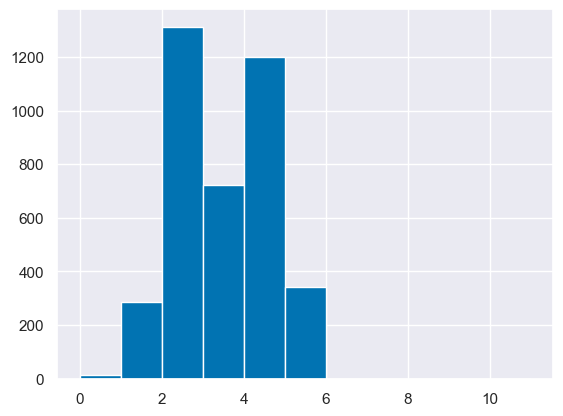

In [660]:
taxSpendSelf = BES_df_list["2019"]["f01_8"].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)#.corr( f2f_harmonised2019["ec_left_right_complete"] )
print( taxSpendSelf.corr(f2f_harmonised2019["ec_left_right_complete"]) )
taxSpendSelf.hist(bins=range(0,12));
taxSpendSelf.value_counts(dropna=False).sort_index()

# corr is in direction you expect (more Ec Right less likely to support Higher Taxes for more on health/social services)
# interesting how weak it is!

In [1401]:
lr_corr_list = ["f01_1","f01_2","f01_5","f01_6","f01_7","f01_8","f01_9",
                "l09",
                "f2","f3",
                "g01_1",
                "Q12_CSES","Q2_CSES_8",
                "w11","w12",
                "w15_1","w15_2",
#                 "w15_3",
               ]

replace_dict = {"Don't know":np.nan,'Don`t know':np.nan,'Not stated':np.nan}
lr_values_raw = BES_df_list["2019"][lr_corr_list]

lr_values_raw["w11"] = lr_values_raw["w11"]\
    .cat.reorder_categories(["Don't know", "Don't have too much power","Have too much power" ,])
lr_values_raw["w12"] = lr_values_raw["w12"]\
    .cat.reorder_categories(["Don't know", "Does not have too much power", 'Has too much power'])
lr_values_raw["Q2_CSES_8"] = lr_values_raw["Q2_CSES_8"].cat.reorder_categories( ['Not stated',"Don't know",
 'Strongly disagree', 'Somewhat disagree', 'Neither agree nor disagree', 'Somewhat agree', 'Strongly agree', ] )
lr_values_raw["Q12_CSES"]  = lr_values_raw["Q12_CSES"].cat.reorder_categories( ['Not stated',"Don't know",
 'Strongly disagree', 'Somewhat disagree', 'Neither agree nor disagree', 'Somewhat agree', 'Strongly agree', ] )
lr_values_raw['f3'] = lr_values_raw['f3'].cat.reorder_categories( ["Don't know", 'Definitely should not', 'Probably should not',
                                                    "Doesn't matter either way", 'Probably should', 'Definitely should' ] )
lr_values_raw['f2'] = lr_values_raw['f2'].cat.reorder_categories( ["Don't know",
    'More nationalisation of companies by government', 'or, should things be left as they are now?',
                                                                   'More privatisation of companies by government',] )

lr_values = lr_values_raw.apply( lambda x: x.replace(replace_dict).cat.codes.replace(-1,np.nan) )

lr_values_corr = lr_values.corrwith(f2f_harmonised2019["ec_left_right_complete"])
lr_values_align = lr_values_corr/(lr_values_corr.abs())
lr_values_acq = pd.Series(index = lr_values_align.index)
# lr_values_acq = True
lr_values_acq.loc[:]=True
lr_values_acq.loc["l09"] = False
lr_values_acq.loc["g01_1"] = False
lr_values_acq.loc["f2"] = False
lr_values = (lr_values - lr_values.mean())/lr_values.std()
# pg.cronbach_alpha(lr_values*lr_values_align)
# pretty good!
data = lr_values*lr_values_align
lr_vals_type = lr_values_acq*lr_values_align
lr_value_vars = lr_corr_list

data["age"] = f2f_harmonised2019["age"]/100
data["wt"] = f2f_harmonised2019["wt"]
data["edlevel"] = f2f_harmonised2019["edlevel"]
data["gender"] = f2f_harmonised2019["gender"]
data["housing"] = f2f_harmonised2019["housing"]
data["inc_norm"] = f2f_harmonised2019["inc_norm"]
data["bloc_complete"] = f2f_harmonised2019["bloc_complete"]
data["housing"] = data["housing"].astype('category')
data["bloc_complete"] = data["bloc_complete"].astype('category')

data["lrScaleGen"] = data[lr_corr_list].mean(axis=1)
data["lrScalePos"] = data[lr_corr_list][lr_vals_type[lr_vals_type==1].index].mean(axis=1)
data["lrScaleNeutral"] = data[lr_corr_list][lr_vals_type[lr_vals_type==0].index].mean(axis=1)
data["lrScaleNeg"] = data[lr_corr_list][lr_vals_type[lr_vals_type==-1].index].mean(axis=1)

lr_scale_set = ['lrScaleGen', 'lrScalePos', 'lrScaleNeutral', 'lrScaleNeg']

data[lr_scale_set] = data[lr_scale_set].apply(lambda x: (x-np.mean(x))/np.std(x))

# data[["ec_left_right_complete","lrScale_bes2017",'lrScale_pos_bes2017','lrScale_neg_bes2017']] = f2f_harmonised2017[["ec_left_right_complete","lrScale_bes2017",'lrScale_pos_bes2017','lrScale_neg_bes2017']]

herid_fel = {"Gen":[1,0,-1],"Pos":[1],"Neutral":[0],"Neg":[-1]}
cronbach_dict = {}
for subset in herid_fel.keys():
    cronbach_dict["lrScale"+subset] = pg.cronbach_alpha(data[lr_vals_type[lr_vals_type.isin(herid_fel[subset])].index])
    
data2019 = data

lr_values_align2019 = lr_values_align
lr_vals_type2019 = lr_vals_type
data2019["lrScaleGap"] = data2019["lrScalePos"]-data2019["lrScaleNeg"]
lr_corr_list2019 = lr_corr_list

{k:BES_label_list["2019"][k]+"("+str(int(lr_values_align.loc[k]))+")"  for k in lr_corr_list}

{'f01_1': "Ordinary working people get their fair share of the nation's wealth(1)",
 'f01_2': 'There is one law for the rich and one for the poor(-1)',
 'f01_5': 'There is no need for strong trade unions to protect working conditions and wages(1)',
 'f01_6': "Private enterprise is the best way to solve Britain's economic problems(1)",
 'f01_7': 'Major public services and industries ought to be in state ownership(-1)',
 'f01_8': "Govt's responsibility to provide a job for everyone who wants one(-1)",
 'f01_9': 'People should be allowed to organise public protests against the government(-1)',
 'l09': 'How should Govt approach income inequality? Yourself(1)',
 'f2': 'In favour of nationalisation or privatisation?(1)',
 'f3': 'Should the Govt get rid of private education in Britain?(-1)',
 'g01_1': 'Tax/spend: Yourself(-1)',
 'Q12_CSES': 'The Govt should take measures to reduce differences in income levels(-1)',
 'Q2_CSES_8': 'Most politicians only care about the interests of the rich and 

In [707]:
print(semopy.efa.explore_cfa_model(lr_values.dropna(),min_loadings=2))

eta1 =~ Q12_CSES + l09 + f01_2 + Q2_CSES_8 + f3 + f01_1 + w12 + f01_8 + w15_2
eta2 =~ Q12_CSES + l09 + f01_6 + f01_5 + f3 + w15_1 + w11 + w15_2 + f01_9 + f01_8 + g01_1
eta3 =~ f01_7 + f01_6 + f2 + f01_5 + f3 + Q2_CSES_8 + w11
eta4 =~ f01_2 + f01_7 + f01_5 + f01_1 + w12 + f01_9



In [706]:
print(semopy.efa.explore_cfa_model(lr_values.dropna(),min_loadings=3))

eta1 =~ Q12_CSES + l09 + f01_7 + f01_6 + f2 + f01_2 + f01_5 + f3 + f01_1 + w15_1 + w11 + Q2_CSES_8 + w12 + w15_2 + f01_8 + f01_9 + g01_1



In [1802]:
temp_lavaan = data2019.copy()
temp_lavaan[lr_value_vars] = temp_lavaan[lr_value_vars]*lr_values_align

desc_lr = "LeftUncorrected =~ "+" + ".join(lr_value_vars)
desc_lr_acq = "LeftCorrected =~ "+" + ".join(lr_value_vars)+"\nAcq =~ a*"+" + a*".join(lr_vals_type[lr_vals_type!=0].index)

temp_lavaan["comp_model"] = desc_lr
temp_lavaan["full_model"] = desc_lr_acq
temp_lavaan["id"] = temp_lavaan.index
pyreadr.write_rdata('E:\\Users\\Gamer\\Documents\\GitHub\\BES_analysis\\BES_analysis_code\\'+\
                        'Correcting-Acquiescence-Unbalanced-Replication\\data\\'+"data2019.RData",
                    temp_lavaan[list(lr_value_vars)+['id',"comp_model","full_model"]].dropna(), df_name="df")


KeyError: "['cses_q9', 'cses_q4_4', 'w15_3', 'w15_4'] not in index"

In [1803]:
lavaan_output = pyreadr.read_r('E:\\Users\\Gamer\\Documents\\GitHub\\BES_analysis\\BES_analysis_code\\'+\
                        'Correcting-Acquiescence-Unbalanced-Replication\\data\\data2019_lavaan.RData')['save_df']
lavaan_output.index = temp_lavaan[list(lr_value_vars)+['id',"comp_model","full_model"]].dropna().index
data2019[lavaan_output.columns[-3:]] = lavaan_output[lavaan_output.columns[-3:]]

KeyError: "['cses_q9', 'cses_q4_4', 'w15_3', 'w15_4', 'id', 'comp_model', 'full_model'] not in index"

In [1308]:
scale_list = ["lrScaleGen","lrScalePos","lrScaleNeutral","lrScaleNeg",]+list(lavaan_output.columns[-3:])
demo_list = ["edlevel","age","gender","housing","inc_norm","bloc_complete"]
wt_var = "wt"
lr_reg_2019 = pd.DataFrame(columns = scale_list)
lr_reg_2019.loc["cronbach"] = np.nan
lr_reg_2019.loc["cronbach",cronbach_dict.keys()] = [x[0] for x in cronbach_dict.values()]

for demo_var in demo_list:

    temp = get_gen_corrs(data=data2019,scale_list=scale_list,demo_var=demo_var,wt_var=wt_var)
    for ind in temp.index:
        lr_reg_2019.loc[ind] = temp.loc[ind]
        
lr_reg_2019

,lrScaleGen,lrScalePos,lrScaleNeutral,lrScaleNeg,LeftUncorrected,LeftCorrected,Acq
cronbach,0.822316,0.646105,0.425321,0.706115,NaN,NaN,NaN
edlevel_GCSE/equiv,-0.042857,-0.190771,-0.031240,0.068875,-0.054144,-0.061024,0.183927
edlevel_A-level/equiv,-0.065656,-0.225203,0.012603,0.031247,-0.002085,-0.011022,0.223239
edlevel_Undergrad,-0.028980,-0.255020,-0.031869,0.154845,-0.020063,-0.030847,0.283756
edlevel_Postgrad,-0.196108,-0.437899,-0.060785,0.010957,-0.199458,-0.215770,0.418574
edlevel_int,0.028342,0.188241,0.029288,-0.096470,-0.008255,0.001228,-0.233690
age,0.421485,0.630528,-0.209074,0.373544,0.539816,0.547449,-0.145540
age_int,-0.226315,-0.309696,0.116632,-0.220623,-0.328864,-0.331728,0.059014
gender,-0.104621,-0.168208,-0.139949,-0.007047,-0.114261,-0.118131,0.073892
gender_int,0.035976,0.088491,0.083160,-0.031683,-0.001333,0.001370,-0.047465


In [1689]:
al_corr_list = ["f01_3","f01_4","f01_9","f01_10","f01_11","f01_12",
                "j01","j05",
#                 "m02_1","m02_2","m02_3","m02_4","m02_5","m02_6",
                "p03_1",
                "Q2_CSES_1","Q2_CSES_2","Q2_CSES_3","Q2_CSES_4", "Q2_CSES_5","Q2_CSES_6","Q2_CSES_7","Q2_CSES_8",
                'Q3_CSES_1','Q3_CSES_2','Q3_CSES_3','Q3_CSES_4','Q3_CSES_5',
                'Q4_CSES_1','Q4_CSES_2','Q4_CSES_3','Q4_CSES_4',
                "r03","r04","r07",
                "t01_1","t01_2", # 'Definitely should' < 'Probably should' < 'Doesn't matter either way' < 'Probably should not' < 'Definitely should not'
#                 "t02", # '0 Fight terrorism' < '1' < '2' ... '7' < '8' < '9' < '10 Protect civil liberties'
                "w15_1",
#                 "w15_2",
#                 "w15_3",
               ]

replace_dict = {"Don't know":np.nan,'Don`t know':np.nan,'Not stated':np.nan}
al_values_raw = BES_df_list["2019"][al_corr_list]

al_values_raw["j05"] = al_values_raw["j05"] .cat.reorder_categories( ['Not stated', "Don't know" , 'No, not too many' , 'Yes, too many'] ) 
# al_values_raw["j06"] = al_values_raw["j06"] .cat.reorder_categories( ['Don`t know', 'Not very strongly', 'Fairly strongly', 'Very strongly'] ) 
# 'Not stated', 'Don't know', 'Yes, too many', 'No, not too many'
for imp_var in ['Q4_CSES_1','Q4_CSES_2','Q4_CSES_3','Q4_CSES_4']:
    al_values_raw[imp_var] = al_values_raw[imp_var] .cat.reorder_categories( ['Not stated', "Don't know",
            'Not important at all','Not very important', 'Fairly important','Very important'] ) 

for agree_var in [ "Q2_CSES_1","Q2_CSES_2","Q2_CSES_3","Q2_CSES_4", "Q2_CSES_5","Q2_CSES_6","Q2_CSES_7","Q2_CSES_8",
                  'Q3_CSES_1','Q3_CSES_2','Q3_CSES_3','Q3_CSES_4','Q3_CSES_5',]:
    al_values_raw[agree_var] = al_values_raw[agree_var].cat.reorder_categories( ['Not stated' , "Don't know",
            'Strongly disagree','Somewhat disagree' ,'Neither agree nor disagree' ,'Somewhat agree' ,'Strongly agree' ,    ] )

al_values_raw['t01_1'] = al_values_raw['t01_1'].cat.reorder_categories( ["Don't know", 'Definitely should not', 'Probably should not',
                                                    "Doesn't matter either way", 'Probably should', 'Definitely should' ] )
al_values_raw['t01_2'] = al_values_raw['t01_2'].cat.reorder_categories( ["Don't know", 'Definitely should not', 'Probably should not',
                                                    "Doesn't matter either way", 'Probably should', 'Definitely should' ] )
al_values_raw["r03"] = al_values_raw["r03"].cat.reorder_categories( ["Don't know", 'Not gone quite far enough',
                                 'Not gone nearly far enough', 'Is about right' , 'Gone a little too far', 'Gone much too far' ] )

al_values_raw["r04"] = al_values_raw["r04"].cat.reorder_categories( ["Don't know", 'Not gone quite far enough',
                                 'Not gone nearly far enough', 'Is about right' , 'Gone a little too far', 'Gone much too far' ] )

al_values_raw["r07"] = al_values_raw["r07"].cat.reorder_categories( ['Not stated',"Don't know", 'Not gone quite far enough',
                                 'Not gone nearly far enough', 'Is about right' , 'Gone a little too far', 'Gone much too far' ] )
                                                                   
al_values = al_values_raw.apply( lambda x: x.replace(replace_dict).cat.codes.replace(-1,np.nan) )

al_values_corr = al_values.corrwith(f2f_harmonised2019["soc_lib_auth_complete"])
al_values_align = al_values_corr/(al_values_corr.abs())
al_values_acq = pd.Series(index = al_values_align.index)
# lr_values_acq = True
al_values_acq.loc[:]=True
# al_values_acq.loc["t02"] = False
al_values_acq.loc["r04"] = False
al_values_acq.loc["r03"] = False
al_values_acq.loc["r07"] = False

al_values_acq.loc["Q4_CSES_1"] = False
al_values_acq.loc["Q4_CSES_2"] = False
al_values_acq.loc["Q4_CSES_3"] = False
al_values_acq.loc["Q4_CSES_4"] = False
# al_values_acq.loc["q4_cses_5"] = False
# these maybe could be classed as 'acquiescent'

al_values_acq.loc["j01"] = False
al_values_acq.loc["p03_1"] = False
# al_values_acq.loc["f2"] = False
al_values = (al_values - al_values.mean())/al_values.std()
print(pg.cronbach_alpha(al_values*al_values_align))


data2019[al_corr_list] = al_values*al_values_align
al_vals_type = al_values_acq*al_values_align
al_value_vars = al_corr_list

data2019["alScaleGen"]     = data2019[al_corr_list].mean(axis=1)
data2019["alScalePos"]     = data2019[al_corr_list][al_vals_type[al_vals_type==1 ].index].mean(axis=1)
data2019["alScaleNeutral"] = data2019[al_corr_list][al_vals_type[al_vals_type==0 ].index].mean(axis=1)
data2019["alScaleNeg"]     = data2019[al_corr_list][al_vals_type[al_vals_type==-1].index].mean(axis=1)

data2019[['alScaleGen', 'alScalePos', 'alScaleNeutral',
       'alScaleNeg']] = data2019[['alScaleGen', 'alScalePos', 'alScaleNeutral',
       'alScaleNeg']].apply(lambda x: (x-np.mean(x))/np.std(x))

herid_fel = {"Gen":[1,0,-1],"Pos":[1],"Neutral":[0],"Neg":[-1]}
cronbach_dict_al = {}
for subset in herid_fel.keys():
    cronbach_dict_al["alScale"+subset] = pg.cronbach_alpha(data2019[al_vals_type[al_vals_type.isin(herid_fel[subset])].index])
print(cronbach_dict_al)
al_values_align2019 = al_values_align
al_vals_type2019 = al_vals_type
data2019["alScaleGap"] = data2019["alScalePos"]-data2019["alScaleNeg"]
al_corr_list2019 = al_corr_list

{k:BES_label_list["2019"][k]+"("+str(int(al_values_align.loc[k]))+")"  for k in al_corr_list}

(0.9039705694718857, array([0.9  , 0.908]))
{'alScaleGen': (0.9039705694718857, array([0.9  , 0.908])), 'alScalePos': (0.8604745170267403, array([0.854, 0.867])), 'alScaleNeutral': (0.8125291668805511, array([0.804, 0.821])), 'alScaleNeg': (0.4477887866535233, array([0.421, 0.474]))}


{'f01_3': "Young people today don't have enough respect for traditional British values(1)",
 'f01_4': 'Censorship of films and magazines is necessary to uphold moral standards(1)',
 'f01_9': 'People should be allowed to organise public protests against the government(-1)',
 'f01_10': 'People in Britain should be more tolerant of those who lead unconventional lives(-1)',
 'f01_11': 'For some crimes, the death penalty is the most appropriate sentence(1)',
 'f01_12': 'People who break the law should be given stiffer sentences(1)',
 'j01': 'Immigration bad or good for economy(-1)',
 'j05': 'Too many immigrants let into this country(1)',
 'p03_1': 'EU integration: Self(1)',
 'Q2_CSES_1': 'I understand the most important political issues of this country(-1)',
 'Q2_CSES_2': 'Compromise in politics really selling out principles(1)',
 'Q2_CSES_3': 'Most politicians do not care about the people(1)',
 'Q2_CSES_4': 'Most politicians are trustworthy(-1)',
 'Q2_CSES_5': 'Politicians are the main pro

In [1628]:
vc = data2019[al_corr_list2019].corrwith( data2019["alScaleGap"] ).sort_values()
vc = pd.DataFrame(vc)
vc["type"]  = al_vals_type2019.loc[vc.index]
vc["align"]  = al_values_align2019.loc[vc.index]
vc

,0,type,align
f01_9,-0.352873,-1.0,-1.0
Q2_CSES_1,-0.330061,-1.0,-1.0
f01_10,-0.303628,-1.0,-1.0
t01_1,-0.230226,-1.0,-1.0
Q2_CSES_4,-0.174127,-1.0,-1.0
Q3_CSES_3,-0.071203,-1.0,-1.0
r03,0.049004,0.0,1.0
r07,0.072560,0.0,1.0
r04,0.094863,0.0,1.0
j01,0.100960,-0.0,-1.0


In [1629]:
data2019[al_corr_list2019].corrwith( data2019["alScaleGen"] ).sort_values()

Q2_CSES_4    0.187765
Q2_CSES_1    0.230407
Q2_CSES_8    0.247324
Q2_CSES_7    0.315932
Q2_CSES_3    0.334551
Q2_CSES_5    0.341944
t01_1        0.366915
r03          0.389312
f01_4        0.391688
f01_9        0.414182
Q2_CSES_2    0.423215
f01_10       0.432493
Q4_CSES_3    0.454998
r07          0.490387
Q2_CSES_6    0.508661
w15_1        0.518906
r04          0.545461
p03_1        0.584832
f01_12       0.590035
t01_2        0.593906
Q4_CSES_1    0.607554
Q3_CSES_1    0.608720
Q3_CSES_2    0.610766
f01_3        0.620564
f01_11       0.625287
Q4_CSES_2    0.626649
j01          0.634940
Q3_CSES_3    0.638754
Q4_CSES_4    0.648528
j05          0.698024
Q3_CSES_5    0.725250
Q3_CSES_4    0.753134
dtype: float64

In [1699]:
temp_lavaan = data2019.copy()
temp_lavaan[al_corr_list2019] = temp_lavaan[al_corr_list2019]*al_values_align2019

desc_al = "AuthUncorrected =~ "+" + ".join(al_corr_list2019)
desc_al_acq = "AuthCorrected =~ "+" + ".join(al_corr_list2019)+"\nAcq =~ a*"+"\
    + a*".join(al_vals_type2019[al_vals_type2019!=0].index)

temp_lavaan["comp_model"] = desc_al
temp_lavaan["full_model"] = desc_al_acq
temp_lavaan["id"] = temp_lavaan.index
pyreadr.write_rdata('E:\\Users\\Gamer\\Documents\\GitHub\\BES_analysis\\BES_analysis_code\\'+\
                        'Correcting-Acquiescence-Unbalanced-Replication\\data\\'+"data2019_al.RData",
                    temp_lavaan[list(al_corr_list2019)+['id',"comp_model","full_model"]].dropna(), df_name="df")

In [1700]:
lavaan_output = pyreadr.read_r('E:\\Users\\Gamer\\Documents\\GitHub\\BES_analysis\\BES_analysis_code\\'+\
                        'Correcting-Acquiescence-Unbalanced-Replication\\data\\data2019_al_lavaan.RData')['save_df']
lavaan_output.index = temp_lavaan[list(al_corr_list2019)+['id',"comp_model","full_model"]].dropna().index
data2019[lavaan_output.columns[-3:]] = lavaan_output[lavaan_output.columns[-3:]]

In [1701]:
scale_list = ["alScaleGen","alScalePos","alScaleNeutral","alScaleNeg",]+list(lavaan_output.columns[-3:])
demo_list = ["edlevel","age","gender","housing","inc_norm","bloc_complete"]
wt_var = "wt"
al_reg_2019 = pd.DataFrame(columns = scale_list)
al_reg_2019.loc["cronbach"] = np.nan
al_reg_2019.loc["cronbach",cronbach_dict_al.keys()] = [x[0] for x in cronbach_dict_al.values()]

for demo_var in demo_list:

    temp = get_gen_corrs(data=data2019,scale_list=scale_list,demo_var=demo_var,wt_var=wt_var)
    for ind in temp.index:
        al_reg_2019.loc[ind] = temp.loc[ind]

# lr_reg_2015.loc["age"] = lr_reg_2015.loc["age"]*100        
al_reg_2019

,alScaleGen,alScalePos,alScaleNeutral,alScaleNeg,AuthUncorrected,AuthCorrected,Acq
cronbach,0.903971,0.860475,0.812529,0.447789,NaN,NaN,NaN
edlevel_GCSE/equiv,0.017031,-0.013091,0.024785,0.083063,0.189128,0.204903,-0.161183
edlevel_A-level/equiv,-0.251941,-0.258941,-0.261648,-0.074165,-0.202442,-0.191996,-0.078932
edlevel_Undergrad,-0.667543,-0.663089,-0.537925,-0.345752,-0.582900,-0.569698,-0.066046
edlevel_Postgrad,-1.062043,-1.007938,-0.859343,-0.661011,-1.037579,-1.021813,-0.041397
edlevel_int,0.381345,0.375590,0.325599,0.189008,0.356946,0.344205,0.083455
age,0.818285,0.903447,0.866725,-0.111935,1.180907,1.145898,0.158306
age_int,-0.366640,-0.413574,-0.392051,0.077475,-0.571934,-0.556806,-0.058299
gender,0.030663,0.022705,-0.067357,0.205307,-0.015310,0.003525,-0.157931
gender_int,0.021430,0.020536,0.070684,-0.082818,0.024709,0.013946,0.090804


In [1804]:
temp_lavaan = data2019.copy()
temp_lavaan[al_corr_list2019] = temp_lavaan[al_corr_list2019]*al_values_align2019
temp_lavaan[lr_corr_list2019] = temp_lavaan[lr_corr_list2019]*lr_values_align2019

desc_al = "AuthUncorrected =~ "+" + ".join(al_corr_list2019) +"\n" +\
    "LeftUncorrected =~ "+" + ".join(lr_corr_list2019)
desc_al_acq = "AuthCorrected =~ "+" + ".join(al_corr_list2019)+"\n" +\
    "LeftCorrected =~ "+" + ".join(lr_corr_list2019)+"\n" +\
    "Acq =~ a*"+"+ a*".join((list(al_vals_type2019[al_vals_type2019!=0].index))+(list(lr_vals_type2019[lr_vals_type2019!=0].index)) )

temp_lavaan["comp_model"] = desc_al
temp_lavaan["full_model"] = desc_al_acq
temp_lavaan["id"] = temp_lavaan.index

uniq_cols = list(set( list(al_corr_list2019)+list(lr_corr_list2019) ))

pyreadr.write_rdata('E:\\Users\\Gamer\\Documents\\GitHub\\BES_analysis\\BES_analysis_code\\'+\
                        'Correcting-Acquiescence-Unbalanced-Replication\\data\\'+"data2019_al_lr.RData",
                    temp_lavaan[uniq_cols+['id',"comp_model","full_model"]].dropna(), df_name="df")

In [1805]:
lavaan_output = pyreadr.read_r('E:\\Users\\Gamer\\Documents\\GitHub\\BES_analysis\\BES_analysis_code\\'+\
                        'Correcting-Acquiescence-Unbalanced-Replication\\data\\data2019_al_lr_lavaan.RData')['save_df']
lavaan_output.index = temp_lavaan[uniq_cols+['id',"comp_model","full_model"]].dropna().index
lavaan_columns = ["al_lr_"+x for x in lavaan_output.columns[-5:]]
data2019[lavaan_columns] = lavaan_output[lavaan_output.columns[-5:]]

In [1806]:
scale_list = ["alScaleGen","alScalePos","alScaleNeutral","alScaleNeg","lrScaleGen","lrScalePos","lrScaleNeutral","lrScaleNeg",]+lavaan_columns
demo_list = ["edlevel","age","gender","housing","inc_norm","bloc_complete"]
wt_var = "wt"
al_lr_reg_2019 = pd.DataFrame(columns = scale_list)
al_lr_reg_2019.loc["cronbach"] = np.nan
al_lr_reg_2019.loc["cronbach",cronbach_dict_al.keys()] = [x[0] for x in cronbach_dict_al.values()]

for demo_var in demo_list:
    temp = get_gen_corrs(data=data2019,scale_list=scale_list,demo_var=demo_var,wt_var=wt_var)
    for ind in temp.index:
        al_lr_reg_2019.loc[ind] = temp.loc[ind]      
al_lr_reg_2019

,alScaleGen,alScalePos,alScaleNeutral,alScaleNeg,lrScaleGen,lrScalePos,lrScaleNeutral,lrScaleNeg,al_lr_AuthUncorrected,al_lr_LeftUncorrected,al_lr_AuthCorrected,al_lr_LeftCorrected,al_lr_Acq
cronbach,0.911975,0.882235,0.802626,0.439630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
edlevel_GCSE/equiv,0.017031,-0.013091,0.024785,0.083063,-0.042857,-0.190771,-0.031240,0.068875,0.152148,-0.027567,0.147351,0.021336,-0.021888
edlevel_A-level/equiv,-0.251941,-0.258941,-0.261648,-0.074165,-0.065656,-0.225203,0.012603,0.031247,-0.205750,0.075438,-0.193832,0.111020,-0.317673
edlevel_Undergrad,-0.667543,-0.663089,-0.537925,-0.345752,-0.028980,-0.255020,-0.031869,0.154845,-0.631545,-0.133503,-0.619594,-0.107436,-0.475131
edlevel_Postgrad,-1.062043,-1.007938,-0.859343,-0.661011,-0.196108,-0.437899,-0.060785,0.010957,-1.051536,-0.293391,-1.034529,-0.252661,-0.730829
edlevel_int,0.381345,0.375590,0.325599,0.189008,0.028342,0.188241,0.029288,-0.096470,0.403627,0.030727,0.391769,0.001217,0.384297
age,0.818285,0.903447,0.866725,-0.111935,0.421485,0.630528,-0.209074,0.373544,1.130899,0.770231,1.128967,0.749903,0.529091
age_int,-0.366640,-0.413574,-0.392051,0.077475,-0.226315,-0.309696,0.116632,-0.220623,-0.583807,-0.452200,-0.586371,-0.444148,-0.225901
gender,0.030663,0.022705,-0.067357,0.205307,-0.104621,-0.168208,-0.139949,-0.007047,-0.083372,-0.119272,-0.087113,-0.102363,-0.037319
gender_int,0.021430,0.020536,0.070684,-0.082818,0.035976,0.088491,0.083160,-0.031683,0.036594,-0.002088,0.034634,-0.011503,0.063003


In [ ]:
# 2019

# gender(female) neg-corr with lrScale(Right)
# strongly negative for pos-acq, negative for neutral-acq, weakly negative for neg-acq

# maybe we should visualise to get a sense of exactly where the deviation is?

# age(higher) pos-corr with lrScale(Right)
# stronger with pos-acq, weaker (1/2) with neg-acq ... neutral-acq actually negative!!!!!

# inc_norm(higher) pos-corr with lrScale(Right)
# weaker with pos-acq, neutral-acq intermediate, stronger with neg-acq

# rent(vs OWN) neg-corr with lrScale(Right)
# weaker with pos-acq, stronger with neg-acq ... neutral-acq even weaker than pos-acq

# bloc_complete(vs Lib-Left) pos-corr with lrScale(Right) for Neither(weak) and Right-Auth(strong)
# stronger with pos-acq, weaker with neg-acq ... neutral-acq intermediate with Neither but even weaker for Right-Auth

# edlevel(vs No Qualifications) weak neg-corr with lrScale(Right) increasing-ish with edlevel
# strong negative with pos-acq, actually goes positive with neg-acq, neutral-acq is intermediate


In [ ]:
##########################################
# repeat for 2015

In [1635]:
f2f_harmonised2015 = f2f_harmonised[f2f_harmonised["dataset"]=="2015"]

df = pd.get_dummies(BES_df_list["2015"].select_dtypes('category'))
lrScaleTop    = ["_".join( x.split("_")[:-1] ) for x in df.corrwith(f2f_harmonised2015["ec_left_right_complete"]).dropna().sort_values().head(50).index]
lrScaleBottom = ["_".join( x.split("_")[:-1] ) for x in df.corrwith(f2f_harmonised2015["ec_left_right_complete"]).dropna().sort_values().tail(50).index]
alScaleTop    = ["_".join( x.split("_")[:-1] ) for x in df.corrwith(f2f_harmonised2015["soc_lib_auth_complete"]).dropna().sort_values().head(50).index]
alScaleBottom = ["_".join( x.split("_")[:-1] ) for x in df.corrwith(f2f_harmonised2015["soc_lib_auth_complete"]).dropna().sort_values().tail(50).index]

BES_df_list["2015"].select_dtypes('number').corrwith(f2f_harmonised2015["ec_left_right_complete"]).sort_values()

No_of_re_is_calls_final    -0.079348
No_of_calls_1st_is_final   -0.033526
Stratum                    -0.029251
finalserialno              -0.021634
Floor_of_dwelling          -0.014860
wt_vote                    -0.014159
a1_probability             -0.011895
wt_vote_valid               0.016852
serial                      0.018542
Int_length                  0.024375
wt_combined_CSES            0.025977
wt_sel_wt                   0.029777
wt_demog                    0.030845
InterviewerNo_1st_issue     0.031303
pano                        0.035921
wt_combined_main_capped     0.036522
wt_combined_main            0.036787
InterviewerNo_re_issue      0.085342
Age                         0.086792
IMDquintile                 0.189293
dtype: float64

In [1636]:
# filter_items = ["Conservative","Labour","Like","vote","party","Most Important Issue","UKIP","Greens","Liberal Democrats"]
filter_items = ["conservative","labour","like","vote","party","most important issue","ukip","greens","liberal democrats","lib dems",
                "left-right","education","qualification","newspaper","brexit","class","relig","knowledge"]

lrScale = {x:BES_label_list["2015"][x] for x in (list(set(lrScaleTop)) + list(set(lrScaleBottom)))}
alScale = {x:BES_label_list["2015"][x] for x in (list(set(alScaleTop)) + list(set(alScaleBottom)))}

lrScale_ser = pd.Series(lrScale)
lrScale_ser = lrScale_ser[~lrScale_ser.apply(lambda x: np.any([y in x.lower() for y in filter_items])  )].sort_index()
alScale_ser = pd.Series(alScale)
alScale_ser = alScale_ser[~alScale_ser.apply(lambda x: np.any([y in x.lower() for y in filter_items])  )].sort_index()
alScale_ser

a03          A3 How interested would you say you are in pol...
b16_01       b16:Black people and Asians:B16 And which, if ...
b16_04       b16:People who are unemployed or on benefits:B...
b16_06       b16:Don't know:B16 And which, if any, of these...
cses_q7_d    CSES_Q7d Thinking about public expenditure on ...
cses_q7_g    CSES_Q7g Thinking about public expenditure on ...
f01_3        Young people today don't have enough respect f...
f01_4        Censorship of films and magazines is necessary...
f01_9        People should be allowed to organise public me...
follow_up                           Follow up - online/offline
j01          J1 Do you think immigration is good or bad for...
j05                  Too many immigrants let into this country
j06                       Strength of opinion about immigrants
j15_05       Responsible for GB debt: Global financial inst...
k02          K2 Do you regularly read about politics or cur...
k05          K5 On an average day, how much time do you

In [ ]:
#  'cses_q7_a': 'CSES_Q7a Thinking about public expenditure on HEALTH, should there be much more ',
#  'cses_q7_b': 'CSES_Q7b Thinking about public expenditure on EDUCATION, should there be much mo',
#  'cses_q7_c': 'CSES_Q7c Thinking about public expenditure on UNEMPLOYMENT BENEFITS, should ther',
#  'cses_q7_d': 'CSES_Q7d Thinking about public expenditure on DEFENCE, should there be much more',
#  'cses_q7_e': 'CSES_Q7e Thinking about public expenditure on OLD-AGE PENSIONS, should there be ',
#  'cses_q7_f': 'CSES_Q7f Thinking about public expenditure on BUSINESS AND INDUSTRY, should ther',
#  'cses_q7_g': 'CSES_Q7g Thinking about public expenditure on POLICE AND LAW ENFORCEMENT, should',
#  'cses_q7_h': 'CSES_Q7h Thinking about public expenditure on WELFARE BENEFITS, should there be ',
#  health, unemployment, welfare, old-age pensions ~ .2

# f01_1        Ordinary working people get their fair share o...
# f01_2        There is one law for the rich and one for the ...
# f01_5        There is no need for strong trade unions to pr...
# f01_6        Private enterprise is the best way to solve Br...
# f01_7        Major public services and industries ought to ...
# f01_9        People should be allowed to organise public me...

# 'g01_1': 'Tax/spend: Yourself',
    
# 'w11': 'W11 Thinking now of trade unions and big business in this country. First, do you',
#  'w12': 'W12 Do you think that big business in this country has too much power, or not?',    
    
#  'w15_1': "If welfare benefits weren't so generous, people would learn to stand on their ow",
#  'w15_2': 'The welfare state encourages people to stop helping each other',
#  'w15_3': "Many people who get social security don't really deserve any help",
#  'w15_4': 'Around here, most unemployed people could find a job if they really wanted one',    
    
#   r05          Difference in incomes between rich and poor si...    

#  'l09': 'Redistribution: self',

# cses_q4_4                            Rich people buy elections
# cses_q9      CSES_Q9 Please say to what extent you agree or... redist agree/disagree - order may be reversed!

In [1413]:
lr_corr_list = ["f01_1","f01_2","f01_5","f01_6","f01_7","f01_8","f01_9",
                "l09", # 0 make equal, 10 be less concerned
#                 "f2","f3",
                "g01_1", # 0 cut taxes 10 increase taxes
                "cses_q9", # ['Strongly agree' < 'Somewhat agree' < 'Neither agree nor disagree' < 'Somewhat disagree' < 'Strongly disagree']
                "cses_q4_4", # ['Very often' < 'Fairly often' < 'Not often' < 'Not at all often' < 'Don't know' < 'Not stated']
                "w11","w12", # ['Don't know' < 'Have too much power' < 'Don't have too much power']
                "w15_1","w15_2","w15_3","w15_4",
#                 "w15_3",
               ]

replace_dict = {"Don't know":np.nan,'Don`t know':np.nan,'Not stated':np.nan}
lr_values_raw = BES_df_list["2015"][lr_corr_list]

lr_values_raw["w11"] = lr_values_raw["w11"]\
    .cat.reorder_categories(["Don't know", "Don't have too much power",'Have too much power' ,])
lr_values_raw["w12"] = lr_values_raw["w12"]\
    .cat.reorder_categories(["Don't know", "Don't have too much power", 'Have too much power'])
lr_values_raw["cses_q9"] = lr_values_raw["cses_q9"].cat.reorder_categories( ['Not stated',"Don't know",
 'Strongly disagree', 'Somewhat disagree', 'Neither agree nor disagree', 'Somewhat agree', 'Strongly agree', ] )
lr_values_raw["cses_q4_4"] = lr_values_raw["cses_q4_4"].cat.reorder_categories( ['Not stated',"Don't know",
  'Not at all often', 'Not often', 'Fairly often', 'Very often' ] )


lr_values = lr_values_raw.apply( lambda x: x.replace(replace_dict).cat.codes.replace(-1,np.nan) )

lr_values_corr = lr_values.corrwith(f2f_harmonised2015["ec_left_right_complete"])
lr_values_align = lr_values_corr/(lr_values_corr.abs())
lr_values_acq = pd.Series(index = lr_values_align.index)
# lr_values_acq = True
lr_values_acq.loc[:]=True
lr_values_acq.loc["l09"] = False
lr_values_acq.loc["g01_1"] = False
# lr_values_acq.loc["cses_q4_4"] = False
# still seems to suffer from aquiescence bias!
lr_values = (lr_values - lr_values.mean())/lr_values.std()
# pg.cronbach_alpha(lr_values*lr_values_align)
# pretty good!
data = lr_values*lr_values_align
lr_vals_type = lr_values_acq*lr_values_align
lr_value_vars = lr_corr_list

data["age"] = f2f_harmonised2015["age"]/100
data["wt"] = f2f_harmonised2015["wt"]
data["edlevel"] = f2f_harmonised2015["edlevel"]
data["gender"] = f2f_harmonised2015["gender"]
data["housing"] = f2f_harmonised2015["housing"]
data["inc_norm"] = f2f_harmonised2015["inc_norm"]
data["bloc_complete"] = f2f_harmonised2015["bloc_complete"]
data["housing"] = data["housing"].astype('category')
data["bloc_complete"] = data["bloc_complete"].astype('category')

data["lrScaleGen"] = data[lr_corr_list].mean(axis=1)
data["lrScalePos"] = data[lr_corr_list][lr_vals_type[lr_vals_type==1].index].mean(axis=1)
data["lrScaleNeutral"] = data[lr_corr_list][lr_vals_type[lr_vals_type==0].index].mean(axis=1)
data["lrScaleNeg"] = data[lr_corr_list][lr_vals_type[lr_vals_type==-1].index].mean(axis=1)

lr_scale_set = ['lrScaleGen', 'lrScalePos', 'lrScaleNeutral', 'lrScaleNeg']

data[lr_scale_set] = data[lr_scale_set].apply(lambda x: (x-np.mean(x))/np.std(x))

# data[["ec_left_right_complete","lrScale_bes2015",'lrScale_pos_bes2015','lrScale_neg_bes2015']] = f2f_harmonised2015[["ec_left_right_complete","lrScale_bes2015",'lrScale_pos_bes2015','lrScale_neg_bes2015']]

herid_fel = {"Gen":[1,0,-1],"Pos":[1],"Neutral":[0],"Neg":[-1]}
cronbach_dict = {}
for subset in herid_fel.keys():
    cronbach_dict["lrScale"+subset] = pg.cronbach_alpha(data[lr_vals_type[lr_vals_type.isin(herid_fel[subset])].index])
    
data2015 = data
lr_values_align2015 = lr_values_align
lr_vals_type2015 = lr_vals_type
lr_corr_list2015 = lr_corr_list
data2015["lrScaleGap"] = data2015["lrScalePos"]-data2015["lrScaleNeg"]
lr_corr_list2015 = lr_corr_list

{k:BES_label_list["2015"][k]+"("+str(int(lr_values_align.loc[k]))+")"  for k in lr_corr_list}

{'f01_1': "Ordinary working people get their fair share of the nation's wealth(1)",
 'f01_2': 'There is one law for the rich and one for the poor(-1)',
 'f01_5': "There is no need for strong trade unions to protect employees' working condition(1)",
 'f01_6': "Private enterprise is the best way to solve Britain's economic problems(1)",
 'f01_7': 'Major public services and industries ought to be in state ownership(-1)',
 'f01_8': "It is the government's responsibility to provide a job for everyone who wants on(-1)",
 'f01_9': 'People should be allowed to organise public meetings to protest against the gove(-1)',
 'l09': 'Redistribution: self(1)',
 'g01_1': 'Tax/spend: Yourself(-1)',
 'cses_q9': 'CSES_Q9 Please say to what extent you agree or disagree with the following state(-1)',
 'cses_q4_4': 'Rich people buy elections(-1)',
 'w11': 'W11 Thinking now of trade unions and big business in this country. First, do you(1)',
 'w12': 'W12 Do you think that big business in this country has too 

In [1310]:
lr_values.notnull().sum()

f01_1        2894
f01_2        2935
f01_5        2862
f01_6        2681
f01_7        2748
f01_8        2924
f01_9        2932
l09          2840
g01_1        2870
cses_q9      1506
cses_q4_4    1155
w11          2466
w12          2566
w15_1        2913
w15_2        2825
w15_3        2876
w15_4        2823
dtype: int64

In [919]:
lr_values.dropna().shape

(850, 17)

In [914]:
data2015.select_dtypes('number').corrwith(f2f_harmonised2015["ec_left_right_complete"]).sort_values()

gender           -0.027691
wt               -0.014159
w15_2             0.082519
age               0.105095
w15_3             0.122065
w15_4             0.126473
f01_8             0.154589
g01_1             0.163067
inc_norm          0.169046
f01_9             0.185431
w15_1             0.201439
f01_7             0.214984
w12               0.254289
w11               0.290136
l09               0.314294
lrScaleNeutral    0.334305
cses_q4_4         0.351648
cses_q9           0.413865
lrScaleNeg        0.536259
lrScalePos        0.596515
f01_5             0.597016
f01_6             0.623855
f01_1             0.690943
f01_2             0.691466
lrScaleGen        0.694267
dtype: float64

In [915]:
cronbach_dict

{'lrScaleGen': (0.7514440209244756, array([0.738, 0.764])),
 'lrScalePos': (0.6880625211699848, array([0.671, 0.705])),
 'lrScaleNeutral': (0.31243323481873514, array([0.269, 0.354])),
 'lrScaleNeg': (0.5691482920001211, array([0.545, 0.593]))}

In [918]:
print(semopy.efa.explore_cfa_model(lr_values.dropna(),min_loadings=2))

eta1 =~ cses_q9 + l09 + f01_7 + f01_6 + cses_q4_4 + f01_8 + g01_1
eta2 =~ w15_1 + w15_3 + w15_4 + w15_2 + f01_9 + f01_2 + cses_q4_4 + f01_8
eta3 =~ f01_2 + f01_7 + f01_1 + w15_1 + w15_4 + cses_q4_4 + w12 + f01_9
eta4 =~ w11 + f01_5 + f01_6 + g01_1



In [921]:
print(semopy.efa.explore_cfa_model(lr_values.dropna(),min_loadings=3))

eta1 =~ w15_1 + cses_q9 + l09 + f01_5 + f01_6 + f01_2 + w11 + f01_7 + f01_1 + w15_4 + w15_3 + w15_2 + g01_1 + cses_q4_4 + f01_9 + w12 + f01_8



In [1416]:
temp_lavaan = data2015.copy()
temp_lavaan[lr_value_vars] = temp_lavaan[lr_value_vars]*lr_values_align

desc_lr = "LeftUncorrected =~ "+" + ".join(lr_value_vars)
desc_lr_acq = "LeftCorrected =~ "+" + ".join(lr_value_vars)+"\nAcq =~ a*"+" + a*".join(lr_vals_type[lr_vals_type!=0].index)

temp_lavaan["comp_model"] = desc_lr
temp_lavaan["full_model"] = desc_lr_acq
temp_lavaan["id"] = temp_lavaan.index
pyreadr.write_rdata('E:\\Users\\Gamer\\Documents\\GitHub\\BES_analysis\\BES_analysis_code\\'+\
                        'Correcting-Acquiescence-Unbalanced-Replication\\data\\'+"data2015.RData",
                    temp_lavaan[list(lr_value_vars)+['id',"comp_model","full_model"]].dropna(), df_name="df")


In [1417]:
lavaan_output = pyreadr.read_r('E:\\Users\\Gamer\\Documents\\GitHub\\BES_analysis\\BES_analysis_code\\'+\
                        'Correcting-Acquiescence-Unbalanced-Replication\\data\\data2015_lavaan.RData')['save_df']
lavaan_output.index = temp_lavaan[list(lr_value_vars)+['id',"comp_model","full_model"]].dropna().index
data2015[lavaan_output.columns[-3:]] = lavaan_output[lavaan_output.columns[-3:]]

In [1421]:
scale_list = ["lrScaleGen","lrScalePos","lrScaleNeutral","lrScaleNeg",]+list(lavaan_output.columns[-3:])
demo_list = ["edlevel","age","gender","housing","inc_norm","bloc_complete"]
wt_var = "wt"
lr_reg_2015 = pd.DataFrame(columns = scale_list)
lr_reg_2015.loc["cronbach"] = np.nan
lr_reg_2015.loc["cronbach",cronbach_dict.keys()] = [x[0] for x in cronbach_dict.values()]

for demo_var in demo_list:

    temp = get_gen_corrs(data=data2015,scale_list=scale_list,demo_var=demo_var,wt_var=wt_var)
    for ind in temp.index:
        lr_reg_2015.loc[ind] = temp.loc[ind]

# lr_reg_2015.loc["age"] = lr_reg_2015.loc["age"]*100        
lr_reg_2015

,lrScaleGen,lrScalePos,lrScaleNeutral,lrScaleNeg,LeftUncorrected,LeftCorrected,Acq
cronbach,0.751444,0.688063,0.174811,0.625138,NaN,NaN,NaN
edlevel_GCSE/equiv,0.119967,-0.022625,0.130229,0.198857,-0.033365,-0.024971,-0.074938
edlevel_A-level/equiv,-0.068215,-0.261255,0.076842,0.133325,-0.187187,-0.161218,-0.248976
edlevel_Undergrad,0.002690,-0.258400,0.140123,0.265087,-0.183082,-0.145405,-0.381268
edlevel_Postgrad,-0.089239,-0.374258,0.062526,0.252270,-0.422939,-0.371777,-0.489279
edlevel_int,0.001994,0.160694,-0.065355,-0.160155,0.136680,0.113332,0.247384
age,0.398259,0.672533,-0.053939,0.000436,0.588443,0.544652,0.410600
age_int,-0.195728,-0.324048,0.038873,-0.013287,-0.321136,-0.297054,-0.207948
gender,0.002102,-0.002792,-0.136184,0.070238,0.098560,0.099044,0.001098
gender_int,-0.001564,0.006953,0.081724,-0.048868,-0.059696,-0.058523,0.004357


In [1637]:
# a03          A3 How interested would you say you are in pol...
# k02          K2 Do you regularly read about politics or cur...
# k05          K5 On an average day, how much time do you spe...
# k06                                     K6 Do you use Twitter?

# p04_02       p04:Signed a petition on the Internet:P4 Think...
# p04_07       p04:Bought - or refused to buy - any products ...
# p04_09       p04:None of these:P4 Thinking now about how ac...
# u01                                  Days R discusses politics

# b16_01       b16:Black people and Asians:B16 And which, if ...
# b16_04       b16:People who are unemployed or on benefits:B...
# b16_06       b16:Don't know:B16 And which, if any, of these...
# green party specific 


# cses_q7_d    CSES_Q7d Thinking about public expenditure on ...
# cses_q7_g    CSES_Q7g Thinking about public expenditure on ...
# public expenditure on <Defence> <Police>


f01_3        Young people today don't have enough respect f...
f01_4        Censorship of films and magazines is necessary...
f01_9        People should be allowed to organise public me...

j01          J1 Do you think immigration is good or bad for...
j05                  Too many immigrants let into this country

# j15_05       Responsible for GB debt: Global financial inst...
    # party ref as options for 'responsible'

l07          L7 How necessary do you think it is for the UK...
# deficit reduction is auth correlated rather than ec left-right corr!

m02_2        It is often difficult for me to understand wha...
# efficacyNotUnderstand - battery of questions 1-7

# p01          P1 Overall, do you approve or disapprove of Br...
# p02          P2 If there was a referendum on Britain's memb...
p03_1                                     EU integration: self
    

r04                Gone too far: quality for blacks and asians
t01_1                                    Spend less on defence
t01_2                                Spend less on foreign aid
t02          T2 Do we have to accept limits on privacy and ...

w15_1        If welfare benefits weren't so generous, peopl...
w15_2        The welfare state encourages people to stop he...
w15_3        Many people who get social security don't real...
w15_4        Around here, most unemployed people could find...

a03          A3 How interested would you say you are in pol...
b16_01       b16:Black people and Asians:B16 And which, if ...
b16_04       b16:People who are unemployed or on benefits:B...
b16_06       b16:Don't know:B16 And which, if any, of these...
cses_q7_d    CSES_Q7d Thinking about public expenditure on ...
cses_q7_g    CSES_Q7g Thinking about public expenditure on ...
f01_3        Young people today don't have enough respect f...
f01_4        Censorship of films and magazines is necessary...
f01_9        People should be allowed to organise public me...
follow_up                           Follow up - online/offline
j01          J1 Do you think immigration is good or bad for...
j05                  Too many immigrants let into this country
j06                       Strength of opinion about immigrants
j15_05       Responsible for GB debt: Global financial inst...
k02          K2 Do you regularly read about politics or cur...
k05          K5 On an average day, how much time do you

In [1683]:
al_corr_list = ["f01_3","f01_4","f01_9","f01_10",
                #"f01_11","f01_12",
                "j01","j05",
                "m02_1","m02_2","m02_3",
#                 "m02_4",
                "m02_5",
#                 "m02_6",
                "m02_7",
                "p03_1",
#                 "Q2_CSES_1","Q2_CSES_2","Q2_CSES_3","Q2_CSES_4", "Q2_CSES_5","Q2_CSES_6","Q2_CSES_7","Q2_CSES_8",
#                 'Q3_CSES_1','Q3_CSES_2','Q3_CSES_3','Q3_CSES_4','Q3_CSES_5',
#                 'Q4_CSES_1','Q4_CSES_2','Q4_CSES_3','Q4_CSES_4',
#                 "r03",
                "r04",
                "l07",
                #"r07",
                "t01_1","t01_2", # 'Definitely should' < 'Probably should' < 'Doesn't matter either way' < 'Probably should not' < 'Definitely should not'
                "t02", # '0 Fight terrorism' < '1' < '2' ... '7' < '8' < '9' < '10 Protect civil liberties'
                "w15_1","w15_2","w15_3","w15_4",
               ]

replace_dict = {"Don't know":np.nan,'Don`t know':np.nan,'Not stated':np.nan}
al_values_raw = BES_df_list["2015"][al_corr_list]

al_values_raw["j05"] = al_values_raw["j05"] .cat.reorder_categories( ["Don't know" , 'No, not too many' , 'Yes, too many'] ) 
# al_values_raw["j06"] = al_values_raw["j06"] .cat.reorder_categories( ['Don`t know', 'Not very strongly', 'Fairly strongly', 'Very strongly'] ) 
# 'Not stated', 'Don't know', 'Yes, too many', 'No, not too many'
# for imp_var in ['Q4_CSES_1','Q4_CSES_2','Q4_CSES_3','Q4_CSES_4']:
#     al_values_raw[imp_var] = al_values_raw[imp_var] .cat.reorder_categories( ['Not stated', "Don't know",
#             'Not important at all','Not very important', 'Fairly important','Very important'] ) 

# for agree_var in [ "Q2_CSES_1","Q2_CSES_2","Q2_CSES_3","Q2_CSES_4", "Q2_CSES_5","Q2_CSES_6","Q2_CSES_7","Q2_CSES_8",
#                   'Q3_CSES_1','Q3_CSES_2','Q3_CSES_3','Q3_CSES_4','Q3_CSES_5',]:
#     al_values_raw[agree_var] = al_values_raw[agree_var].cat.reorder_categories( ['Not stated' , "Don't know",
#             'Strongly disagree','Somewhat disagree' ,'Neither agree nor disagree' ,'Somewhat agree' ,'Strongly agree' ,    ] )

al_values_raw['t01_1'] = al_values_raw['t01_1'].cat.reorder_categories( ["Don't know", 'Definitely should not', 'Probably should not',
                                                    "Doesn't matter either way", 'Probably should', 'Definitely should' ] )
al_values_raw['t01_2'] = al_values_raw['t01_2'].cat.reorder_categories( ["Don't know", 'Definitely should not', 'Probably should not',
                                                    "Doesn't matter either way", 'Probably should', 'Definitely should' ] )
# al_values_raw["r03"] = al_values_raw["r03"].cat.reorder_categories( ["Don't know", 'Not gone quite far enough',
#                                  'Not gone nearly far enough', 'Is about right' , 'Gone a little too far', 'Gone much too far' ] )

al_values_raw["r04"] = al_values_raw["r04"].cat.reorder_categories( ["Don't know", 'Not gone quite far enough',
                                 'Not gone nearly far enough', 'Is about right' , 'Gone a little too far', 'Gone much too far' ] )

# al_values_raw["r07"] = al_values_raw["r07"].cat.reorder_categories( ['Not stated',"Don't know", 'Not gone quite far enough',
#                                  'Not gone nearly far enough', 'Is about right' , 'Gone a little too far', 'Gone much too far' ] )
                                                                   
al_values = al_values_raw.apply( lambda x: x.replace(replace_dict).cat.codes.replace(-1,np.nan) )

al_values_corr = al_values.corrwith(f2f_harmonised2015["soc_lib_auth_complete"])
al_values_align = al_values_corr/(al_values_corr.abs())
al_values_acq = pd.Series(index = al_values_align.index)
# lr_values_acq = True
al_values_acq.loc[:]=True
al_values_acq.loc["t02"] = False
al_values_acq.loc["r04"] = False
# al_values_acq.loc["r03"] = False
# al_values_acq.loc["r07"] = False

# al_values_acq.loc["Q4_CSES_1"] = False
# al_values_acq.loc["Q4_CSES_2"] = False
# al_values_acq.loc["Q4_CSES_3"] = False
# al_values_acq.loc["Q4_CSES_4"] = False
# al_values_acq.loc["q4_cses_5"] = False
# these maybe could be classed as 'acquiescent'

al_values_acq.loc["j01"] = False
al_values_acq.loc["p03_1"] = False
al_values_acq.loc["l07"] = False
al_values = (al_values - al_values.mean())/al_values.std()
print(pg.cronbach_alpha(al_values*al_values_align))


data2015[al_corr_list] = al_values*al_values_align
al_vals_type = al_values_acq*al_values_align
al_value_vars = al_corr_list

data2015["alScaleGen"]     = data2015[al_corr_list].mean(axis=1)
data2015["alScalePos"]     = data2015[al_corr_list][al_vals_type[al_vals_type==1 ].index].mean(axis=1)
data2015["alScaleNeutral"] = data2015[al_corr_list][al_vals_type[al_vals_type==0 ].index].mean(axis=1)
data2015["alScaleNeg"]     = data2015[al_corr_list][al_vals_type[al_vals_type==-1].index].mean(axis=1)

data2015[['alScaleGen', 'alScalePos', 'alScaleNeutral',
       'alScaleNeg']] = data2015[['alScaleGen', 'alScalePos', 'alScaleNeutral',
       'alScaleNeg']].apply(lambda x: (x-np.mean(x))/np.std(x))

herid_fel = {"Gen":[1,0,-1],"Pos":[1],"Neutral":[0],"Neg":[-1]}
cronbach_dict_al = {}
for subset in herid_fel.keys():
    cronbach_dict_al["alScale"+subset] = pg.cronbach_alpha(data2015[al_vals_type[al_vals_type.isin(herid_fel[subset])].index])
print(cronbach_dict_al)
al_values_align2015 = al_values_align
al_vals_type2015 = al_vals_type
data2015["alScaleGap"] = data2015["alScalePos"]-data2019["alScaleNeg"]
al_corr_list2015 = al_corr_list

{k:BES_label_list["2015"][k]+"("+str(int(al_values_align.loc[k]))+")"  for k in al_corr_list}

(0.7828288800037814, array([0.771, 0.794]))
{'alScaleGen': (0.7828288800037814, array([0.771, 0.794])), 'alScalePos': (0.7546877315453641, array([0.742, 0.767])), 'alScaleNeutral': (0.47832184986796744, array([0.448, 0.507])), 'alScaleNeg': (0.31134639226246064, array([0.267, 0.353]))}


{'f01_3': "Young people today don't have enough respect for traditional British values(1)",
 'f01_4': 'Censorship of films and magazines is necessary to uphold moral standards(1)',
 'f01_9': 'People should be allowed to organise public meetings to protest against the gove(-1)',
 'f01_10': 'People in Britain should be more tolerant of those who lead unconventional lives(-1)',
 'j01': "J1 Do you think immigration is good or bad for Britain's economy?(-1)",
 'j05': 'Too many immigrants let into this country(1)',
 'm02_1': "Politicians don't care what people like me think(1)",
 'm02_2': 'It is often difficult for me to understand what is going on in government and po(1)',
 'm02_3': 'People like me have no say in what government does.(1)',
 'm02_5': 'Parties and politicians in the UK are more concerned with fighting each other th(1)',
 'm02_7': 'Politicians ignore the issues I really care about(1)',
 'p03_1': 'EU integration: self(1)',
 'r04': 'Gone too far: quality for blacks and asians(1)

In [1666]:
data2015[al_corr_list].corrwith(f2f_harmonised2015["soc_lib_auth_complete"]).sort_values()

f01_10    0.106748
m02_5     0.122792
m02_7     0.131124
r04       0.132619
t02       0.135718
m02_1     0.136444
f01_9     0.136856
m02_3     0.153416
t01_1     0.155553
l07       0.170660
w15_4     0.174649
t01_2     0.184270
p03_1     0.199608
m02_2     0.218006
w15_3     0.230695
w15_2     0.234892
j01       0.241585
w15_1     0.272441
j05       0.308393
f01_3     0.805388
f01_4     0.819826
dtype: float64

In [1670]:
data2015[al_corr_list].corrwith(data2015["alScaleGen"]).sort_values()

f01_9     0.272629
t02       0.289569
t01_1     0.308231
l07       0.324142
f01_10    0.358463
f01_4     0.379449
m02_2     0.399306
m02_7     0.402764
m02_5     0.406445
m02_1     0.424943
r04       0.427471
w15_4     0.430120
m02_3     0.449696
t01_2     0.475573
w15_2     0.480330
p03_1     0.491992
f01_3     0.534644
w15_1     0.538740
w15_3     0.546614
j01       0.567870
j05       0.601175
dtype: float64

In [1671]:
vc = data2015[al_corr_list2015].corrwith( data2015["alScaleGap"] ).sort_values()
vc = pd.DataFrame(vc)
vc["type"]  = al_vals_type2015.loc[vc.index]
vc["align"]  = al_values_align2015.loc[vc.index]
vc

,0,type,align
t01_1,0.084410,-1.0,-1.0
f01_9,0.086953,-1.0,-1.0
t02,0.090022,-0.0,-1.0
f01_10,0.131026,-1.0,-1.0
l07,0.143457,-0.0,-1.0
r04,0.183980,0.0,1.0
p03_1,0.239762,0.0,1.0
f01_4,0.261001,1.0,1.0
j01,0.285021,-0.0,-1.0
w15_4,0.298952,1.0,1.0


In [1676]:
temp_lavaan = data2015.copy()
temp_lavaan[al_corr_list2015] = temp_lavaan[al_corr_list2015]*al_values_align2015

desc_al = "AuthUncorrected =~ "+" + ".join(al_corr_list2015)
desc_al_acq = "AuthCorrected =~ "+" + ".join(al_corr_list2015)+"\nAcq =~ a*"+"\
    + a*".join(al_vals_type2015[al_vals_type2015!=0].index)

temp_lavaan["comp_model"] = desc_al
temp_lavaan["full_model"] = desc_al_acq
temp_lavaan["id"] = temp_lavaan.index
pyreadr.write_rdata('E:\\Users\\Gamer\\Documents\\GitHub\\BES_analysis\\BES_analysis_code\\'+\
                        'Correcting-Acquiescence-Unbalanced-Replication\\data\\'+"data2015_al.RData",
                    temp_lavaan[list(al_corr_list2015)+['id',"comp_model","full_model"]].dropna(), df_name="df")


In [1679]:
lavaan_output = pyreadr.read_r('E:\\Users\\Gamer\\Documents\\GitHub\\BES_analysis\\BES_analysis_code\\'+\
                        'Correcting-Acquiescence-Unbalanced-Replication\\data\\data2015_al_lavaan.RData')['save_df']
lavaan_output.index = temp_lavaan[list(al_corr_list2015)+['id',"comp_model","full_model"]].dropna().index
data2015[lavaan_output.columns[-3:]] = lavaan_output[lavaan_output.columns[-3:]]

In [1688]:
scale_list = ["alScaleGen","alScalePos","alScaleNeutral","alScaleNeg",]+list(lavaan_output.columns[-3:])
demo_list = ["edlevel","age","gender","housing","inc_norm","bloc_complete"]
wt_var = "wt"
al_reg_2015 = pd.DataFrame(columns = scale_list)
al_reg_2015.loc["cronbach"] = np.nan
al_reg_2015.loc["cronbach",cronbach_dict_al.keys()] = [x[0] for x in cronbach_dict_al.values()]

for demo_var in demo_list:

    temp = get_gen_corrs(data=data2015,scale_list=scale_list,demo_var=demo_var,wt_var=wt_var)
    for ind in temp.index:
        al_reg_2015.loc[ind] = temp.loc[ind]

# lr_reg_2015.loc["age"] = lr_reg_2015.loc["age"]*100        
al_reg_2015

,alScaleGen,alScalePos,alScaleNeutral,alScaleNeg,AuthUncorrected,AuthCorrected,Acq
cronbach,0.782829,0.754688,0.478322,0.311346,NaN,NaN,NaN
edlevel_GCSE/equiv,-0.136838,-0.193698,-0.122597,0.167010,-0.214776,-0.143799,-0.166004
edlevel_A-level/equiv,-0.340042,-0.359610,-0.235519,-0.024910,-0.372311,-0.326957,-0.091571
edlevel_Undergrad,-0.721633,-0.681260,-0.596866,-0.174556,-0.659847,-0.587418,-0.131314
edlevel_Postgrad,-1.216992,-1.132634,-0.893075,-0.499545,-1.023968,-0.955934,-0.096796
edlevel_int,0.380697,0.383431,0.275513,0.073661,0.405777,0.352719,0.103498
age,1.061839,0.889626,0.885136,0.548029,1.112750,1.171155,-0.245828
age_int,-0.514456,-0.422566,-0.453220,-0.259720,-0.536098,-0.570223,0.132592
gender,0.076980,0.045696,0.071117,0.094256,0.068996,0.097200,-0.073862
gender_int,-0.033136,-0.009719,-0.055263,-0.039071,-0.019925,-0.038333,0.045684


In [1755]:
temp_lavaan = data2015.copy()
temp_lavaan[al_corr_list2015] = temp_lavaan[al_corr_list2015]*al_values_align2015
temp_lavaan[lr_corr_list2015] = temp_lavaan[lr_corr_list2015]*lr_values_align2015

desc_al = "AuthUncorrected =~ "+" + ".join(al_corr_list2015) +"\n" +\
    "LeftUncorrected =~ "+" + ".join(lr_corr_list2015)
desc_al_acq = "AuthCorrected =~ "+" + ".join(al_corr_list2015)+"\n" +\
    "LeftCorrected =~ "+" + ".join(lr_corr_list2015)+"\n" +\
    "Acq =~ a*"+"+ a*".join((list(al_vals_type2015[al_vals_type2015!=0].index))+(list(lr_vals_type2015[lr_vals_type2015!=0].index)) )

temp_lavaan["comp_model"] = desc_al
temp_lavaan["full_model"] = desc_al_acq
temp_lavaan["id"] = temp_lavaan.index

uniq_cols = list(set( list(al_corr_list2015)+list(lr_corr_list2015) ))

pyreadr.write_rdata('E:\\Users\\Gamer\\Documents\\GitHub\\BES_analysis\\BES_analysis_code\\'+\
                        'Correcting-Acquiescence-Unbalanced-Replication\\data\\'+"data2015_al_lr.RData",
                    temp_lavaan[uniq_cols+['id',"comp_model","full_model"]].dropna(), df_name="df")

In [1789]:
lavaan_output = pyreadr.read_r('E:\\Users\\Gamer\\Documents\\GitHub\\BES_analysis\\BES_analysis_code\\'+\
                        'Correcting-Acquiescence-Unbalanced-Replication\\data\\data2015_al_lr_lavaan.RData')['save_df']
lavaan_output.index = temp_lavaan[uniq_cols+['id',"comp_model","full_model"]].dropna().index
lavaan_columns = ["al_lr_"+x for x in lavaan_output.columns[-5:]]
data2015[lavaan_columns] = lavaan_output[lavaan_output.columns[-5:]]

In [1790]:
scale_list = ["alScaleGen","alScalePos","alScaleNeutral","alScaleNeg","lrScaleGen","lrScalePos","lrScaleNeutral","lrScaleNeg",]+lavaan_columns
demo_list = ["edlevel","age","gender","housing","inc_norm","bloc_complete"]
wt_var = "wt"
al_lr_reg_2015 = pd.DataFrame(columns = scale_list)
al_lr_reg_2015.loc["cronbach"] = np.nan
al_lr_reg_2015.loc["cronbach",cronbach_dict_al.keys()] = [x[0] for x in cronbach_dict_al.values()]

for demo_var in demo_list:
    temp = get_gen_corrs(data=data2015,scale_list=scale_list,demo_var=demo_var,wt_var=wt_var)
    for ind in temp.index:
        al_lr_reg_2015.loc[ind] = temp.loc[ind]      
al_lr_reg_2015

,alScaleGen,alScalePos,alScaleNeutral,alScaleNeg,lrScaleGen,lrScalePos,lrScaleNeutral,lrScaleNeg,al_lr_AuthUncorrected,al_lr_LeftUncorrected,al_lr_AuthCorrected,al_lr_LeftCorrected,al_lr_Acq
cronbach,0.911975,0.882235,0.802626,0.439630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
edlevel_GCSE/equiv,-0.136838,-0.193698,-0.122597,0.167010,0.119967,-0.022625,0.130229,0.198857,-0.135952,-0.030504,-0.100908,0.007977,-0.122175
edlevel_A-level/equiv,-0.340042,-0.359610,-0.235519,-0.024910,-0.068215,-0.261255,0.076842,0.133325,-0.448080,-0.109042,-0.396316,-0.076160,-0.154275
edlevel_Undergrad,-0.721633,-0.681260,-0.596866,-0.174556,0.002690,-0.258400,0.140123,0.265087,-0.720578,-0.077259,-0.623150,-0.032640,-0.298158
edlevel_Postgrad,-1.216992,-1.132634,-0.893075,-0.499545,-0.089239,-0.374258,0.062526,0.252270,-1.177563,-0.203195,-1.039230,-0.128845,-0.380948
edlevel_int,0.380697,0.383431,0.275513,0.073661,0.001994,0.160694,-0.065355,-0.160155,0.499786,0.046686,0.418870,0.015805,0.216319
age,1.061839,0.889626,0.885136,0.548029,0.398259,0.672533,-0.053939,0.000436,1.274867,0.460251,1.301247,0.430470,-0.060620
age_int,-0.514456,-0.422566,-0.453220,-0.259720,-0.195728,-0.324048,0.038873,-0.013287,-0.646152,-0.268373,-0.677029,-0.248018,0.056076
gender,0.076980,0.045696,0.071117,0.094256,0.002102,-0.002792,-0.136184,0.070238,0.071176,0.125869,0.074002,0.156464,-0.103884
gender_int,-0.033136,-0.009719,-0.055263,-0.039071,-0.001564,0.006953,0.081724,-0.048868,-0.014801,-0.083275,-0.033193,-0.091460,0.069026


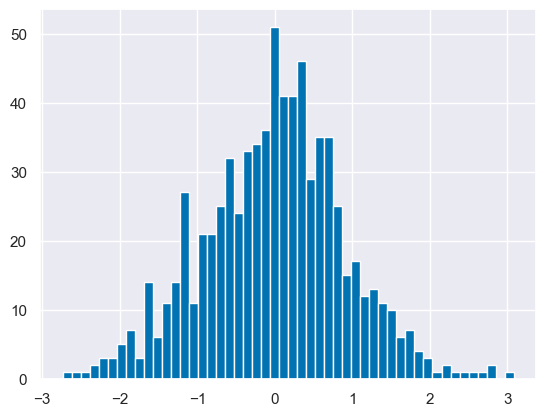

In [1762]:
lavaan_output["AuthUncorrected"].hist(bins=50);

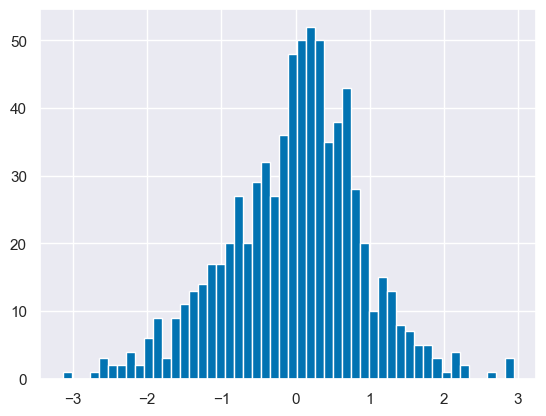

In [1763]:
lavaan_output["AuthCorrected"].hist(bins=50);

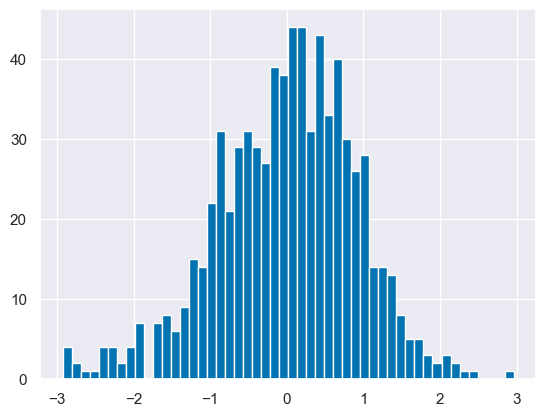

In [1764]:
lavaan_output["LeftUncorrected"].hist(bins=50);

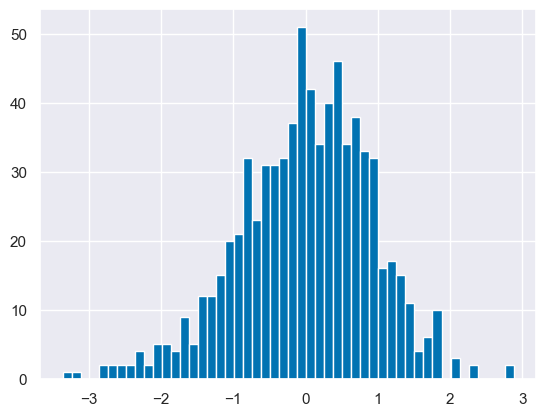

In [1765]:
lavaan_output["LeftCorrected"].hist(bins=50);

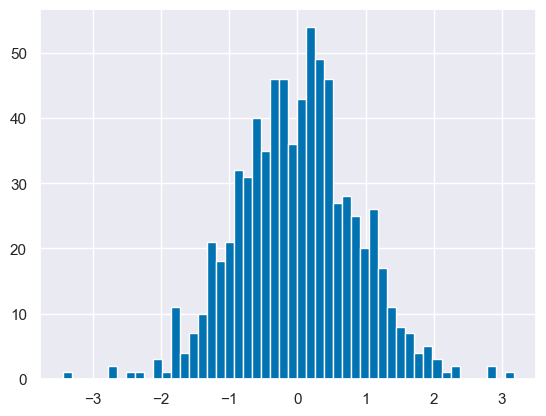

In [1766]:
lavaan_output["Acq"].hist(bins=50);

In [ ]:
### try with Pos only scales

In [1809]:
temp_lavaan = data2015.copy()
temp_lavaan[al_corr_list2015] = temp_lavaan[al_corr_list2015]*al_values_align2015
temp_lavaan[lr_corr_list2015] = temp_lavaan[lr_corr_list2015]*lr_values_align2015

desc_al = "AuthUncorrected =~ "+" + ".join(list(al_vals_type2015[al_vals_type2015==1].index)) +"\n" +\
    "LeftUncorrected =~ "+" + ".join(list(lr_vals_type2015[lr_vals_type2015==1].index))
desc_al_acq = "AuthCorrected =~ "+" + ".join(list(al_vals_type2015[al_vals_type2015==1].index))+"\n" +\
    "LeftCorrected =~ "+" + ".join(list(lr_vals_type2015[lr_vals_type2015==1].index))+"\n" +\
    "Acq =~ a*"+"+ a*".join((list(al_vals_type2015[al_vals_type2015!=0].index))+(list(lr_vals_type2015[lr_vals_type2015!=0].index)) )

temp_lavaan["comp_model"] = desc_al
temp_lavaan["full_model"] = desc_al_acq
temp_lavaan["id"] = temp_lavaan.index

uniq_cols = list(set( list(al_corr_list2015)+list(lr_corr_list2015) ))

pyreadr.write_rdata('E:\\Users\\Gamer\\Documents\\GitHub\\BES_analysis\\BES_analysis_code\\'+\
                        'Correcting-Acquiescence-Unbalanced-Replication\\data\\'+"data2015_al_lr_pos.RData",
                    temp_lavaan[uniq_cols+['id',"comp_model","full_model"]].dropna(), df_name="df")

In [1810]:
lavaan_output = pyreadr.read_r('E:\\Users\\Gamer\\Documents\\GitHub\\BES_analysis\\BES_analysis_code\\'+\
                        'Correcting-Acquiescence-Unbalanced-Replication\\data\\data2015_al_lr_pos_lavaan.RData')['save_df']
lavaan_output.index = temp_lavaan[uniq_cols+['id',"comp_model","full_model"]].dropna().index
lavaan_columns = ["al_lr_pos_"+x for x in lavaan_output.columns[-5:]]
data2015[lavaan_columns] = lavaan_output[lavaan_output.columns[-5:]]

In [1811]:
scale_list = ["alScaleGen","alScalePos","alScaleNeutral","alScaleNeg","lrScaleGen","lrScalePos","lrScaleNeutral","lrScaleNeg",]+lavaan_columns
demo_list = ["edlevel","age","gender","housing","inc_norm","bloc_complete"]
wt_var = "wt"
al_lr_reg_pos_2015 = pd.DataFrame(columns = scale_list)
al_lr_reg_pos_2015.loc["cronbach"] = np.nan
al_lr_reg_2015.loc["cronbach",cronbach_dict_al.keys()] = [x[0] for x in cronbach_dict_al.values()]

for demo_var in demo_list:
    temp = get_gen_corrs(data=data2015,scale_list=scale_list,demo_var=demo_var,wt_var=wt_var)
    for ind in temp.index:
        al_lr_reg_pos_2015.loc[ind] = temp.loc[ind]      
al_lr_reg_pos_2015

,alScaleGen,alScalePos,alScaleNeutral,alScaleNeg,lrScaleGen,lrScalePos,lrScaleNeutral,lrScaleNeg,al_lr_pos_AuthUncorrected,al_lr_pos_LeftUncorrected,al_lr_pos_AuthCorrected,al_lr_pos_LeftCorrected,al_lr_pos_Acq
cronbach,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
edlevel_GCSE/equiv,-0.136838,-0.193698,-0.122597,0.167010,0.119967,-0.022625,0.130229,0.198857,-0.185928,-0.028736,-0.022031,0.050618,-0.143063
edlevel_A-level/equiv,-0.340042,-0.359610,-0.235519,-0.024910,-0.068215,-0.261255,0.076842,0.133325,-0.430479,-0.137139,-0.278589,-0.032360,-0.141639
edlevel_Undergrad,-0.721633,-0.681260,-0.596866,-0.174556,0.002690,-0.258400,0.140123,0.265087,-0.669549,-0.200816,-0.418452,0.018394,-0.272129
edlevel_Postgrad,-1.216992,-1.132634,-0.893075,-0.499545,-0.089239,-0.374258,0.062526,0.252270,-1.071033,-0.338266,-0.786953,-0.033138,-0.334056
edlevel_int,0.380697,0.383431,0.275513,0.073661,0.001994,0.160694,-0.065355,-0.160155,0.486126,0.122263,0.283890,-0.031857,0.210650
age,1.061839,0.889626,0.885136,0.548029,0.398259,0.672533,-0.053939,0.000436,1.045167,0.284584,1.022351,0.355885,-0.097341
age_int,-0.514456,-0.422566,-0.453220,-0.259720,-0.195728,-0.324048,0.038873,-0.013287,-0.515792,-0.162818,-0.534797,-0.213715,0.082785
gender,0.076980,0.045696,0.071117,0.094256,0.002102,-0.002792,-0.136184,0.070238,-0.063491,0.168905,0.093617,0.101357,-0.074137
gender_int,-0.033136,-0.009719,-0.055263,-0.039071,-0.001564,0.006953,0.081724,-0.048868,0.053901,-0.087308,-0.044122,-0.072313,0.063954


In [1046]:
# # one-off correction

# lr_reg_2017.loc["age"] = lr_reg_2017.loc["age"]*100
# lr_reg_2019.loc["age"] = lr_reg_2019.loc["age"]*100

In [1776]:
al_reg_2015.columns[-3:]

Index(['AuthUncorrected', 'AuthCorrected', 'Acq'], dtype='object')

In [1781]:
al_lr_reg_2015

,alScaleGen,alScalePos,alScaleNeutral,alScaleNeg,al_lr_pos_AuthUncorrected,al_lr_pos_LeftUncorrected,al_lr_pos_AuthCorrected,al_lr_pos_LeftCorrected,al_lr_pos_Acq
cronbach,0.911975,0.882235,0.802626,0.439630,NaN,NaN,NaN,NaN,NaN
edlevel_GCSE/equiv,-0.136838,-0.193698,-0.122597,0.167010,-0.185928,-0.028736,-0.022031,0.050618,-0.143063
edlevel_A-level/equiv,-0.340042,-0.359610,-0.235519,-0.024910,-0.430479,-0.137139,-0.278589,-0.032360,-0.141639
edlevel_Undergrad,-0.721633,-0.681260,-0.596866,-0.174556,-0.669549,-0.200816,-0.418452,0.018394,-0.272129
edlevel_Postgrad,-1.216992,-1.132634,-0.893075,-0.499545,-1.071033,-0.338266,-0.786953,-0.033138,-0.334056
edlevel_int,0.380697,0.383431,0.275513,0.073661,0.486126,0.122263,0.283890,-0.031857,0.210650
age,1.061839,0.889626,0.885136,0.548029,1.045167,0.284584,1.022351,0.355885,-0.097341
age_int,-0.514456,-0.422566,-0.453220,-0.259720,-0.515792,-0.162818,-0.534797,-0.213715,0.082785
gender,0.076980,0.045696,0.071117,0.094256,-0.063491,0.168905,0.093617,0.101357,-0.074137
gender_int,-0.033136,-0.009719,-0.055263,-0.039071,0.053901,-0.087308,-0.044122,-0.072313,0.063954


In [1813]:
al_lr_reg_pos_2015.columns

Index(['alScaleGen', 'alScalePos', 'alScaleNeutral', 'alScaleNeg',
       'lrScaleGen', 'lrScalePos', 'lrScaleNeutral', 'lrScaleNeg',
       'al_lr_pos_AuthUncorrected', 'al_lr_pos_LeftUncorrected',
       'al_lr_pos_AuthCorrected', 'al_lr_pos_LeftCorrected', 'al_lr_pos_Acq'],
      dtype='object')

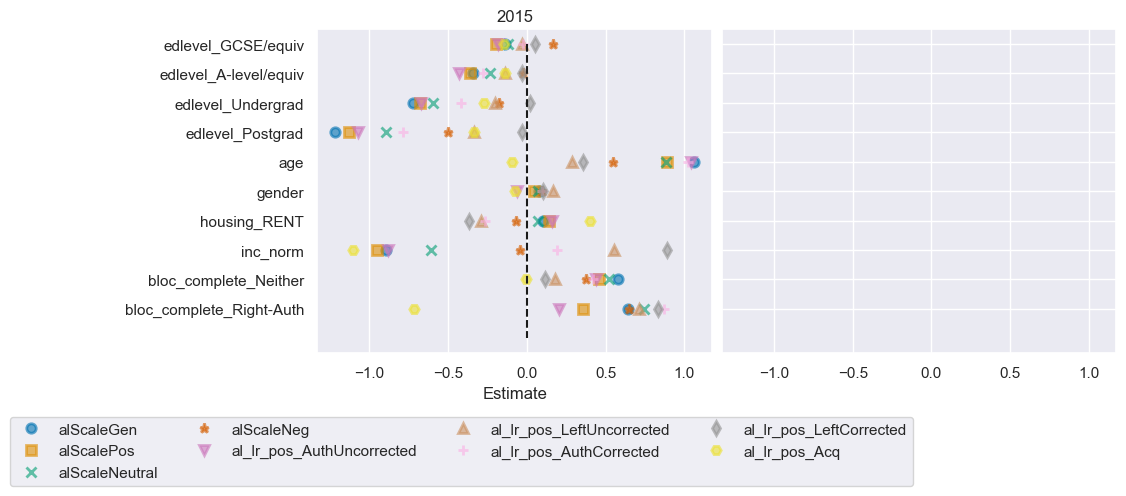

In [1816]:
demo_var_set = ['edlevel_GCSE/equiv', 'edlevel_A-level/equiv', 'edlevel_Undergrad',
       'edlevel_Postgrad', 'age','gender',
        'housing_RENT', 'inc_norm',
        'bloc_complete_Neither', 'bloc_complete_Right-Auth']
scale_set = ['alScaleGen', 'alScalePos', 'alScaleNeutral', 'alScaleNeg']+['al_lr_pos_AuthUncorrected', 'al_lr_pos_LeftUncorrected',
       'al_lr_pos_AuthCorrected', 'al_lr_pos_LeftCorrected', 'al_lr_pos_Acq']

fig, axs = plt.subplots(1, 2, figsize=(10, 4), layout='constrained',sharex=True,sharey=True)
data_dict = {0:al_lr_reg_pos_2015}#,1:al_lr_reg_2017,2:al_lr_reg_2019}
year_dict = {0:"2015",1:"2017",2:"2019"}

for ind in [0]:
    sns.pointplot(data=data_dict[ind].loc[demo_var_set,scale_set].reset_index().melt(id_vars = ['index']),
                                                                        y='index',x='value',hue='variable',
                  linestyle='None',orient='h',ax=axs[ind],legend=True,alpha=.6,markers=["o", "s", "x","*","v","^","+","d","H"]);

    axs[ind].vlines(0,0,len(demo_var_set),color='k',linestyle='--');
    axs[ind].set_ylabel("");
    axs[ind].set_xlabel("Estimate");

    handles, labels = axs[ind].get_legend_handles_labels()
    axs[ind].get_legend().remove()
    axs[ind].set_title(year_dict[ind]);

fig.legend(handles, labels, bbox_to_anchor=(.8, -.01),ncols=4);

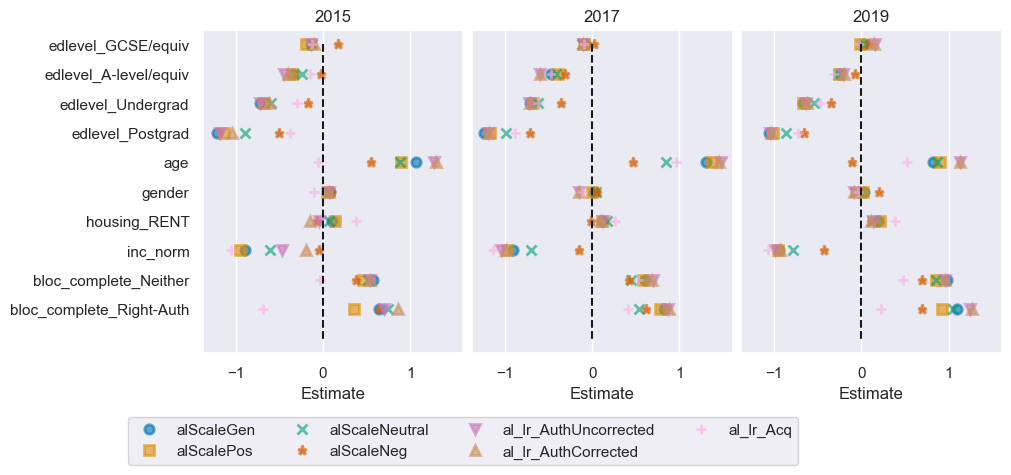

In [1786]:
demo_var_set = ['edlevel_GCSE/equiv', 'edlevel_A-level/equiv', 'edlevel_Undergrad',
       'edlevel_Postgrad', 'age','gender',
        'housing_RENT', 'inc_norm',
        'bloc_complete_Neither', 'bloc_complete_Right-Auth']
scale_set = ['alScaleGen', 'alScalePos', 'alScaleNeutral', 'alScaleNeg']+['al_lr_AuthUncorrected', 'al_lr_AuthCorrected', 'al_lr_Acq']

fig, axs = plt.subplots(1, 3, figsize=(10, 4), layout='constrained',sharex=True,sharey=True)
data_dict = {0:al_lr_reg_2015,1:al_lr_reg_2017,2:al_lr_reg_2019}
year_dict = {0:"2015",1:"2017",2:"2019"}

for ind in [0,1,2]:
    sns.pointplot(data=data_dict[ind].loc[demo_var_set,scale_set].reset_index().melt(id_vars = ['index']),
                                                                        y='index',x='value',hue='variable',
                  linestyle='None',orient='h',ax=axs[ind],legend=True,alpha=.6,markers=["o", "s", "x","*","v","^","+"]);

    axs[ind].vlines(0,0,len(demo_var_set),color='k',linestyle='--');
    axs[ind].set_ylabel("");
    axs[ind].set_xlabel("Estimate");

    handles, labels = axs[ind].get_legend_handles_labels()
    axs[ind].get_legend().remove()
    axs[ind].set_title(year_dict[ind]);

fig.legend(handles, labels, bbox_to_anchor=(.8, -.01),ncols=4);

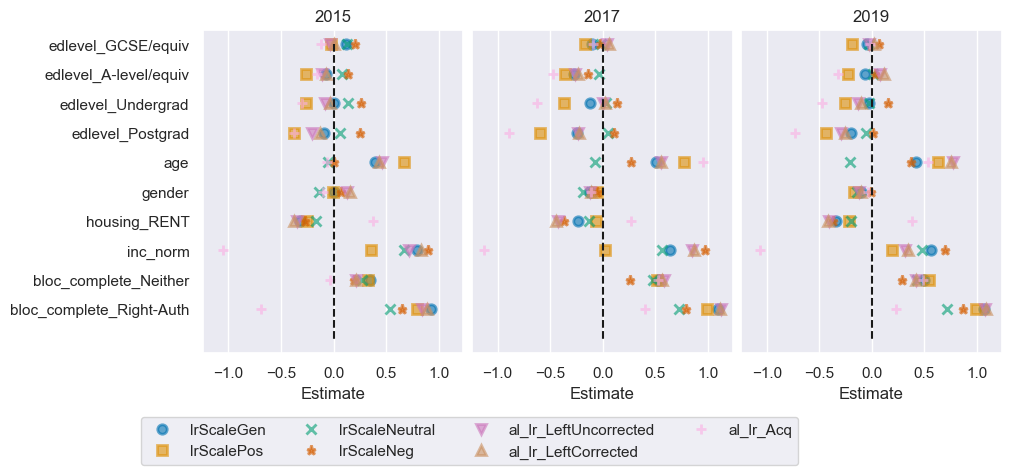

In [1807]:
demo_var_set = ['edlevel_GCSE/equiv', 'edlevel_A-level/equiv', 'edlevel_Undergrad',
       'edlevel_Postgrad', 'age','gender',
        'housing_RENT', 'inc_norm',
        'bloc_complete_Neither', 'bloc_complete_Right-Auth']
scale_set = ['lrScaleGen', 'lrScalePos', 'lrScaleNeutral', 'lrScaleNeg']+['al_lr_LeftUncorrected', 'al_lr_LeftCorrected', 'al_lr_Acq']

fig, axs = plt.subplots(1, 3, figsize=(10, 4), layout='constrained',sharex=True,sharey=True)
data_dict = {0:al_lr_reg_2015,1:al_lr_reg_2017,2:al_lr_reg_2019}
year_dict = {0:"2015",1:"2017",2:"2019"}

for ind in [0,1,2]:
    sns.pointplot(data=data_dict[ind].loc[demo_var_set,scale_set].reset_index().melt(id_vars = ['index']),
                                                                        y='index',x='value',hue='variable',
                  linestyle='None',orient='h',ax=axs[ind],legend=True,alpha=.6,markers=["o", "s", "x","*","v","^","+"]);

    axs[ind].vlines(0,0,len(demo_var_set),color='k',linestyle='--');
    axs[ind].set_ylabel("");
    axs[ind].set_xlabel("Estimate");

    handles, labels = axs[ind].get_legend_handles_labels()
    axs[ind].get_legend().remove()
    axs[ind].set_title(year_dict[ind]);

fig.legend(handles, labels, bbox_to_anchor=(.8, -.01),ncols=4);

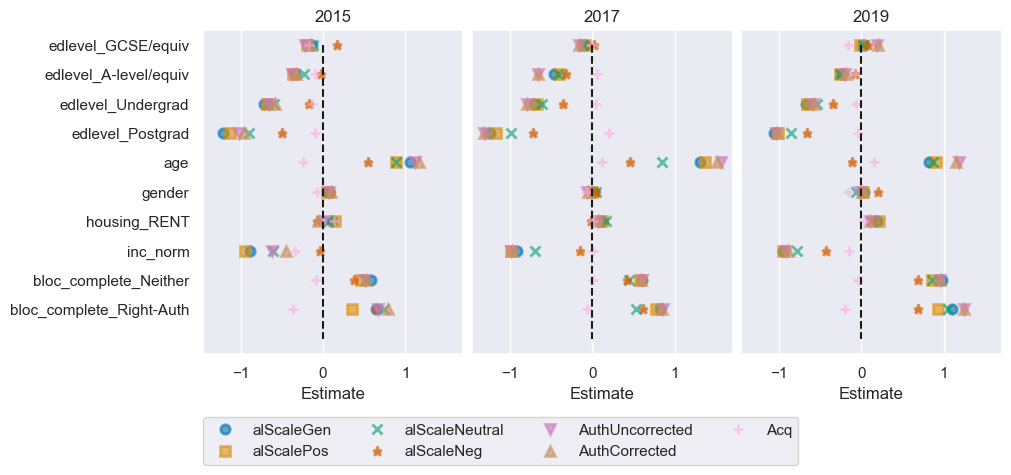

In [1777]:
demo_var_set = ['edlevel_GCSE/equiv', 'edlevel_A-level/equiv', 'edlevel_Undergrad',
       'edlevel_Postgrad', 'age','gender',
        'housing_RENT', 'inc_norm',
        'bloc_complete_Neither', 'bloc_complete_Right-Auth']
scale_set = ['alScaleGen', 'alScalePos', 'alScaleNeutral', 'alScaleNeg']+list(al_reg_2015.columns[-3:])

fig, axs = plt.subplots(1, 3, figsize=(10, 4), layout='constrained',sharex=True,sharey=True)
data_dict = {0:al_reg_2015,1:al_reg_2017,2:al_reg_2019}
year_dict = {0:"2015",1:"2017",2:"2019"}

for ind in [0,1,2]:
    sns.pointplot(data=data_dict[ind].loc[demo_var_set,scale_set].reset_index().melt(id_vars = ['index']),
                                                                        y='index',x='value',hue='variable',
                  linestyle='None',orient='h',ax=axs[ind],legend=True,alpha=.6,markers=["o", "s", "x","*","v","^","+"]);

    axs[ind].vlines(0,0,len(demo_var_set),color='k',linestyle='--');
    axs[ind].set_ylabel("");
    axs[ind].set_xlabel("Estimate");

    handles, labels = axs[ind].get_legend_handles_labels()
    axs[ind].get_legend().remove()
    axs[ind].set_title(year_dict[ind]);

fig.legend(handles, labels, bbox_to_anchor=(.8, -.01),ncols=4);

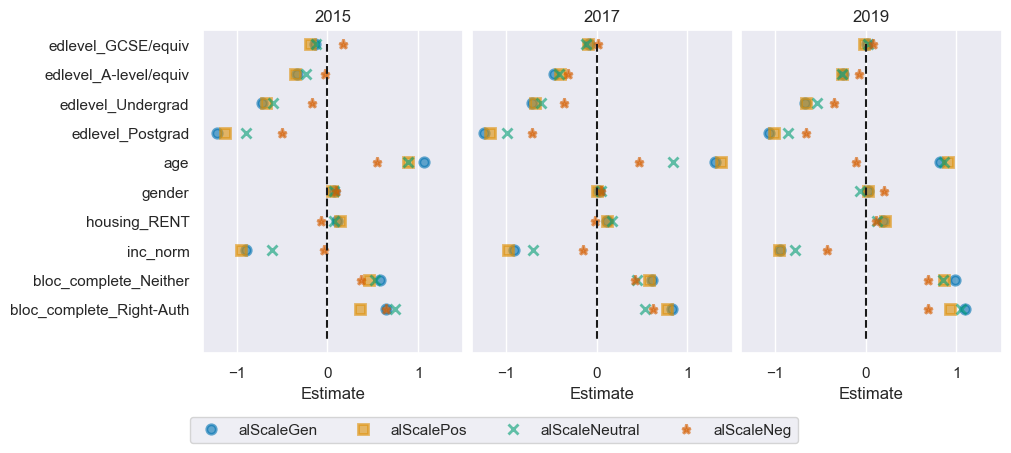

In [1778]:
demo_var_set = ['edlevel_GCSE/equiv', 'edlevel_A-level/equiv', 'edlevel_Undergrad',
       'edlevel_Postgrad', 'age','gender',
        'housing_RENT', 'inc_norm',
        'bloc_complete_Neither', 'bloc_complete_Right-Auth']
scale_set = ['alScaleGen', 'alScalePos', 'alScaleNeutral', 'alScaleNeg']#+list(lavaan_output.columns[-3:-1])

fig, axs = plt.subplots(1, 3, figsize=(10, 4), layout='constrained',sharex=True,sharey=True)
data_dict = {0:al_reg_2015,1:al_reg_2017,2:al_reg_2019}
year_dict = {0:"2015",1:"2017",2:"2019"}

for ind in [0,1,2]:
    sns.pointplot(data=data_dict[ind].loc[demo_var_set,scale_set].reset_index().melt(id_vars = ['index']),
                                                                        y='index',x='value',hue='variable',
                  linestyle='None',orient='h',ax=axs[ind],legend=True,alpha=.6,markers=["o", "s", "x","*","v","^","+"]);

    axs[ind].vlines(0,0,len(demo_var_set),color='k',linestyle='--');
    axs[ind].set_ylabel("");
    axs[ind].set_xlabel("Estimate");

    handles, labels = axs[ind].get_legend_handles_labels()
    axs[ind].get_legend().remove()
    axs[ind].set_title(year_dict[ind]);

fig.legend(handles, labels, bbox_to_anchor=(.8, -.01),ncols=4);

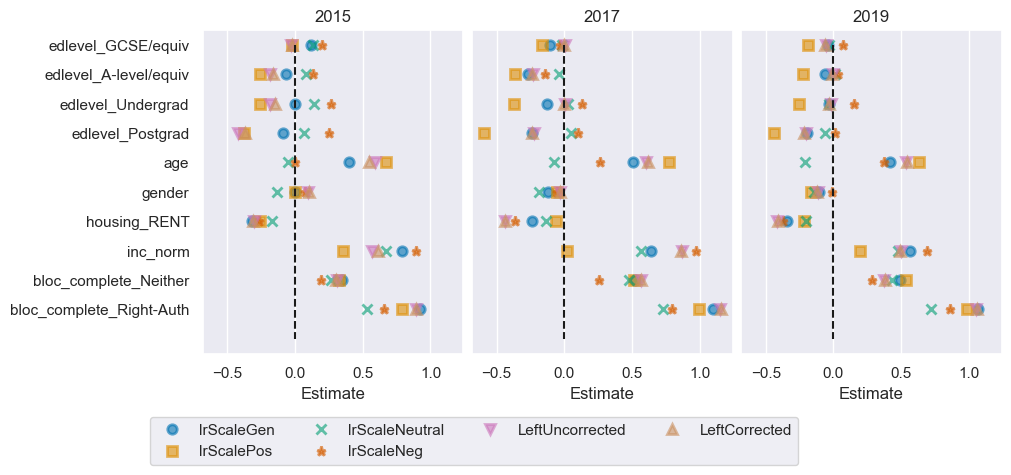

In [1422]:
demo_var_set = ['edlevel_GCSE/equiv', 'edlevel_A-level/equiv', 'edlevel_Undergrad',
       'edlevel_Postgrad', 'age','gender',
        'housing_RENT', 'inc_norm',
        'bloc_complete_Neither', 'bloc_complete_Right-Auth']
scale_set = ['lrScaleGen', 'lrScalePos', 'lrScaleNeutral', 'lrScaleNeg']+list(lavaan_output.columns[-3:-1])

fig, axs = plt.subplots(1, 3, figsize=(10, 4), layout='constrained',sharex=True,sharey=True)
data_dict = {0:lr_reg_2015,1:lr_reg_2017,2:lr_reg_2019}
year_dict = {0:"2015",1:"2017",2:"2019"}

for ind in [0,1,2]:
    sns.pointplot(data=data_dict[ind].loc[demo_var_set,scale_set].reset_index().melt(id_vars = ['index']),
                                                                        y='index',x='value',hue='variable',
                  linestyle='None',orient='h',ax=axs[ind],legend=True,alpha=.6,markers=["o", "s", "x","*","v","^","+"]);
#     axs[ind].set_yticks(None);
    axs[ind].vlines(0,0,len(demo_var_set),color='k',linestyle='--');
    axs[ind].set_ylabel("");
    axs[ind].set_xlabel("Estimate");
#     axs[ind].set_xlim([-.75,.75]);
    handles, labels = axs[ind].get_legend_handles_labels()
    axs[ind].get_legend().remove()
    axs[ind].set_title(year_dict[ind]);
#     if ind==2;
#         fig.legend()


fig.legend(handles, labels, bbox_to_anchor=(.8, -.01),ncols=4);
# fig.subplots_adjust(top=0.7)

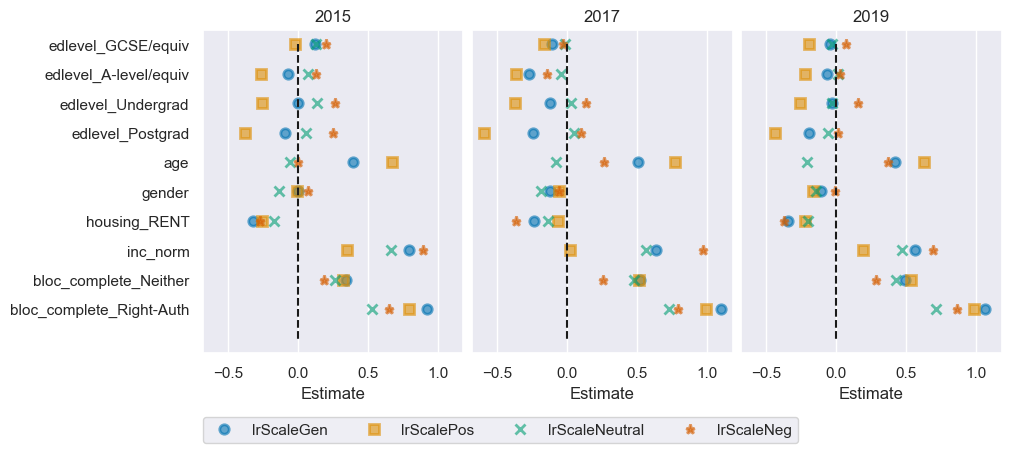

In [1423]:
demo_var_set = ['edlevel_GCSE/equiv', 'edlevel_A-level/equiv', 'edlevel_Undergrad',
       'edlevel_Postgrad', 'age','gender',
        'housing_RENT', 'inc_norm',
        'bloc_complete_Neither', 'bloc_complete_Right-Auth']
scale_set = ['lrScaleGen', 'lrScalePos', 'lrScaleNeutral', 'lrScaleNeg']

fig, axs = plt.subplots(1, 3, figsize=(10, 4), layout='constrained',sharex=True,sharey=True)
data_dict = {0:lr_reg_2015,1:lr_reg_2017,2:lr_reg_2019}
year_dict = {0:"2015",1:"2017",2:"2019"}

for ind in [0,1,2]:
    sns.pointplot(data=data_dict[ind].loc[demo_var_set,scale_set].reset_index().melt(id_vars = ['index']),
                                                                        y='index',x='value',hue='variable',
                  linestyle='None',orient='h',ax=axs[ind],legend=True,alpha=.6,markers=["o", "s", "x","*","v","^","+"]);
#     axs[ind].set_yticks(None);
    axs[ind].vlines(0,0,len(demo_var_set),color='k',linestyle='--');
    axs[ind].set_ylabel("");
    axs[ind].set_xlabel("Estimate");
#     axs[ind].set_xlim([-.75,.75]);
    handles, labels = axs[ind].get_legend_handles_labels()
    axs[ind].get_legend().remove()
    axs[ind].set_title(year_dict[ind]);
#     if ind==2;
#         fig.legend()


fig.legend(handles, labels, bbox_to_anchor=(.8, -.01),ncols=4);
# fig.subplots_adjust(top=0.7)

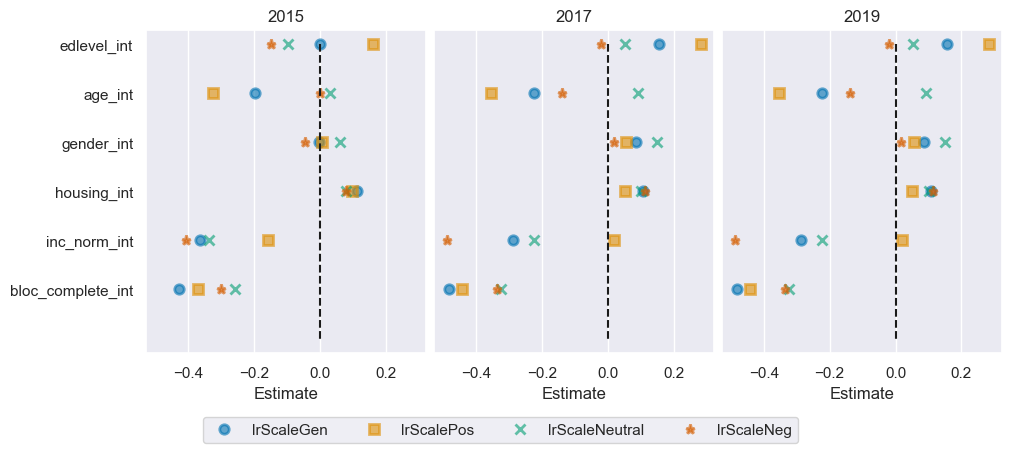

In [1050]:
demo_var_set = ['edlevel_int','age_int','gender_int','housing_int','inc_norm_int','bloc_complete_int']
scale_set = ['lrScaleGen', 'lrScalePos', 'lrScaleNeutral', 'lrScaleNeg']

fig, axs = plt.subplots(1, 3, figsize=(10, 4), layout='constrained',sharex=True,sharey=True)
data_dict = {0:lr_reg_2015,1:lr_reg_2017,2:lr_reg_2019}
year_dict = {0:"2015",1:"2017",2:"2019"}

for ind in [0,1,2]:
    sns.pointplot(data=data_dict[ind].loc[demo_var_set,scale_set].reset_index().melt(id_vars = ['index']),
                                                                        y='index',x='value',hue='variable',
                  linestyle='None',orient='h',ax=axs[ind],legend=True,alpha=.6,markers=["o", "s", "x","*"]);
#     axs[ind].set_yticks(None);
    axs[ind].vlines(0,0,len(demo_var_set),color='k',linestyle='--');
    axs[ind].set_ylabel("");
    axs[ind].set_xlabel("Estimate");
#     axs[ind].set_xlim([-.75,.75]);
    handles, labels = axs[ind].get_legend_handles_labels()
    axs[ind].get_legend().remove()
    axs[ind].set_title(year_dict[ind]);
#     if ind==2;
#         fig.legend()


fig.legend(handles, labels, bbox_to_anchor=(.8, -.01),ncols=4);
# fig.subplots_adjust(top=0.7)

In [1324]:
(data2015.select_dtypes('number')).corrwith((data2015["lrScalePos"]-data2015["lrScaleNeg"])).sort_values()

lrScaleNeg        -0.588110
f01_8             -0.401369
f01_2             -0.355642
w12               -0.354973
f01_7             -0.354599
f01_9             -0.259851
cses_q9           -0.239151
cses_q4_4         -0.238328
inc_norm          -0.114333
lrScaleNeutral    -0.076741
l09               -0.049704
g01_1             -0.026534
gender            -0.019266
wt                 0.015734
LeftCorrected      0.083472
lrScaleGen         0.084137
age                0.098483
f01_1              0.121310
LeftUncorrected    0.153079
f01_6              0.191962
f01_5              0.238506
w11                0.327288
w15_4              0.363621
w15_1              0.451383
w15_3              0.470943
w15_2              0.471027
lrScalePos         0.586061
Acq                0.980096
dtype: float64

In [1328]:
f2f_harmonised2015.select_dtypes('number').corrwith(data["lrScaleGap"]).dropna().sort_values()

rich                     -0.355642
inc_norm                 -0.114333
inc_det                  -0.114333
inc_norm_wt              -0.104089
inc(quartile)            -0.104089
birth_year               -0.098483
LibLeft                  -0.058207
LAB                      -0.051629
DK                       -0.036534
LD                       -0.029270
gender_complete          -0.019266
gender                   -0.019266
harmonised_voted         -0.017815
GP                       -0.006787
PC                       -0.006551
unconventional           -0.001671
CON                       0.000782
SNP                       0.012215
wt                        0.015734
DNV                       0.017408
AuthRight                 0.046588
ec_left_right_complete    0.051251
ec_left_right             0.051271
REFUK                     0.079904
age                       0.098483
generation                0.098483
decade                    0.098483
ordinary                  0.121310
censorship          

In [1343]:
pd.get_dummies(BES_df_list["2015"].drop(lr_corr_list,axis=1)).corrwith(data["lrScaleGap"]).dropna().sort_values().tail(20)

c02_5_Agree                                                                   0.100454
p04_09_Yes                                                                    0.104002
p03_1_10 Do all it can to protect its independence from the European Union    0.104195
m02_5_Strongly agree                                                          0.105439
f01_4_Strongly agree                                                          0.107013
m02_7_Agree                                                                   0.107048
m02_3_Strongly agree                                                          0.108037
p05_06_No                                                                     0.110422
b12_1_Very closely                                                            0.112098
a1_mii_immigration                                                            0.112219
k05_None, No time at all                                                      0.120282
p02_Leave the EU                           

In [1346]:
BES_label_list["2015"]["j01"]
# j05 'Too many immigrants let into this country' -.2
# 'Strength of opinion about immigrants'
# 'Y12A Do you have any educational or work-related qualifications?' -.15
# "Young people today don't have enough respect for traditional British values" -.15
# "Politicians don't care what people like me think" -.14
# 'Like/dislike: UKIP'
# 'Spend less on foreign aid'
# "J1 Do you think immigration is good or bad for Britain's economy?"

## oof very strongly auth correlated!

"J1 Do you think immigration is good or bad for Britain's economy?"

In [1384]:
data2017["lrScaleGap"] = data2017["lrScalePos"]-data2017["lrScaleNeg"]
data2019["lrScaleGap"] = data2019["lrScalePos"]-data2019["lrScaleNeg"]

data2019.columns

Index(['f01_1', 'f01_2', 'f01_5', 'f01_6', 'f01_7', 'f01_8', 'f01_9', 'l09',
       'f2', 'f3', 'g01_1', 'Q12_CSES', 'Q2_CSES_8', 'w11', 'w12', 'w15_1',
       'w15_2', 'age', 'wt', 'edlevel', 'gender', 'housing', 'inc_norm',
       'bloc_complete', 'lrScaleGen', 'lrScalePos', 'lrScaleNeutral',
       'lrScaleNeg', 'lrScaleGap'],
      dtype='object')

In [1364]:
lr_corr_list = ['f01_1', 'f01_2', 'f01_5', 'f01_6', 'f01_7', 'f01_8', 'f01_9', 'l09',
       'g01_1', 'f2', 'q12_cses_4', 'q13_cses', 'q2_cses_8', 'w11', 'w12',
       'w15_1', 'w15_2', 'w15_3',]

lr_corr_list = ['f01_1', 'f01_2', 'f01_5', 'f01_6', 'f01_7', 'f01_8', 'f01_9', 'l09',
       'f2', 'f3', 'g01_1', 'Q12_CSES', 'Q2_CSES_8', 'w11', 'w12', 'w15_1',
       'w15_2']

In [1370]:
pd.get_dummies(BES_df_list["2019"].drop(lr_corr_list,axis=1)).corrwith(data2019["lrScaleGap"]).dropna().sort_values().tail(20)

m02_6_Strongly agree                                                                     0.101570
k04_tv facebook                                                                          0.103216
a01_everything has got up in price since I arrived 2009. food house rent, insurances.    0.103216
m02_5_Strongly agree                                                                     0.104271
Q2_CSES_5_Strongly agree                                                                 0.104292
Q3_CSES_1_Strongly agree                                                                 0.104636
Q13_CSES_1 It doesn't make any difference who is in power                                0.104735
Q4_CSES_2_Very important                                                                 0.104781
m02_4_Agree                                                                              0.112121
m02_3_Strongly agree                                                                     0.112584
m02_1_Strongly agree

In [1369]:
BES_label_list["2019"]["x01_4"]
# same
#' 'Most politicians do not care about the people''
# 'Knowledge: the UK uses proportional representation for general elections' -.11

# ns_sec

'Knowledge: the UK uses proportional representation for general elections'

In [1362]:
BES_label_list["2017"]["t01_2"]
# j05 'Too many immigrants let into this country' -.27
# f01_11 'For some crimes, the death penalty is the most appropriate sentence' -.25
# f01_3 "Young people today don't have enough respect for traditional British values"
# f01_12'People who break the law should be given stiffer sentences'
# 'Spend less on foreign aid'

'Spend less on foreign aid'

In [1372]:
data2019["lrScaleGap"]

0      -1.578524
1       0.881785
2      -1.077886
3       1.380151
4      -0.427763
          ...   
3941   -0.332775
3942   -1.017488
3943   -0.765067
3944    0.128770
3945    0.874947
Name: lrScaleGap, Length: 3946, dtype: float64

In [1407]:
vc = data2019[lr_corr_list2019].corrwith( data2019["lrScaleGap"] ).sort_values()
vc = pd.DataFrame(vc)
vc["type"]  = lr_vals_type2019.loc[vc.index]
vc["align"]  = lr_values_align2019.loc[vc.index]
vc

,0,type,align
Q2_CSES_8,-0.376003,-1.0,-1.0
f01_8,-0.362298,-1.0,-1.0
f01_2,-0.325754,-1.0,-1.0
w12,-0.293179,-1.0,-1.0
f01_7,-0.272997,-1.0,-1.0
f3,-0.259077,-1.0,-1.0
Q12_CSES,-0.249892,-1.0,-1.0
f01_9,-0.154522,-1.0,-1.0
l09,-0.078253,0.0,1.0
f2,-0.062815,0.0,1.0


In [1409]:
vc = data2017[lr_corr_list2017].corrwith( data2017["lrScaleGap"] ).sort_values()
vc = pd.DataFrame(vc)
vc["type"]  = lr_vals_type2017.loc[vc.index]
vc["align"]  = lr_values_align2017.loc[vc.index]
vc

,0,type,align
q2_cses_8,-0.440182,-1.0,-1.0
q12_cses_4,-0.427205,-1.0,-1.0
f01_2,-0.376300,-1.0,-1.0
f01_8,-0.374319,-1.0,-1.0
w12,-0.312631,-1.0,-1.0
f01_7,-0.285815,-1.0,-1.0
q13_cses,-0.217643,-1.0,-1.0
f01_9,-0.211102,-1.0,-1.0
l09,-0.030628,0.0,1.0
g01_1,-0.026552,-0.0,-1.0


In [1410]:
vc = data2015[lr_corr_list2015].corrwith( data2015["lrScaleGap"] ).sort_values()
vc = pd.DataFrame(vc)
vc["type"]  = lr_vals_type2015.loc[vc.index]
vc["align"]  = lr_values_align2015.loc[vc.index]
vc

,0,type,align
f01_8,-0.401369,-1.0,-1.0
f01_2,-0.355642,-1.0,-1.0
w12,-0.354973,-1.0,-1.0
f01_7,-0.354599,-1.0,-1.0
f01_9,-0.259851,-1.0,-1.0
cses_q9,-0.239151,-1.0,-1.0
cses_q4_4,-0.238328,-0.0,-1.0
l09,-0.049704,0.0,1.0
g01_1,-0.026534,-0.0,-1.0
f01_1,0.121310,1.0,1.0


In [ ]:
# 2015
# cses_q4_4	-0.238328	-0.0	-1.0  classed as neutral, but looks like it's Neg acq
#  'cses_q4_4': 'Rich people buy elections(-1)',
# ['Very often' < 'Fairly often' < 'Not often' < 'Not at all often' < 'Don't know' < 'Not stated']

# Acquiescence bias! (or, it's authoritarian?)



In [1411]:
BES_df_list["2015"]["cses_q4_4"]

0                    NaN
1              Not often
2             Don't know
3                    NaN
4              Not often
              ...       
2982    Not at all often
2983    Not at all often
2984          Don't know
2985           Not often
2986                 NaN
Name: cses_q4_4, Length: 2987, dtype: category
Categories (6, object): ['Very often' < 'Fairly often' < 'Not often' < 'Not at all often' < 'Don't know' < 'Not stated']

In [1051]:
import semopy
import pandas as pd
desc = semopy.examples.political_democracy.get_model()
print(desc)

# measurement model
ind60 =~ x1 + x2 + x3
dem60 =~ y1 + y2 + y3 + y4
dem65 =~ y5 + y6 + y7 + y8
# regressions
dem60 ~ ind60
dem65 ~ ind60 + dem60
# residual correlations
y1 ~~ y5
y2 ~~ y4 + y6
y3 ~~ y7
y4 ~~ y8
y6 ~~ y8


In [1052]:
dt = semopy.examples.political_democracy.get_data()
print(dt.head())

      y1        y2        y3        y4        y5        y6        y7  \
1   2.50  0.000000  3.333333  0.000000  1.250000  0.000000  3.726360   
2   1.25  0.000000  3.333333  0.000000  6.250000  1.100000  6.666666   
3   7.50  8.800000  9.999998  9.199991  8.750000  8.094061  9.999998   
4   8.90  8.800000  9.999998  9.199991  8.907948  8.127979  9.999998   
5  10.00  3.333333  9.999998  6.666666  7.500000  3.333333  9.999998   

         y8        x1        x2        x3  
1  3.333333  4.442651  3.637586  2.557615  
2  0.736999  5.384495  5.062595  3.568079  
3  8.211809  5.961005  6.255750  5.224433  
4  4.615086  6.285998  7.567863  6.267495  
5  6.666666  5.863631  6.818924  4.573679  


In [1054]:
mod = semopy.Model(desc)
res = mod.fit(dt)
print(res)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 0.508
Number of iterations: 52
Params: 2.180 1.819 1.257 1.058 1.265 1.186 1.280 1.266 1.482 0.572 0.838 0.624 1.893 1.320 2.156 7.385 0.793 5.067 0.347 3.148 1.357 4.954 3.951 0.172 0.448 0.082 0.120 0.467 2.352 3.430 3.256


In [1055]:
ins = mod.inspect()
print(ins)

     lval  op   rval  Estimate  Std. Err    z-value   p-value
0   dem60   ~  ind60  1.482379  0.399024   3.715017  0.000203
1   dem65   ~  ind60  0.571912  0.221383   2.583364  0.009784
2   dem65   ~  dem60  0.837574  0.098446   8.507992       0.0
3      x1   ~  ind60  1.000000         -          -         -
4      x2   ~  ind60  2.180494  0.138565  15.736254       0.0
5      x3   ~  ind60  1.818546  0.151993   11.96465       0.0
6      y1   ~  dem60  1.000000         -          -         -
7      y2   ~  dem60  1.256819  0.182687   6.879647       0.0
8      y3   ~  dem60  1.058174  0.151521   6.983699       0.0
9      y4   ~  dem60  1.265186  0.145151   8.716344       0.0
10     y5   ~  dem65  1.000000         -          -         -
11     y6   ~  dem65  1.185743  0.168908   7.020032       0.0
12     y7   ~  dem65  1.279717  0.159996    7.99841       0.0
13     y8   ~  dem65  1.266084  0.158238   8.001141       0.0
14  dem60  ~~  dem60  3.950849  0.920451   4.292296  0.000018
15  dem6

In [1056]:
desc

'# measurement model\nind60 =~ x1 + x2 + x3\ndem60 =~ y1 + y2 + y3 + y4\ndem65 =~ y5 + y6 + y7 + y8\n# regressions\ndem60 ~ ind60\ndem65 ~ ind60 + dem60\n# residual correlations\ny1 ~~ y5\ny2 ~~ y4 + y6\ny3 ~~ y7\ny4 ~~ y8\ny6 ~~ y8'

In [1058]:
data2017.columns

Index(['f01_1', 'f01_2', 'f01_5', 'f01_6', 'f01_7', 'f01_8', 'f01_9', 'l09',
       'g01_1', 'f2', 'q12_cses_4', 'q13_cses', 'q2_cses_8', 'w11', 'w12',
       'w15_1', 'w15_2', 'w15_3', 'age', 'wt', 'edlevel', 'lrScaleGen',
       'lrScalePos', 'lrScaleNeutral', 'lrScaleNeg', 'ec_left_right_complete',
       'lrScale_bes2017', 'lrScale_pos_bes2017', 'lrScale_neg_bes2017',
       'inc_norm', 'gender', 'bloc_complete', 'housing',
       'lrScale_bes2017_normed'],
      dtype='object')

In [1060]:
lr_value_vars = ['f01_1', 'f01_2', 'f01_5', 'f01_6', 'f01_7', 'f01_8', 'f01_9', 'l09',
       'g01_1', 'f2', 'q12_cses_4', 'q13_cses', 'q2_cses_8', 'w11', 'w12',
       'w15_1', 'w15_2', 'w15_3',]

In [1283]:
data2017[lr_value_vars].notnull().sum()

f01_1         2118
f01_2         2163
f01_5         2116
f01_6         1970
f01_7         2037
f01_8         2160
f01_9         2158
l09           2113
g01_1         2156
f2            1941
q12_cses_4     838
q13_cses       943
q2_cses_8      961
w11           1801
w12           1949
w15_1         2158
w15_2         2141
w15_3         2137
dtype: int64

In [1234]:
# desc_lr_acq = desc_lr_acq+"\nAcq =~ 1*f01_2"

In [1209]:
data2017[lr_value_vars] = data2017[lr_value_vars]*lr_values_align
# data2017[lr_value_vars] = (data2017[lr_value_vars]-data2017[lr_value_vars].mean())/data2017[lr_value_vars].std()

In [ ]:
import pyreadr

'LeftCorrected =~ f01_1 + f01_2 + f01_5 + f01_6 + f01_7 + f01_8 + f01_9 + l09 + g01_1 + f2 + q12_cses_4 + q13_cses + q2_cses_8 + w11 + w12 + w15_1 + w15_2 + w15_3\nAcq =~ a*f01_1 + a*f01_2 + a*f01_5 + a*f01_6 + a*f01_7 + a*f01_8 + a*f01_9 + a*q12_cses_4 + a*q13_cses + a*q2_cses_8 + a*w11 + a*w12 + a*w15_1 + a*w15_2 + a*w15_3'

In [1188]:
## desc_lr_acq


In [1249]:
data2017[lr_value_vars] = data2017[lr_value_vars]*lr_values_align

desc_lr = "LeftUncorrected =~ f01_1 + f01_2 + f01_5 + f01_6 + f01_7 + f01_8 + f01_9 + l09 + g01_1 + f2 + q12_cses_4 + q13_cses + q2_cses_8 + w11 + w12 + w15_1 + w15_2 + w15_3"
desc_lr_acq = "LeftCorrected =~ "+" + ".join(lr_value_vars)+"\nAcq =~ a*"+" + a*".join(lr_vals_type[lr_vals_type!=0].index)

data2017["comp_model"] = desc_lr
data2017["full_model"] = desc_lr_acq
data2017["id"] = data2017.index
pyreadr.write_rdata('E:\\Users\\Gamer\\Documents\\GitHub\\BES_analysis\\BES_analysis_code\\'+\
                        'Correcting-Acquiescence-Unbalanced-Replication\\data\\'+"data2017.RData",
                    data2017[lr_value_vars+['id',"comp_model","full_model"]].dropna(), df_name="df")


lavaan_output = pyreadr.read_r('E:\\Users\\Gamer\\Documents\\GitHub\\BES_analysis\\BES_analysis_code\\'+\
                        'Correcting-Acquiescence-Unbalanced-Replication\\data\\data2017_lavaan.RData')['save_df']

In [1217]:
lavaan_output[['LeftUncorrect', 'LeftUncorrected', 'Acq']].corr()

,LeftUncorrect,LeftUncorrected,Acq
LeftUncorrect,1.000000,0.999815,0.047851
LeftUncorrected,0.999815,1.000000,0.034835
Acq,0.047851,0.034835,1.000000


In [1218]:
(lavaan_output['LeftUncorrect']- lavaan_output['LeftUncorrected']).corr(lavaan_output['Acq'])

0.6727101809924934

In [1220]:
lavaan_output.shape

(605, 24)

In [1224]:
lavaan_output.index = data2017[['f01_1', 'f01_2', 'f01_5', 'f01_6', 'f01_7', 'f01_8', 'f01_9', 'l09',
       'g01_1', 'f2', 'q12_cses_4', 'q13_cses', 'q2_cses_8', 'w11', 'w12',
       'w15_1', 'w15_2', 'w15_3','id',"comp_model","full_model"]].dropna().index

In [1226]:
f2f_harmonised2017.select_dtypes('number').corrwith(lavaan_output['Acq']).sort_values()

soc_lib_auth             -0.459733
soc_lib_auth_complete    -0.459733
alScale_pos_bes2017      -0.458613
death                    -0.395430
alScale_bes2017          -0.388304
toughlaw                 -0.386697
respect                  -0.378939
strongtu                 -0.330218
lrScale_pos_bes2017      -0.290667
censorship               -0.209972
enterprise               -0.166143
ordinary                 -0.151261
REFUK                    -0.135948
DNV                      -0.132169
ec_left_right            -0.088803
ec_left_right_complete   -0.088803
wt                       -0.076419
AuthRight                -0.072065
unconventional           -0.049454
CON                      -0.042499
generation               -0.030544
age                      -0.030544
decade                   -0.030544
SNP                      -0.022861
GP                       -0.001454
alScale_neg_bes2017       0.001786
PC                        0.016411
birth_year                0.030544
gender_complete     

In [1229]:
data2017.select_dtypes('number').corrwith(lavaan_output['Acq']).sort_values()


q2_cses_8                -0.485712
lrScalePos               -0.477125
q12_cses_4               -0.463588
w15_1                    -0.458256
w15_3                    -0.436183
f01_2                    -0.365094
f01_5                    -0.330218
w11                      -0.297897
lrScale_pos_bes2017      -0.290667
q13_cses                 -0.273632
f01_8                    -0.266091
w12                      -0.207489
f01_7                    -0.198953
w15_2                    -0.193578
f01_6                    -0.166143
f01_1                    -0.151261
ec_left_right_complete   -0.088803
wt                       -0.076419
f01_9                    -0.059184
age                      -0.030544
f2                       -0.020322
id                        0.004509
lrScaleNeutral            0.005845
g01_1                     0.036010
lrScaleGen                0.036256
gender                    0.051855
l09                       0.064945
lrScale_bes2017_normed    0.069055
lrScale_bes2017     

In [1230]:
pd.get_dummies(data2017["edlevel"]).corrwith(lavaan_output['Acq']).sort_values()

No qualification   -0.177615
GCSE/equiv         -0.096316
A-level/equiv      -0.027655
Undergrad           0.118644
Postgrad            0.168955
dtype: float64

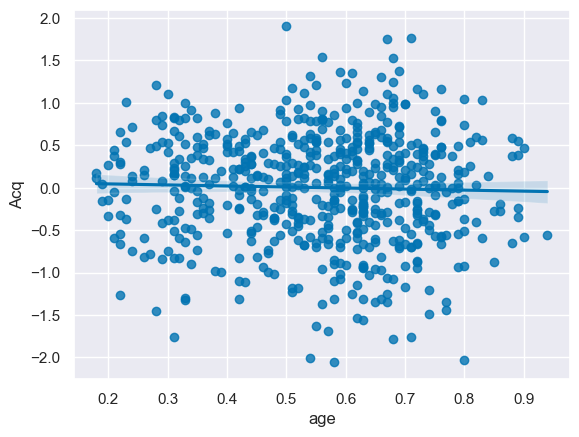

In [1232]:
mask = data2017["age"].notnull() & lavaan_output['Acq'].notnull()
sns.regplot(x=data2017["age"][mask],y=lavaan_output['Acq'][mask]);

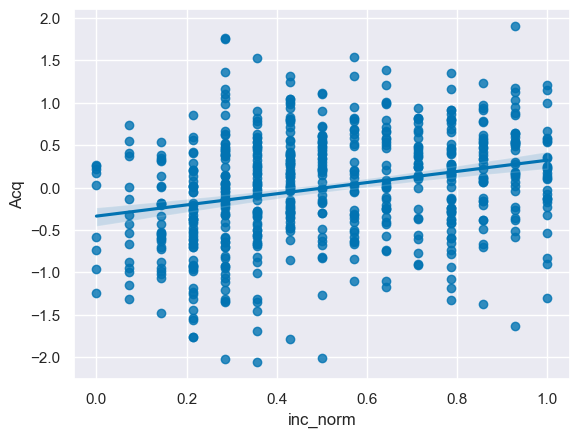

In [1233]:
mask = data2017["inc_norm"].notnull() & lavaan_output['Acq'].notnull()
sns.regplot(x=data2017["inc_norm"][mask],y=lavaan_output['Acq'][mask]);

In [1278]:
semopy_output["LeftCorrected"]

0      -0.895014
1      -1.013254
4      -1.535673
6       2.358376
15     -0.192217
          ...   
2183   -0.532045
2184   -1.206536
2187    1.200290
2189    0.554536
2191   -0.199732
Name: LeftCorrected, Length: 605, dtype: float64

,LeftUncorrect,LeftUncorrected,Acq
0,-0.566575,-0.560518,-0.590070
1,-1.007198,-0.986253,-0.669028
4,-1.384610,-1.400289,0.993767
6,1.795040,1.805743,1.040150
15,0.006413,-0.003123,0.350150
...,...,...,...
2183,-0.274858,-0.287028,0.365969
2184,-1.114799,-1.107930,0.580573
2187,0.852726,0.845338,0.241763
2189,0.473558,0.477815,-0.700765


In [1282]:
lavaan_output[["LeftUncorrect","LeftUncorrected","Acq"]].corrwith(semopy_output["Acq"])


LeftUncorrect      0.962602
LeftUncorrected    0.959489
Acq                0.277735
dtype: float64

In [1272]:
lavaan_output.corrwith(semopy_output)

Acq                0.277735
LeftCorrected           NaN
LeftUncorrect           NaN
LeftUncorrected         NaN
comp_model              NaN
f01_1                   NaN
f01_2                   NaN
f01_5                   NaN
f01_6                   NaN
f01_7                   NaN
f01_8                   NaN
f01_9                   NaN
f2                      NaN
full_model              NaN
g01_1                   NaN
id                      NaN
l09                     NaN
q12_cses_4              NaN
q13_cses                NaN
q2_cses_8               NaN
w11                     NaN
w12                     NaN
w15_1                   NaN
w15_2                   NaN
w15_3                   NaN
dtype: float64

In [1271]:
f2f_harmonised2017.select_dtypes('number').corrwith(semopy_output['Acq']).sort_values()

LibLeft                  -0.492857
LAB                      -0.465963
birth_year               -0.108549
SNP                      -0.103074
GP                       -0.055589
REFUK                    -0.034556
DNV                      -0.032514
PC                       -0.030699
gender_complete          -0.016652
gender                   -0.014599
respect                   0.017799
LD                        0.030309
harmonised_voted          0.032514
death                     0.063661
alScale_pos_bes2017       0.079184
censorship                0.080213
toughlaw                  0.080954
soc_lib_auth              0.081755
soc_lib_auth_complete     0.081755
wt                        0.087641
age                       0.108549
decade                    0.108549
generation                0.108549
alScale_bes2017           0.155513
unconventional            0.173034
alScale_neg_bes2017       0.268815
inc(quartile)             0.298247
inc_norm_wt               0.298247
inc_det             

In [1136]:
import semopy

In [1267]:
desc_lr_acq = 'LeftCorrected =~ f01_1 + f01_2 + f01_5 + f01_6 + f01_7 + f01_8 + f01_9 + l09 + g01_1 + f2 + q12_cses_4 + q13_cses + q2_cses_8 + w11 + w12 + w15_1 + w15_2 + w15_3\nAcq =~ l09 + g01_1 + f2 + a*f01_1 + a*f01_2 + a*f01_5 + a*f01_6 + a*f01_7 + a*f01_8 + a*f01_9 + a*q12_cses_4 + a*q13_cses + a*q2_cses_8 + a*w11 + a*w12 + a*w15_1 + a*w15_2 + a*w15_3'

In [1268]:
%%time
mod = semopy.Model(desc_lr_acq)
res = mod.fit(data2017)
print(res)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 1.088
Number of iterations: 70
Params: -1.982 0.181 0.984 1.100 0.185 0.357 0.419 0.152 -0.264 0.102 0.625 -0.510 0.183 0.055 0.187 0.969 0.319 0.944 0.981 0.855 0.142 1.317 0.414 0.802 0.675 0.766 0.683 0.724 0.853 0.972 0.712 0.929 0.702 0.667 0.550 0.665 0.764 0.847 0.769 0.818 0.832
CPU times: total: 31.2 ms
Wall time: 32.1 ms


In [1269]:
ins = mod.inspect()
print(ins)

             lval  op           rval  Estimate  Std. Err    z-value   p-value
0           f01_1   ~  LeftCorrected  1.000000         -          -         -
1           f01_1   ~            Acq -1.982231   0.48648   -4.07464  0.000046
2           f01_2   ~            Acq -1.982231   0.48648   -4.07464  0.000046
3           f01_5   ~            Acq -1.982231   0.48648   -4.07464  0.000046
4           f01_6   ~            Acq -1.982231   0.48648   -4.07464  0.000046
5           f01_7   ~            Acq -1.982231   0.48648   -4.07464  0.000046
6           f01_8   ~            Acq -1.982231   0.48648   -4.07464  0.000046
7           f01_9   ~            Acq -1.982231   0.48648   -4.07464  0.000046
8      q12_cses_4   ~            Acq -1.982231   0.48648   -4.07464  0.000046
9        q13_cses   ~            Acq -1.982231   0.48648   -4.07464  0.000046
10      q2_cses_8   ~            Acq -1.982231   0.48648   -4.07464  0.000046
11            w11   ~            Acq -1.982231   0.48648   -4.07

In [1146]:
%%time
mod = semopy.Model(desc_lr)
res = mod.fit(data2017,obj="FIML")
print(res)

Name of objective: FIML
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 30288.790
Number of iterations: 132
Params: 1.119 0.972 1.196 1.154 0.688 0.645 1.156 0.669 1.249 1.065 1.440 1.085 0.872 0.814 0.887 0.960 0.679 0.181 0.817 0.772 0.828 0.734 0.754 0.913 0.924 0.706 0.918 0.755 0.770 0.596 0.769 0.854 0.877 0.857 0.831 0.916
CPU times: total: 21.3 s
Wall time: 21.9 s


In [1084]:
ins = mod.inspect()
print(ins)

          lval  op        rval  Estimate  Std. Err    z-value p-value
0        f01_1   ~     ec_left  1.000000         -          -       -
1        f01_2   ~     ec_left  1.119187  0.075458  14.832021     0.0
2        f01_5   ~     ec_left  0.972439  0.071091  13.678743     0.0
3        f01_6   ~     ec_left  1.195744  0.077751  15.379149     0.0
4        f01_7   ~     ec_left  1.154040  0.076479  15.089606     0.0
5        f01_8   ~     ec_left  0.688206  0.063819  10.783726     0.0
6        f01_9   ~     ec_left  0.645457  0.062883  10.264357     0.0
7          l09   ~     ec_left  1.155770  0.076553  15.097647     0.0
8        g01_1   ~     ec_left  0.668861  0.063392  10.551116     0.0
9           f2   ~     ec_left  1.248592  0.079381  15.729023     0.0
10  q12_cses_4   ~     ec_left  1.065347  0.073311  14.531794     0.0
11    q13_cses   ~     ec_left  1.440266  0.085687  16.808378     0.0
12   q2_cses_8   ~     ec_left  1.085262  0.074073  14.651302     0.0
13         w11   ~  

In [1270]:
semopy_output = mod.predict_factors(data2017).dropna()

In [1087]:
mod.predict(data)

,f01_1,f01_2,f01_5,f01_6,f01_7,f01_8,f01_9,f2,g01_1,l09,q12_cses_4,q13_cses,q2_cses_8,w11,w12,w15_1,w15_2,w15_3
0,-0.405979,-0.252285,-0.309736,-0.928288,-0.663836,0.996891,-0.076010,-0.110079,0.584017,1.335436,-0.093924,-0.126978,-0.095680,-0.746051,-0.521009,0.425490,-0.993228,0.972242
1,-1.318172,-1.099491,-0.309736,1.940026,-1.558941,-1.615816,-1.236752,-0.025997,0.584017,-0.153479,-0.022181,-0.029987,-0.022596,1.339847,-0.521009,1.249045,1.741537,0.088497
2,-1.318172,-1.099491,0.625353,-0.928288,-0.663836,-0.744913,2.245473,-0.588782,-1.822831,-1.642394,-0.502372,-0.679167,-0.511763,-0.746051,-0.521009,0.425490,-0.993228,0.088497
3,0.172609,-1.099491,-0.309736,0.206397,1.126372,0.996891,2.245473,0.215519,-1.822831,0.199497,0.183889,0.248604,0.187326,0.150526,0.140504,1.249045,0.829949,-0.795247
4,-0.405979,-0.252285,-0.309736,-0.928288,-0.663836,0.996891,2.245473,0.207093,0.584017,1.335436,0.176700,0.238884,0.180003,-0.746051,-0.521009,1.249045,0.829949,1.855986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2982,0.506213,-0.252285,-0.309736,0.983921,1.126372,0.996891,-0.076010,0.049629,-1.341461,0.963207,0.042346,0.057248,0.043137,-0.746051,-0.521009,-1.221621,-0.993228,0.088497
2983,1.418406,1.442125,-0.309736,0.983921,1.126372,0.996891,-0.076010,0.652281,1.065387,0.963207,0.556551,0.752414,0.566955,-0.746051,1.918605,0.425490,-0.993228,0.972242
2984,-1.318172,-1.099491,-0.309736,-0.928288,1.126372,0.996891,-0.076010,-0.184397,0.584017,-0.525708,-0.157335,-0.212705,-0.160276,-0.128790,-0.521009,-0.398066,0.829949,0.088497
2985,-0.405979,-0.252285,1.560443,0.983921,1.126372,0.996891,-0.076010,0.463265,0.584017,0.218750,0.395276,0.534382,0.402665,1.339847,-0.521009,-0.398066,1.741537,-0.795247


In [1145]:
import semopy

In [1173]:
# mod.predict_general(data2017)

In [1127]:
ec_left_complete = mod.predict_factors(mod.predict(data2017))
ec_left_nan = mod.predict_factors(data2017)
print( ec_left_nan["ec_left"].corr(ec_left_complete["ec_left"]) )
data2017["ec_left_cfa_simple"] = ec_left_nan["ec_left"]
data2017["ec_left_cfa_simple_complete"] = ec_left_complete["ec_left"]

In [1152]:
data2017.select_dtypes('number').corrwith(data2017['ec_left_right_complete'])

f01_1                          0.686108
f01_2                          0.654707
f01_5                          0.634757
f01_6                          0.659145
f01_7                          0.321943
f01_8                          0.163613
f01_9                          0.216352
l09                            0.321413
g01_1                          0.187432
f2                             0.373196
q12_cses_4                     0.380744
q13_cses                       0.436367
q2_cses_8                      0.382301
w11                            0.324814
w12                            0.274199
w15_1                          0.222193
w15_2                          0.238012
w15_3                          0.159954
age                            0.092626
wt                             0.039509
lrScaleGen                     0.757061
lrScalePos                     0.700777
lrScaleNeutral                 0.408115
lrScaleNeg                     0.567188
ec_left_right_complete         1.000000


In [1144]:
%load_ext autoreload
%autoreload 2
# you can check out the the documentation for the rest of the autoreaload modes
# by apending a question mark to %autoreload, like this:
# %autoreload?
import imp
imp.reload(semopy)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1172]:
# g = semopy.semplot(mod,"pd.png")


In [1843]:
file_list = {"data2015_lavaan","data2017_lavaan","data2019_lavaan",
             "data2015_al_lavaan","data2017_al_lavaan","data2019_al_lavaan",
             "data2015_al_lr_lavaan","data2017_al_lr_lavaan","data2019_al_lr_lavaan",
             "data2015_al_lr_pos_lavaan"           
            
            }

In [1856]:
for file in file_list:

    lavaan_output = pyreadr.read_r('E:\\Users\\Gamer\\Documents\\GitHub\\BES_analysis\\BES_analysis_code\\'+\
                            'Correcting-Acquiescence-Unbalanced-Replication\\data\\'+file+'.RData')['save_df']
    lavaan_output.index = lavaan_output['id'].astype(int)
    if "2015" in file:
#             lavaan_output.index = temp_lavaan[uniq_cols+['id',"comp_model","full_model"]].dropna().index
            temp = f2f_harmonised2015.copy()
    elif "2017" in file:
            temp = f2f_harmonised2017.copy()
    elif "2019" in file:
            temp = f2f_harmonised2019.copy()
    
    lavaan_output["edlevel"] = temp.loc[lavaan_output.index,"edlevel"]
    lavaan_output["weight"] = temp.loc[lavaan_output.index,"wt"]
    lavaan_output["age"] = temp.loc[lavaan_output.index,"age"]
    lavaan_output["inc_norm"] = temp.loc[lavaan_output.index,"inc_norm"]
    lavaan_output["gender"] = temp.loc[lavaan_output.index,"gender"]
    lavaan_output["bloc_complete"] = temp.loc[lavaan_output.index,"bloc_complete"]
    lavaan_output["housing"] = temp.loc[lavaan_output.index,"housing"]

    lavaan_output.to_pickle( BES_small_data_files + file + ".zip",compression='zip')
# lavaan_columns = ["al_lr_pos_"+x for x in lavaan_output.columns[-5:]]
# data2015[lavaan_columns] = lavaan_output[lavaan_output.columns[-5:]]
    print(file)
    print("is LeftCorrected in dataframe?","LeftCorrected" in lavaan_output.columns)

data2015_lavaan
is LeftCorrected in dataframe? True
data2017_al_lavaan
is LeftCorrected in dataframe? False
data2017_al_lr_lavaan
is LeftCorrected in dataframe? True
data2015_al_lr_pos_lavaan
is LeftCorrected in dataframe? True
data2019_al_lavaan
is LeftCorrected in dataframe? False
data2015_al_lr_lavaan
is LeftCorrected in dataframe? True
data2015_al_lavaan
is LeftCorrected in dataframe? False
data2019_lavaan
is LeftCorrected in dataframe? True
data2019_al_lr_lavaan
is LeftCorrected in dataframe? True
data2017_lavaan
is LeftCorrected in dataframe? True


In [1854]:
file = "data2015_lavaan"

lavaan_output = pyreadr.read_r('E:\\Users\\Gamer\\Documents\\GitHub\\BES_analysis\\BES_analysis_code\\'+\
                        'Correcting-Acquiescence-Unbalanced-Replication\\data\\'+file+'.RData')['save_df']

In [1855]:
lavaan_output

,f01_1,f01_2,f01_5,f01_6,f01_7,f01_8,f01_9,l09,g01_1,cses_q9,...,w15_1,w15_2,w15_3,w15_4,id,comp_model,full_model,LeftUncorrected,LeftCorrected,Acq
0,-1.318172,1.099491,-0.309736,1.940026,1.558941,1.615816,1.236752,-0.153479,-0.584017,-0.471831,...,1.249045,1.741537,0.088497,0.469048,1.0,LeftUncorrected =~ f01_1 + f01_2 + f01_5 + f01...,LeftCorrected =~ f01_1 + f01_2 + f01_5 + f01_6...,0.202389,0.026123,1.787192
1,1.418406,0.252285,1.560443,0.983921,-0.231268,-0.996891,0.076010,0.218750,-0.584017,-0.471831,...,1.249045,1.741537,0.088497,-0.395826,9.0,LeftUncorrected =~ f01_1 + f01_2 + f01_5 + f01...,LeftCorrected =~ f01_1 + f01_2 + f01_5 + f01_6...,1.161530,1.087601,0.883029
2,0.506213,0.252285,-0.309736,-0.928288,-1.126372,0.744913,0.076010,1.707665,1.822831,0.381203,...,1.249045,1.741537,0.972242,1.333922,10.0,LeftUncorrected =~ f01_1 + f01_2 + f01_5 + f01...,LeftCorrected =~ f01_1 + f01_2 + f01_5 + f01_6...,0.868360,0.800868,0.702199
3,-0.405979,-1.442125,-0.309736,0.027817,-1.126372,-0.996891,0.076010,-0.897936,0.378722,0.381203,...,-2.045177,-1.904816,-0.795247,-1.260700,11.0,LeftUncorrected =~ f01_1 + f01_2 + f01_5 + f01...,LeftCorrected =~ f01_1 + f01_2 + f01_5 + f01_6...,-0.537275,-0.395319,-1.624202
4,0.506213,0.252285,-0.309736,0.027817,-1.126372,1.615816,0.076010,-0.525708,0.860092,0.381203,...,-1.221621,-0.993228,-0.795247,-1.260700,12.0,LeftUncorrected =~ f01_1 + f01_2 + f01_5 + f01...,LeftCorrected =~ f01_1 + f01_2 + f01_5 + f01_6...,-0.530165,-0.467093,-0.561752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,1.418406,-1.442125,-1.244825,0.983921,0.663836,0.744913,0.076010,2.079894,1.341461,0.381203,...,-2.045177,-0.081640,-1.678991,0.469048,2980.0,LeftUncorrected =~ f01_1 + f01_2 + f01_5 + f01...,LeftCorrected =~ f01_1 + f01_2 + f01_5 + f01_6...,-0.173835,-0.132159,-0.439731
846,-1.318172,0.252285,1.560443,0.983921,-1.126372,-0.996891,0.076010,1.335436,-1.546756,-0.471831,...,0.425490,-0.081640,-0.795247,0.469048,2981.0,LeftUncorrected =~ f01_1 + f01_2 + f01_5 + f01...,LeftCorrected =~ f01_1 + f01_2 + f01_5 + f01_6...,0.824591,0.829211,-0.143852
847,0.506213,0.252285,-0.309736,0.983921,-1.126372,-0.996891,0.076010,0.963207,1.341461,-1.324866,...,-1.221621,-0.993228,0.088497,0.469048,2982.0,LeftUncorrected =~ f01_1 + f01_2 + f01_5 + f01...,LeftCorrected =~ f01_1 + f01_2 + f01_5 + f01_6...,0.271054,0.349964,-0.596497
848,1.418406,-1.442125,-0.309736,0.983921,-1.126372,-0.996891,0.076010,0.963207,-1.065387,-1.324866,...,0.425490,-0.993228,0.972242,0.469048,2983.0,LeftUncorrected =~ f01_1 + f01_2 + f01_5 + f01...,LeftCorrected =~ f01_1 + f01_2 + f01_5 + f01_6...,1.086834,1.162658,-0.712802


In [1829]:
lavaan_output

,m02_7,m02_2,m02_5,f01_6,cses_q9,m02_3,f01_7,p03_1,f01_10,w15_2,...,t01_2,f01_1,id,comp_model,full_model,AuthUncorrected,LeftUncorrected,AuthCorrected,LeftCorrected,Acq
1,1.521616,-1.182121,1.241008,1.940026,-0.471831,1.345633,1.558941,0.658568,1.510072,1.741537,...,1.130951,-1.318172,1.0,AuthUncorrected =~ f01_3 + f01_4 + j05 + m02_1...,AuthCorrected =~ f01_3 + f01_4 + j05 + m02_1 +...,1.571869,0.646059,1.178329,-0.063760,0.722673
9,0.581108,-1.182121,0.256956,0.983921,-0.471831,0.483219,-0.231268,1.332668,0.415567,1.741537,...,1.130951,1.418406,9.0,AuthUncorrected =~ f01_3 + f01_4 + j05 + m02_1...,AuthCorrected =~ f01_3 + f01_4 + j05 + m02_1 +...,0.646459,1.270542,1.285183,1.184412,-0.735789
10,1.521616,1.406593,1.241008,-0.928288,0.381203,0.483219,-1.126372,1.332668,1.510072,1.741537,...,0.386286,0.506213,10.0,AuthUncorrected =~ f01_3 + f01_4 + j05 + m02_1...,AuthCorrected =~ f01_3 + f01_4 + j05 + m02_1 +...,1.895498,0.691491,0.986317,-0.279281,0.949063
11,-1.299906,-1.182121,-1.711147,0.027817,0.381203,-0.379195,-1.126372,-1.700784,0.415567,-1.904816,...,-0.358378,-0.405979,11.0,AuthUncorrected =~ f01_3 + f01_4 + j05 + m02_1...,AuthCorrected =~ f01_3 + f01_4 + j05 + m02_1 +...,-1.728408,-0.786386,-1.329637,0.058618,-0.712838
12,0.581108,0.543688,0.256956,0.027817,0.381203,-0.379195,-1.126372,-0.352583,-0.678938,-0.993228,...,1.130951,0.506213,12.0,AuthUncorrected =~ f01_3 + f01_4 + j05 + m02_1...,AuthCorrected =~ f01_3 + f01_4 + j05 + m02_1 +...,0.309026,-0.961872,-0.314103,-0.398216,0.287816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2980,0.581108,0.543688,-1.711147,0.983921,0.381203,-1.241608,0.663836,-0.689633,0.415567,-0.081640,...,0.386286,1.418406,2980.0,AuthUncorrected =~ f01_3 + f01_4 + j05 + m02_1...,AuthCorrected =~ f01_3 + f01_4 + j05 + m02_1 +...,-0.650971,-0.768631,-0.630076,-0.110413,-0.077631
2981,-1.299906,-0.319216,0.256956,0.983921,-0.471831,-0.379195,-1.126372,0.321517,1.510072,-0.081640,...,0.386286,-1.318172,2981.0,AuthUncorrected =~ f01_3 + f01_4 + j05 + m02_1...,AuthCorrected =~ f01_3 + f01_4 + j05 + m02_1 +...,-0.552588,0.682588,0.153486,0.644014,-0.605163
2982,-1.299906,0.543688,0.256956,0.983921,-1.324866,-1.241608,-1.126372,-0.352583,0.415567,-0.993228,...,0.386286,0.506213,2982.0,AuthUncorrected =~ f01_3 + f01_4 + j05 + m02_1...,AuthCorrected =~ f01_3 + f01_4 + j05 + m02_1 +...,-0.954767,0.032799,-0.445369,0.350263,-0.497433
2983,-0.359399,0.543688,-1.711147,0.983921,-1.324866,0.483219,-1.126372,-1.700784,0.415567,-0.993228,...,0.386286,1.418406,2983.0,AuthUncorrected =~ f01_3 + f01_4 + j05 + m02_1...,AuthCorrected =~ f01_3 + f01_4 + j05 + m02_1 +...,0.059106,0.308708,0.708301,0.858235,-0.902630


In [1823]:
lavaan_output[value_set.columns]

KeyError: "['wave', 'edlevel2', 'edlevel', 'lr1', 'lr2', 'lr3', 'lr4', 'lr5', 'al1', 'al2', 'al3', 'al4', 'al5', 'empathy1', 'empathy2', 'empathy3', 'empathy4', 'empathy5', 'empathy6', 'empathy7', 'empathy8', 'empathy9', 'empathy10', 'E', 'RightUncorrected', 'RightCorrected'] not in index"

In [1819]:
BES_small_data_files = '..\\..\\BES_analysis_code\\small data files\\'
value_set_name = "empathyW20"
value_set = pd.read_pickle( BES_small_data_files + value_set_name + ".zip")

In [1833]:
value_set["edlevel"].unique()

array(['Postgrad', nan, 'GCSE/equiv', 'Undergrad', 'A-level/equiv',
       'No qualification'], dtype=object)

In [1838]:
value_set

,comp_model,full_model,id,wave,edlevel2,edlevel,lr1,lr2,lr3,lr4,...,empathy9,empathy10,LeftUncorrected,AuthUncorrected,LeftCorrected,AuthCorrected,E,Acq,RightUncorrected,RightCorrected
id,,,,,,,,,,,,,,,,,,,,,
18,LeftUncorrected =~ lr1 + lr2 + lr3 + lr4 + lr5...,LeftCorrected =~ lr1 + lr2 + lr3 + lr4 + lr5\n...,18,20.0,Postgrad,Postgrad,4.0,4.0,4.0,4.0,...,1.0,1.0,1.733702,-1.859228,1.729497,-1.798135,-0.169917,-0.161580,-1.733702,-1.729497
62,LeftUncorrected =~ lr1 + lr2 + lr3 + lr4 + lr5...,LeftCorrected =~ lr1 + lr2 + lr3 + lr4 + lr5\n...,62,20.0,NaN,NaN,3.0,3.0,3.0,3.0,...,0.0,0.0,0.138615,-1.043619,0.639636,-0.557962,1.045800,-1.321672,-0.138615,-0.639636
117,LeftUncorrected =~ lr1 + lr2 + lr3 + lr4 + lr5...,LeftCorrected =~ lr1 + lr2 + lr3 + lr4 + lr5\n...,117,20.0,GCSE,GCSE/equiv,3.0,4.0,4.0,3.0,...,1.0,1.0,0.737810,-0.352758,1.165999,0.120909,-0.342380,-1.297424,-0.737810,-1.165999
126,LeftUncorrected =~ lr1 + lr2 + lr3 + lr4 + lr5...,LeftCorrected =~ lr1 + lr2 + lr3 + lr4 + lr5\n...,126,20.0,GCSE,GCSE/equiv,3.0,3.0,3.0,2.0,...,0.0,0.0,-0.130799,0.725461,-0.200836,0.571825,2.120622,0.375245,0.130799,0.200836
162,LeftUncorrected =~ lr1 + lr2 + lr3 + lr4 + lr5...,LeftCorrected =~ lr1 + lr2 + lr3 + lr4 + lr5\n...,162,20.0,GCSE,GCSE/equiv,3.0,3.0,3.0,3.0,...,1.0,1.0,0.112724,0.632476,0.153088,0.604180,0.733225,-0.044924,-0.112724,-0.153088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102790,LeftUncorrected =~ lr1 + lr2 + lr3 + lr4 + lr5...,LeftCorrected =~ lr1 + lr2 + lr3 + lr4 + lr5\n...,102790,20.0,A-level,A-level/equiv,3.0,4.0,3.0,3.0,...,1.0,1.0,0.528609,-1.078784,0.567273,-0.975795,-0.553607,-0.246978,-0.528609,-0.567273
102810,LeftUncorrected =~ lr1 + lr2 + lr3 + lr4 + lr5...,LeftCorrected =~ lr1 + lr2 + lr3 + lr4 + lr5\n...,102810,20.0,NaN,NaN,0.0,4.0,4.0,4.0,...,0.0,1.0,0.660753,1.366146,0.555225,1.302106,1.287176,0.082125,-0.660753,-0.555225
102834,LeftUncorrected =~ lr1 + lr2 + lr3 + lr4 + lr5...,LeftCorrected =~ lr1 + lr2 + lr3 + lr4 + lr5\n...,102834,20.0,NaN,NaN,2.0,3.0,3.0,3.0,...,1.0,1.0,-0.037841,0.092805,0.258453,0.415293,-0.709702,-0.905739,0.037841,-0.258453
